# Introduction:

To infect cells and reproduce successfully, viruses must influence the behaviour of their hosts to successfully spread and copy their genomes. At the most basic level, this happens in an infected cell,  where a virus affects the expression and regulation of host genes. A virus may want to interrupt genes related to antiviral immunity, change the regulation of normal cellular metabolism, or even disrupt the signalling between cells to obscure their presence in the host.

RNA viruses have an amazingly diverse toolbox of molecular tricks that they can play on their host cells given the small size of their genomes. Often viral genes are multifunctional, encoding functions that are essential for their own replication and also antagonize the host in some way. Even the structure and replication of many viral genomes indicates shows the same selective pressure to develop this antagonistic multifunctionality. At every step of the replication process, viruses benefit from interferring and augmenting the normal cellular processes of their host.

Where viruses have developed a diverse toolbox to antagonize the cellular functions of their hosts, the host cells have also developed an equivalently multifunctional genetic toolbox to detect and interfere with viral replication. In mammalian cells, there are an estimated [] number of immune genes that are activated in response to various viral infections. The ways that cells can restrict viral infections vary across species and also in response to the type of virus that it is trying to defend against. In particular, it has been noted that different antiviral pathways are activated within the host cell. Activating the right antiviral genes is important to the host to sucessfully clear the infection and also to not waste unnecessary and costly immune resources that will not be effective in defending against a certain pathogen.

A good example of this would be the differential cellular response to an infection with a double-stranded DNA virus such as mpox versus a single stranded RNA virus such as SARS-CoV-2. In the case of mpox, the cell must sense and respond to the presence of exogenous dsDNA. Cellular sensors including GMP–AMP synthase (cGAS), DNA-dependent protein kinase (DNA-PK), and IFN-γ inducible protein 16 (IFI16) ([Lu & Zhang, 2020](https://pmc.ncbi.nlm.nih.gov/articles/PMC7483915/#s9)) can sense poxvirus dsDNA, which then ultimately triggers the cell to transduce IFN-β genes ([Diperna, Marshall et al., 2004](https://pubmed.ncbi.nlm.nih.gov/15215253/)). In the case of RNA viruses, such as SARS-CoV-2 or Influenza A viruses, dsRNA sensors such as MDA5 or RIG-I are responsible for sensing the presence of the virus and initiate the antiviral pathway via the "Mitochondrial Membrane Localized Adaptor (MAVS) ([David, Komarova, et al., 2016](https://pmc.ncbi.nlm.nih.gov/articles/PMC4841775/)) which induces the expression of antiviral gene expression ([Rehwinkel & Gack, 2020](https://pmc.ncbi.nlm.nih.gov/articles/PMC7094958/)).

For the case of mpox, which the cell senses via GMP–AMP synthase (cGAS), DNA-dependent protein kinase (DNA-PK), and IFN-γ inducible protein 16 (IFI16) several genes are significantly upregulated such as SLC2A3, ATP2B1, SERPINE1, VEGFA, SDC4, BHLHE40, and TGIF1 while many are downregulated such as EDN1, MAP3K8, IL1A, SGK1, TNFSF9, TUBB2A, RHOB, PLK2, and SERPINB2 in the case of the 2022 outbreak strain (Clade IIb) ([Debnath, Hossain, et al., 2025](https://www.nature.com/articles/s41598-024-80519-7)). In SARS-CoV-2 infection, various genes are differentially expressed even between variants of concern. For instance, the Delta variant was associated with greater frequency of observing upregulation of EGR1 and IFIT whereas the Alpha variant was associated with upregulation of SYVN1, CH25H, SAP130, VIPR1, ITM2C, TXNDC5, VPREB3, AFF3 and ITM2C ([Merchant, Hasan, et al., 2024](https://www.nature.com/articles/s41598-024-76401-1)).

The exact subset of genes which change in respone to every viral infection is not currently known, however it can be said that every virus necessarily changes the gene expression of it's host cell in order to irregularly divert the cell's resources towards the project of viral replication. If the expression of a gene is grossly simplified to: "upregulated", "downregulated", or "unchanged" (3 different conditions), then the numeber of response combinations that can exist within a cell that has [2000-3000 putative antiviral genes](https://interferome.org/interferome/home.jspx) is $3^{2000}$ to $3^{3000}$ different combinations which far exceeds the number of viruses that are likely to infect eukaryotic hosts and even exceeds the [number of estimated virus particles on earth](https://pmc.ncbi.nlm.nih.gov/articles/PMC7148134/). When the expression of a gene is considered to be non-discrete, then the number of response combinations is infinite.

The combinatorial capacity of the host transcriptome is astronomically larger than the total diversity of viruses. Even if the majority of these theoretical responses are biologically implausible or redundant, they likely still outnumber the plausible subset of viruses that an individual would likely be exposed to. This implies that (1) different viruses (even very similar ones) can be distinguished by differences in host gene expression and (2) even if a virus mutates or a new virus emerges, it's likely to leave a detectable footprint in the combination space of host responses.

## 

[Garcia, Jacobson, et al., 2021](https://pmc.ncbi.nlm.nih.gov/articles/PMC8605058/?utm_source=chatgpt.com) - A k-mer based approach for classifying viruses without taxonomy identifies viral associations in human autism and plant microbiomes

[Riquier, Commes et al., 2021](https://www.biorxiv.org/content/10.1101/2021.05.20.444982v1.article-info) - Kmerator Suite: design of specific k-mer signatures and automatic metadata discovery in large RNA-Seq datasets

[Ren, Sun et al., 2017](https://microbiomejournal.biomedcentral.com/articles/10.1186/s40168-017-0283-5?utm_source=chatgpt.com) - VirFinder: a novel k-mer based tool for identifying viral sequences from assembled metagenomic data

[Xie, Geng et al., 2024](https://pmc.ncbi.nlm.nih.gov/articles/PMC11141160/#:~:text=incorporates%20the%20attention%20mechanism%20based,treatment%20and%20potentially%20also%20for) - Deep learning model to discriminate diverse infection types based on pairwise analysis of host gene expression


# Methods:
Data was obtained from the SRA, accession numbers (......). Kmers were counted using a sliding window approach excluding any nucleotide symbols other than A, T, G, or C.

In [1]:
# Counting Kmers and joining with Metadata
from Bio import SeqIO
from collections import Counter, defaultdict
import pandas as pd
import os
import re
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Parameters
input_directory = "C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/enriched"
output_directory = "C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/kmer_tables"
kmer_range = range(2, 3)  # Range for k-mer
valid_chars = {"A", "T", "G", "C"}  # Set of valid nucleotide characters
label_file = "C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/multivirus_labels.csv"

# k-mer counting using collections.Counter
def count_kmers(sequence, k):
    return Counter(map(''.join, zip(*[sequence[i:] for i in range(k)])))

# Process a single file and count k-mers
def process_file(file_path, k):
    accession_kmer_counts = defaultdict(Counter)
    try:
        with open(file_path, 'r') as f:
            first_char = f.read(1)
            file_format = "fasta" if first_char == ">" else "fastq"

        for record in SeqIO.parse(file_path, file_format):
            header = record.id
            match = re.match(r"(SRR\d+)", header)  # Extract SRR accession number
            if match:
                accession = match.group(1)
                sequence = str(record.seq)
                kmer_counts = count_kmers(sequence, k)
                accession_kmer_counts[accession].update(kmer_counts)
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
    return accession_kmer_counts

# Process all files in the input directory
def process_files(input_directory, k):
    accession_kmer_counts = defaultdict(Counter)
    print(f"Processing {k}-mers for all .fastq files in {input_directory}...")

    file_paths = [os.path.join(input_directory, filename)
                  for filename in os.listdir(input_directory) if filename.endswith(".fastq")]

    for file_path in file_paths:
        result = process_file(file_path, k)
        for accession, kmer_counts in result.items():
            accession_kmer_counts[accession].update(kmer_counts)

    # Prepare the results for DataFrame
    output_results = []
    for accession, kmer_counts in accession_kmer_counts.items():
        filtered_kmer_counts = {
            kmer: count for kmer, count in kmer_counts.items()
            if set(kmer).issubset(valid_chars)
        }
        filtered_total_count = sum(filtered_kmer_counts.values())
        kmer_proportions = {
            kmer: count / filtered_total_count
            for kmer, count in filtered_kmer_counts.items()
        } if filtered_total_count > 0 else {}
        result = {"Accession": accession, **kmer_proportions}
        output_results.append(result)

    df = pd.DataFrame(output_results).fillna(0)

    # Merge with labels
    labels_df = pd.read_csv(label_file)
    merged_df = df.merge(labels_df[['Run', 'Virus', 'HPI']].rename(columns={'Run': 'Accession'}), on='Accession', how='left')

    return merged_df

# Main execution
if __name__ == "__main__":
    # Create cophenetic correlation file header

    for k in kmer_range:
        kmer_df = process_files(input_directory, k)
        output_file = os.path.join(output_directory, f"multivirus_{k}mer_results_enriched.csv")
        kmer_df.to_csv(output_file, index=True)
        print(f"Saved results for {k}-mers to {output_file}")

Processing 2-mers for all .fastq files in C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/enriched...


KeyboardInterrupt: 

```
>Read1
| [ATGCTAGTCAGTANNTAGTC] | [ATGCTAGTCAGTANNTAGTC] | [ATGCTAGTCAGTANNTAGTC] | [ATGCTAGTCAGTANNTAGTC] | [ATGCTAGTCAGTANNTAGTC] |
|        k=2             |        k=3             |         k=4            |          k=5           |           k=6          |
| AT                     |  ATG                   |  ATGC                  |  ATGCT                 |  ATGCTA                |
|  TG                    |   TGC                  |   TGCT                 |   TGCTA                |   TGCTAG               |
|   GC                   |    GCT                 |    GCTA                |    GCTAG               |    GCTAGT              |
|    CT                  |     CTA                |     CTAG               |     CTAGT              |     CTAGTC             |
|     TA                 |      TAG               |      TAGT              |      TAGTC             |      TAGTCA            |
|      AG                |       AGT              |       AGTC             |       AGTCA            |       AGTCAG           |
|       GT               |        GTC             |        GTCA            |        GTCAG           |        GTCAGT          |
|        TC              |         TCA            |         TCAG           |         TCAGT          |         TCAGTA         |
|         CA             |          CAG           |          CAGT          |          CAGTA         |   ->     CAGTAN        |
|          AG            |           AGT          |           AGTA         |      ->   AGTAN        |   ->      AGTANN       |
|           GT           |            GTA         |     ->     GTAN        |      ->    GTANN       |   ->       GTANNT      |
|            TA          |         ->  TAN        |     ->      TANN       |      ->     TANNT      |   ->        TANNTA     |
|         ->  AN         |         ->   ANN       |     ->       ANNT      |      ->      ANNTA     |   ->         ANNTAG    |
|         ->   NN        |         ->    NNT      |     ->        NNTA     |      ->       NNTAG    |   ->          NNTAGT   | 
|         ->    NT       |         ->     NTA     |     ->         NTAG    |      ->        NTAGT   |   ->           NTAGTC  |
|                TA      |                 TAG    |                 TAGT   |                 TAGTC  |                        |
|                 AG     |                  AGT   |                  AGTC  |                        |                        |
|                  GT    |                   GTC  |                        |                        |                        |
|                   TC   |                        |                        |                        |                        |

    +------+--------+        +-------+--------+       +--------+--------+      +--------+--------+      +--------+--------+
    | K=2  | Freq   |        | K=3   | Freq   |       | K=4    | Freq   |      | K=5    | Freq   |      | K=6    | Freq   |
    +------+--------+        +-------+--------+       +--------+--------+      +--------+--------+      +--------+--------+
    | AT   | 0.154  |        | ATG   | 0.111  |       | ATGC   | 0.111  |      | ATGCT  | 0.111  |      | ATGCTA | 0.125  |
    | TG   | 0.154  |        | TGC   | 0.111  |       | TGCT   | 0.111  |      | TGCTA  | 0.111  |      | TGCTAG | 0.125  |
    | GC   | 0.077  |        | GCT   | 0.111  |       | GCTA   | 0.111  |      | GCTAG  | 0.111  |      | GCTAGT | 0.125  |
    | CT   | 0.077  |        | CTA   | 0.111  |       | CTAG   | 0.111  |      | CTAGT  | 0.111  |      | CTAGTC | 0.125  |
    | TA   | 0.154  |        | TAG   | 0.222  |       | TAGT   | 0.222  |      | TAGTC  | 0.222  |      | TAGTCA | 0.125  |
    | AG   | 0.154  |        | AGT   | 0.222  |       | AGTC   | 0.222  |      | AGTCA  | 0.111  |      | AGTCAG | 0.125  |
    | GT   | 0.154  |        | GTC   | 0.222  |       | GTCA   | 0.111  |      | GTCAG  | 0.111  |      | GTCAGT | 0.125  |
    | TC   | 0.154  |        | TCA   | 0.111  |       | TCAG   | 0.111  |      | TCAGT  | 0.111  |      | TCAGTA | 0.125  |
    | CA   | 0.077  |        | CAG   | 0.111  |       | CAGT   | 0.111  |      | CAGTA  | 0.111  |      |        |        |
    +------+--------+        +-------+--------+       +--------+--------+      +--------+--------+      +--------+--------+


In [ ]:
# Shuffle nucleotides within each read in the .fastq files
import os
import random
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

def shuffle_fastq_sequences(input_path, output_path):
    shuffled_records = []

    for record in SeqIO.parse(input_path, "fastq"):
        seq_list = list(str(record.seq))
        random.shuffle(seq_list)
        shuffled_seq = ''.join(seq_list)

        shuffled_record = SeqRecord(
            Seq(shuffled_seq),
            id=record.id,
            description=record.description,
            letter_annotations={"phred_quality": record.letter_annotations["phred_quality"]}
        )
        shuffled_records.append(shuffled_record)

    SeqIO.write(shuffled_records, output_path, "fastq")
    print(f" Shuffled written: {output_path}")

def shuffle_all_fastqs(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    for filename in os.listdir(input_dir):
        if filename.endswith(".fastq"):
            input_path = os.path.join(input_dir, filename)
            base, ext = os.path.splitext(filename)
            output_path = os.path.join(output_dir, f"{base}_shuffled{ext}")
            shuffle_fastq_sequences(input_path, output_path)

# Example usage
input_directory = "C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/reads"
output_directory = input_directory + "_shuffled"

shuffle_all_fastqs(input_directory, output_directory)


In [ ]:
# Label permutation shuffling
import os
import pandas as pd

def permute_labels(input_csv, output_csv, label_col="Virus", random_state=42):
    df = pd.read_csv(input_csv)

    if label_col not in df.columns:
        print(f"Skipping {input_csv}: '{label_col}' column not found.")
        return

    shuffled_labels = df[label_col].sample(frac=1, random_state=random_state).reset_index(drop=True)
    df[label_col] = shuffled_labels
    df.to_csv(output_csv, index=False)
    print(f"Wrote: {output_csv}")

def permute_labels_in_directory(input_dir, label_col="Virus", suffix="_label_permuted", pattern_filter="results"):
    for filename in os.listdir(input_dir):
        if filename.endswith(".csv") and pattern_filter in filename:
            input_path = os.path.join(input_dir, filename)
            output_filename = filename.replace(".csv", f"{suffix}.csv")
            output_path = os.path.join(input_dir, output_filename)
            permute_labels(input_path, output_path, label_col=label_col)

# === Example usage ===
kmer_csv_dir = "C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/kmer_tables/permuted-labels"
permute_labels_in_directory(kmer_csv_dir)

In [ ]:
# Get  stats for unfiltered data
import os
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
from scipy.cluster.hierarchy import linkage, to_tree
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler

# === Parameters ===
kmer_csv_dir = "C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/kmer_tables"
bootstrap_iterations = 100
bootstrap_fraction = 0.8
output_file = os.path.join(kmer_csv_dir, "dendrogram_bootstrap_purity_stats.csv")

# === Function to calculate per-class purities ===
def compute_class_purities(linkage_matrix, labels):
    tree, _ = to_tree(linkage_matrix, rd=True)
    id_to_label = {i: labels[i] for i in range(len(labels))}
    label_to_indices = defaultdict(list)
    for i, label in enumerate(labels):
        label_to_indices[label].append(i)

    class_purities = {}
    for label, indices in label_to_indices.items():
        indices_set = set(indices)

        def find_subtree(node):
            if node.is_leaf():
                return node if node.id in indices_set else None
            left = find_subtree(node.left)
            right = find_subtree(node.right)
            if left and right:
                return node
            return left or right

        subtree = find_subtree(tree)
        if subtree:
            leaf_ids = subtree.pre_order()
            labels_in_subtree = [id_to_label[i] for i in leaf_ids]
            count = Counter(labels_in_subtree)
            correct = count[label]
            total = len(leaf_ids)
            purity = correct / total if total > 0 else 0.0
            class_purities[label] = purity
        else:
            class_purities[label] = 0.0

    return class_purities

# === Load CSVs and process ===
csv_files = [f for f in sorted(os.listdir(kmer_csv_dir)) if f.endswith("_results_unfiltered.csv")]
bootstrap_results = []

for filename in csv_files:
    file_path = os.path.join(kmer_csv_dir, filename)
    df = pd.read_csv(file_path)

    if "Virus" not in df.columns:
        continue

    k_match = [c for c in filename if c.isdigit()]
    k = ''.join(k_match) if k_match else '?'

    excluded_columns = ["Accession", "Filter", "Virus"]
    feature_cols = [col for col in df.columns if col not in excluded_columns]
    if df.shape[0] < 5:
        print(f"Skipping {filename}: not enough samples")
        continue

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[feature_cols].values)

    for iteration in range(bootstrap_iterations):
        sample_size = int(bootstrap_fraction * scaled_data.shape[0])
        if sample_size < 3:
            continue

        sample_indices = np.random.choice(scaled_data.shape[0], size=sample_size, replace=False)
        sample_data = scaled_data[sample_indices]
        sample_labels = df["Virus"].values[sample_indices]

        try:
            dist_matrix = pdist(sample_data)
            linkage_matrix = linkage(sample_data, method='ward')
            max_height = np.max(linkage_matrix[:, 2])

            class_purities = compute_class_purities(linkage_matrix, sample_labels)
            mean_purity = np.mean(list(class_purities.values()))

            result = {
                "k": k,
                "Filename": filename,
                "Iteration": iteration + 1,
                "Num_Samples": sample_data.shape[0],
                "Num_Kmers": scaled_data.shape[1],
                "Mean_Purity": round(mean_purity, 4),
                "Tree_Max_Height": round(max_height, 4)
            }
            for strain, purity in class_purities.items():
                result[f"Purity_{strain}"] = round(purity, 4)

            bootstrap_results.append(result)

        except Exception as e:
            print(f"Iteration {iteration} failed for {filename}: {e}")
            continue

# === Save results ===
bootstrap_df = pd.DataFrame(bootstrap_results)
bootstrap_df.to_csv(output_file, index=False)


In [ ]:
# Get  stats for virally depleted data
import os
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
from scipy.cluster.hierarchy import linkage, to_tree
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler

# === Parameters ===
kmer_csv_dir = "C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/kmer_tables"
bootstrap_iterations = 100
bootstrap_fraction = 0.8
output_file = os.path.join(kmer_csv_dir, "dendrogram_bootstrap_purity_stats_high.csv")

# === Function to calculate per-class purities ===
def compute_class_purities(linkage_matrix, labels):
    tree, _ = to_tree(linkage_matrix, rd=True)
    id_to_label = {i: labels[i] for i in range(len(labels))}
    label_to_indices = defaultdict(list)
    for i, label in enumerate(labels):
        label_to_indices[label].append(i)

    class_purities = {}
    for label, indices in label_to_indices.items():
        indices_set = set(indices)

        def find_subtree(node):
            if node.is_leaf():
                return node if node.id in indices_set else None
            left = find_subtree(node.left)
            right = find_subtree(node.right)
            if left and right:
                return node
            return left or right

        subtree = find_subtree(tree)
        if subtree:
            leaf_ids = subtree.pre_order()
            labels_in_subtree = [id_to_label[i] for i in leaf_ids]
            count = Counter(labels_in_subtree)
            correct = count[label]
            total = len(leaf_ids)
            purity = correct / total if total > 0 else 0.0
            class_purities[label] = purity
        else:
            class_purities[label] = 0.0

    return class_purities

# === Load CSVs and process ===
csv_files = [f for f in sorted(os.listdir(kmer_csv_dir)) if f.endswith("_results_high.csv")]
bootstrap_results = []

for filename in csv_files:
    file_path = os.path.join(kmer_csv_dir, filename)
    df = pd.read_csv(file_path)

    if "Virus" not in df.columns:
        continue

    k_match = [c for c in filename if c.isdigit()]
    k = ''.join(k_match) if k_match else '?'

    excluded_columns = ["Accession", "Filter", "Virus"]
    feature_cols = [col for col in df.columns if col not in excluded_columns]
    if df.shape[0] < 5:
        print(f"Skipping {filename}: not enough samples")
        continue

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[feature_cols].values)

    for iteration in range(bootstrap_iterations):
        sample_size = int(bootstrap_fraction * scaled_data.shape[0])
        if sample_size < 3:
            continue

        sample_indices = np.random.choice(scaled_data.shape[0], size=sample_size, replace=False)
        sample_data = scaled_data[sample_indices]
        sample_labels = df["Virus"].values[sample_indices]

        try:
            dist_matrix = pdist(sample_data)
            linkage_matrix = linkage(sample_data, method='ward')
            max_height = np.max(linkage_matrix[:, 2])

            class_purities = compute_class_purities(linkage_matrix, sample_labels)
            mean_purity = np.mean(list(class_purities.values()))

            result = {
                "k": k,
                "Filename": filename,
                "Iteration": iteration + 1,
                "Num_Samples": sample_data.shape[0],
                "Num_Kmers": scaled_data.shape[1],
                "Mean_Purity": round(mean_purity, 4),
                "Tree_Max_Height": round(max_height, 4)
            }
            for strain, purity in class_purities.items():
                result[f"Purity_{strain}"] = round(purity, 4)

            bootstrap_results.append(result)

        except Exception as e:
            print(f"Iteration {iteration} failed for {filename}: {e}")
            continue

# === Save results ===
bootstrap_df = pd.DataFrame(bootstrap_results)
bootstrap_df.to_csv(output_file, index=False)


In [ ]:
# Generating Model for Web App
## This model uses all kmer lengths and combines them into a single data frame, using all kmers in the range as features
import os
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# === PARAMETERS ===
kmer_csv_dir = "C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/kmer_tables"
k_range = range(1, 6)
model_output_path = os.path.join(kmer_csv_dir, "rf_combined_kmers_unfiltered.pkl")

# === Load and combine data ===
dfs = []
for k in k_range:
    path = os.path.join(kmer_csv_dir, f"multivirus_{k}mer_results_unfiltered.csv")
    if not os.path.exists(path):
        print(f"Skipping missing file: {path}")
        continue
    df = pd.read_csv(path)
    df = df[
        (df["Virus"] != "Mock") &
        (~df["HPI"].isin([3]))
    ]
    df = df.drop(columns=["Accession"])
    df = df.set_index(["Virus", "HPI"])
    dfs.append(df)

combined = pd.concat(dfs, axis=1)
combined = combined.reset_index()
combined = combined.dropna()

# Find all columns that are valid kmer features
kmer_feature_cols = [col for col in combined.columns if (
    isinstance(col, str) and  # Make sure column is a string
    set(col).issubset({'A', 'T', 'G', 'C'}) and  # Only ATGC in the column name
    len(col) >= 1  # At least length 1 (could adjust if needed)
)]

X = combined[kmer_feature_cols]  # ONLY kmers
y = combined["Virus"].values
class_labels = np.unique(y)

# === Scale features ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Train Random Forest and Save ===
rf = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)
rf.fit(X_scaled, y)

model_bundle = {
    "model": rf,
    "scaler": scaler,
    "feature_names": X.columns.tolist()
}
joblib.dump(model_bundle, model_output_path)
print(f"Saved model with features to {model_output_path}")

# === K-Fold Cross-Validation for Confusion Matrix ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
agg_cm = np.zeros((len(class_labels), len(class_labels)), dtype=int)
all_true = []
all_pred = []

for train_idx, test_idx in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred, labels=class_labels)
    agg_cm += cm
    all_true.extend(y_test)
    all_pred.extend(y_pred)

# === Plot aggregated Confusion Matrix ===
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=agg_cm, display_labels=class_labels)
disp.plot(ax=ax, cmap="Blues", colorbar=False, xticks_rotation=45)
ax.set_ylabel("Actual Virus")
ax.set_xlabel("Predicted Virus")
ax.set_title("Figure 1: Random Forest Classification of Viral + Host Transcriptomes without Sequence Alignment")
plt.tight_layout()
fig_output_path = os.path.join(kmer_csv_dir, "Figure 1 - Random Forest Classification of Viral + Host Transcriptomes without Sequence Alignment")
plt.savefig(fig_output_path, dpi=300)
plt.show()


In [ ]:
# Gradio app for predicting virus class from a nucleotide sequence using saved RF model

import gradio as gr
import pandas as pd
import numpy as np
import joblib
from collections import Counter
from itertools import product
from sklearn.preprocessing import StandardScaler

# === PARAMETERS ===
kmer_model_path = "C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/kmer_tables/rf_combined_kmers_unfiltered.pkl"

# === Load trained model and scaler ===
model_bundle = joblib.load(kmer_model_path)
rf_model = model_bundle["model"]
scaler = model_bundle["scaler"]
expected_kmers = model_bundle["feature_names"]  # List of k-mers used during training

# === Count kmers in a sequence ===
def count_kmers(sequence, k):
    sequence = sequence.upper()
    counts = Counter()
    for i in range(len(sequence) - k + 1):
        kmer = sequence[i:i+k]
        if set(kmer).issubset({'A', 'T', 'G', 'C'}):
            counts[kmer] += 1
    return counts

# === Construct feature vector from nucleotide string ===
def sequence_to_kmer_features(sequence):
    sequence = sequence.upper()
    all_counts = Counter()

    # Dynamically determine which k-lengths are in the feature set
    unique_k_lengths = sorted(set(len(kmer) for kmer in expected_kmers))
    for k in unique_k_lengths:
        all_counts.update(count_kmers(sequence, k))

    total = sum(all_counts.values())
    proportions = {kmer: all_counts.get(kmer, 0) / total if total > 0 else 0 for kmer in expected_kmers}

    return pd.DataFrame([proportions])

# === Prediction function ===
def predict_virus(sequence):
    if not sequence:
        return "No sequence provided", None

    # Generate feature DataFrame
    features = sequence_to_kmer_features(sequence)

    # Make sure columns are exactly in expected order
    features = features[expected_kmers]  # This reorders and guarantees alignment

    # Scale
    features_scaled = scaler.transform(features)

    # Predict
    prediction = rf_model.predict(features_scaled)[0]
    probas = rf_model.predict_proba(features_scaled)[0]
    class_labels = rf_model.classes_

    # Format probabilities
    proba_df = pd.DataFrame({
        "Virus": class_labels,
        "Probability": probas
    }).sort_values("Probability", ascending=False)

    return f"Predicted Virus: {prediction}", proba_df

# === Gradio Interface ===
input_text = gr.Textbox(lines=10, label="Paste a nucleotide sequence (A/T/G/C only)")
output_text = gr.Label(label="Prediction")
output_table = gr.Dataframe(label="Prediction Probabilities")

iface = gr.Interface(
    fn=predict_virus,
    inputs=input_text,
    outputs=[output_text, output_table],
    title="Virus Class Predictor",
    description="Enter a nucleotide sequence to predict the virus class using a trained Random Forest model."
)

iface.launch(inline=False)  # Use iface.launch() if outside Jupyter


# Results:
The host cell response to a viral infection is specific enough to distinguish the type of virus that is present.
   Using a publicly available microarray expression dataset, hierarchical clustering was performed to  

## Section 1: The host response to a viral infection is unique and sufficient to classify the viral genotype

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from scipy.cluster.hierarchy import linkage, to_tree
from collections import defaultdict, Counter
import random
import time

# --- CONFIG ---
N_BOOT = 50
BOOTSTRAP_FRACTION = 0.8
N_SPLITS = 2
RF_KWARGS = {'n_estimators': 100, 'random_state': 0}
TIMEPOINTS = ["3h", "7h", "12h", "24h"]
DROP_COLS = ["Sample", "Virus_Strain", "Time"]
np.random.seed(0)
random.seed(0)

# --- FUNCTIONS ---
def compute_purity(linkage_matrix, labels):
    tree, _ = to_tree(linkage_matrix, rd=True)
    id_to_label = {i: labels[i] for i in range(len(labels))}
    label_to_indices = defaultdict(list)
    for i, label in enumerate(labels):
        label_to_indices[label].append(i)

    class_purities = {}
    for label, indices in label_to_indices.items():
        indices_set = set(indices)

        def find_subtree(node):
            if node.is_leaf():
                return node if node.id in indices_set else None
            left = find_subtree(node.left)
            right = find_subtree(node.right)
            if left and right:
                return node
            return left or right

        subtree = find_subtree(tree)
        if subtree:
            leaf_ids = subtree.pre_order()
            all_labels = [id_to_label[i] for i in leaf_ids]
            count = Counter(all_labels)
            purity = count[label] / len(all_labels)
            class_purities[label] = round(purity, 4)
        else:
            class_purities[label] = 0.0

    return np.mean(list(class_purities.values()))

def rf_fold_metrics(X, y, n_splits=N_SPLITS, rf_kwargs=None):
    out = []
    classes = np.unique(y)
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
    for fold, (tr, te) in enumerate(skf.split(X, y), 1):
        clf = RandomForestClassifier(**(rf_kwargs or {}))
        clf.fit(X[tr], y[tr])
        pred = clf.predict(X[te])
        m = {
            'fold': fold,
            'f1': f1_score(y[te], pred, average='weighted'),
            'precision': precision_score(y[te], pred, average='weighted'),
            'recall': recall_score(y[te], pred, average='weighted'),
            'accuracy': accuracy_score(y[te], pred)
        }
        for c in classes:
            true_c = (y[te] == c)
            pred_c = (pred == c)
            m[f'pc_{c}_f1'] = f1_score(true_c, pred_c, zero_division=0)
            m[f'pc_{c}_precision'] = precision_score(true_c, pred_c, zero_division=0)
            m[f'pc_{c}_recall'] = recall_score(true_c, pred_c, zero_division=0)
        out.append(m)
    return out

# --- LOAD DATA ---
df = pd.read_csv("C:/Users/DIR/Jupyter/Multi-strain classification/dataset-1/data.csv")

# --- INIT STORAGE ---
cluster_recs_true = []
cluster_recs_perm = []
rf_recs_true = []
rf_recs_perm = []

# --- MAIN LOOP ---
for tp in TIMEPOINTS:
    print(f"=== TIMEPOINT: {tp} ===")
    subset = df[df["Time"] == tp].copy()
    X_df = subset.drop(columns=DROP_COLS)
    y_full = subset["Virus_Strain"].values
    X_full = X_df.values

    for i in range(N_BOOT):
        idx = np.random.choice(len(X_full), int(len(X_full) * BOOTSTRAP_FRACTION), replace=False)
        X = X_full[idx]
        y = y_full[idx]

        # -- TRUE --
        X_scaled = StandardScaler().fit_transform(X)
        link = linkage(X_scaled, method="ward")
        purity = compute_purity(link, y)
        cluster_recs_true.append({"time": tp, "rep": i, "purity": purity})

        rf_metrics = rf_fold_metrics(X, y, rf_kwargs=RF_KWARGS)
        for m in rf_metrics:
            m["time"] = tp
            m["rep"] = i
            rf_recs_true.append(m)

        # -- PERMUTED --
        y_perm = np.random.permutation(y)
        perm_purity = compute_purity(link, y_perm)
        cluster_recs_perm.append({"time": tp, "rep": i, "purity": perm_purity})

        rf_metrics_perm = rf_fold_metrics(X, y_perm, rf_kwargs=RF_KWARGS)
        for m in rf_metrics_perm:
            m["time"] = tp
            m["rep"] = i
            rf_recs_perm.append(m)

# --- EXPORT ---
pd.DataFrame(cluster_recs_true).to_csv("cluster_purities_true.csv", index=False)
pd.DataFrame(cluster_recs_perm).to_csv("cluster_purities_permuted.csv", index=False)
pd.DataFrame(rf_recs_true).to_csv("rf_metrics_true.csv", index=False)
pd.DataFrame(rf_recs_perm).to_csv("rf_metrics_permuted.csv", index=False)

print("✅ All outputs saved.")


=== TIMEPOINT: 3h ===


C:\Users\DIR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DIR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DIR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

=== TIMEPOINT: 7h ===


C:\Users\DIR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DIR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DIR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

=== TIMEPOINT: 12h ===


C:\Users\DIR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DIR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DIR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

=== TIMEPOINT: 24h ===


C:\Users\DIR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DIR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DIR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

✅ All outputs saved.


C:\Users\DIR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


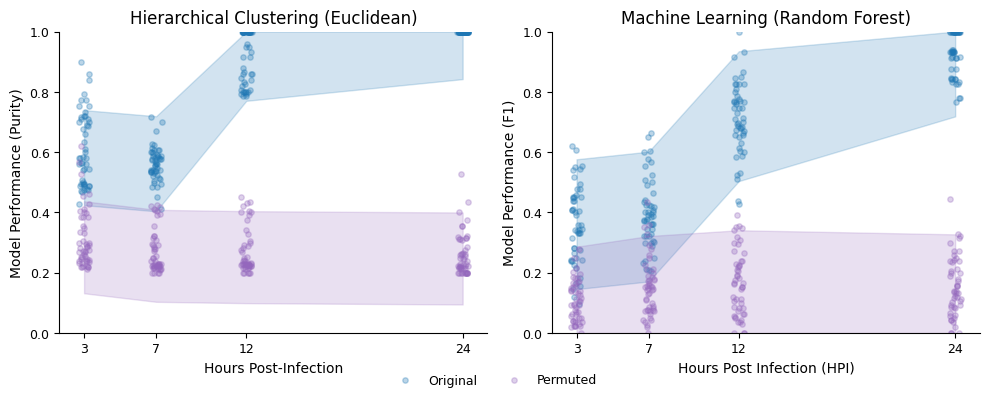

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# --- Load Data ---
df_true = pd.read_csv("dataset-1/cluster_purities_true.csv")
df_perm = pd.read_csv("dataset-1/cluster_purities_permuted.csv")
rf_true = pd.read_csv("dataset-1/rf_metrics_true.csv")
rf_perm = pd.read_csv("dataset-1/rf_metrics_permuted.csv")

# --- Add label columns ---
df_true["Permute"] = "Original"
df_perm["Permute"] = "Permuted"
rf_true["Permute"] = "Original"
rf_perm["Permute"] = "Permuted"

# --- Combine ---
df_purity = pd.concat([df_true, df_perm], ignore_index=True)
df_rf = pd.concat([rf_true, rf_perm], ignore_index=True)

# --- Plot Setup ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=False)
palette = {'Original': '#1f77b4', 'Permuted': '#9467bd'}
timepoint_map = {"3h": 3, "7h": 7, "12h": 12, "24h": 24}
xticks = [3, 7, 12, 24]

handles = []
labels = []

# --- Left Panel: Cluster Purity ---
for cond in ["Original", "Permuted"]:
    subset = df_purity[df_purity["Permute"] == cond]
    xvals = subset["time"].map(timepoint_map).values
    yvals = subset["purity"].values
    jitter = np.random.uniform(-0.3, 0.3, size=len(xvals))
    sc = ax1.scatter(xvals + jitter, yvals, alpha=0.3, s=15, color=palette[cond], label=cond)

    lo = lowess(yvals, xvals, frac=0.3, return_sorted=True)
    xs, ys = lo[:, 0], lo[:, 1]
    resid = yvals - np.interp(xvals, xs, ys)
    ci = 1.96 * resid.std()
    ax1.fill_between(xs, np.clip(ys - ci, 0, 1), np.clip(ys + ci, 0, 1),
                     color=palette[cond], alpha=0.2)

    if cond not in labels:  # Save handle/label only once
        handles.append(sc)
        labels.append(cond)

ax1.set_title("Hierarchical Clustering (Euclidean)", fontsize=12)
ax1.set_xlabel("Hours Post-Infection", fontsize=10)
ax1.set_ylabel("Model Performance (Purity)", fontsize=10)
ax1.set_xticks(xticks)
ax1.set_ylim(0, 1)
ax1.spines[['top', 'right']].set_visible(False)
ax1.tick_params(labelsize=9)

# --- Right Panel: RF F1 Score ---
for cond in ["Original", "Permuted"]:
    subset = df_rf[df_rf["Permute"] == cond]
    rf_grouped = subset.groupby(["time", "rep"])["f1"].mean().reset_index()
    xvals_rf = rf_grouped["time"].map(timepoint_map).values
    yvals_rf = rf_grouped["f1"].values
    jitter = np.random.uniform(-0.3, 0.3, size=len(xvals_rf))
    ax2.scatter(xvals_rf + jitter, yvals_rf, alpha=0.3, s=15, color=palette[cond])

    lo_rf = lowess(yvals_rf, xvals_rf, frac=0.3, return_sorted=True)
    xs_rf, ys_rf = lo_rf[:, 0], lo_rf[:, 1]
    resid_rf = yvals_rf - np.interp(xvals_rf, xs_rf, ys_rf)
    ci_rf = 1.96 * resid_rf.std()
    ax2.fill_between(xs_rf, np.clip(ys_rf - ci_rf, 0, 1), np.clip(ys_rf + ci_rf, 0, 1),
                     color=palette[cond], alpha=0.2)

ax2.set_title("Machine Learning (Random Forest)", fontsize=12)
ax2.set_xlabel("Hours Post Infection (HPI)", fontsize=10)
ax2.set_ylabel("Model Performance (F1)", fontsize=10)
ax2.set_xticks(xticks)
ax2.set_ylim(0, 1)
ax2.spines[['top', 'right']].set_visible(False)
ax2.tick_params(labelsize=9)

# --- Shared Legend Below ---
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=9, frameon=False)
fig.tight_layout(rect=[0, 0.01, 1, 1])  # leave space for legend

# --- Save & Show ---
fig.savefig("C:/Users/DIR/Jupyter/Multi-strain classification/figures/fig2_poster.png", dpi=300)
plt.show()


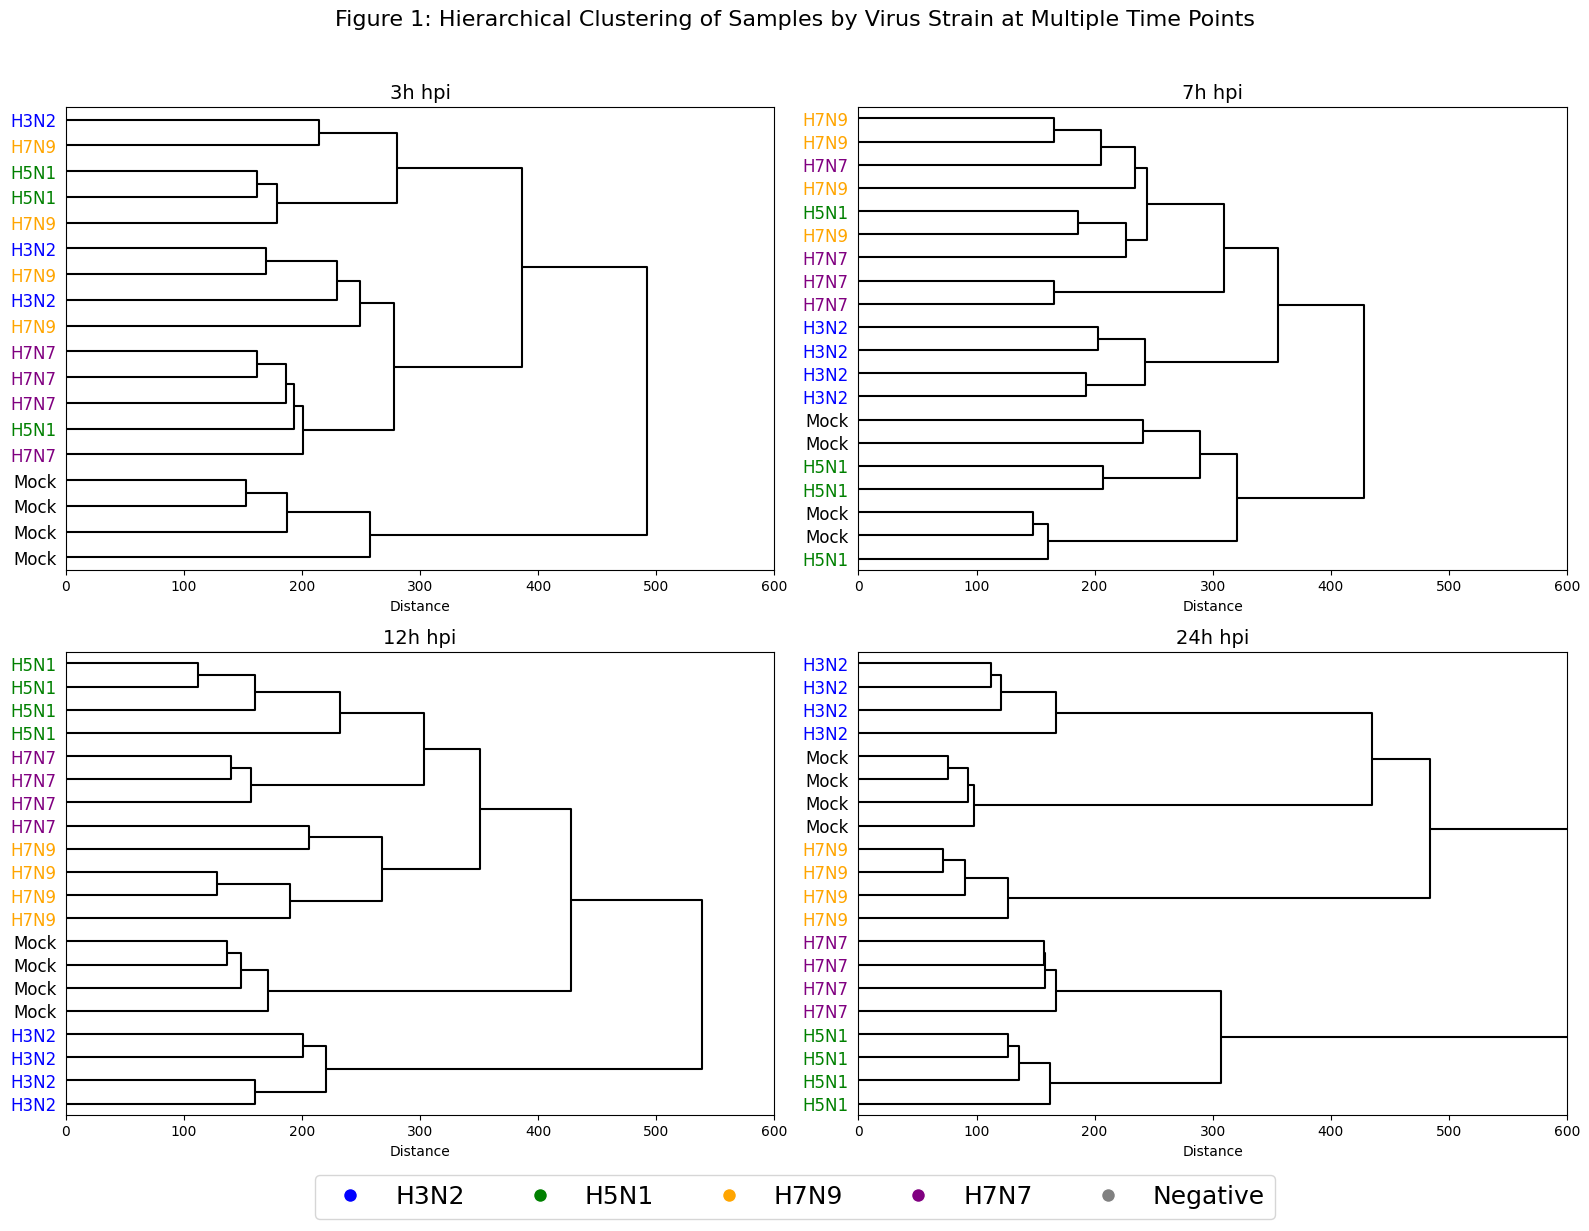

In [2]:
# Figure 1: Hierarchical Classification of Influenza Virus based on Microarray Gene Expression 
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

# === Load data ===
df = pd.read_csv("C:/Users/DIR/Jupyter/Multi-strain classification/dataset-1/data.csv")

strain_to_color = {
    'H3N2': 'blue',
    'H5N1': 'green',
    'H7N9': 'orange',
    'H7N7': 'purple',
    'Negative': 'gray',
}    

# === Explicit max distance for all panels ===
global_max_distance = 600  # <--- set this to a fixed value based on your needs

# === Setup figure ===
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()


ordered_timepoints = ["3h", "7h", "12h", "24h"]  # Make sure these match your dataset exactly

for i, timepoint in enumerate(ordered_timepoints):
    subset = df[df["Time"] == timepoint]
    if subset.shape[0] < 2:
        axs[i].set_visible(False)
        continue

    expression_data = subset.iloc[:, 1:-2]
    labels = subset["Virus_Strain"].values
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(expression_data)
    linkage_matrix = linkage(scaled_data, method='ward')

    dendrogram(
        linkage_matrix,
        labels=labels,
        orientation='right',
        leaf_font_size=12,
        leaf_rotation=0,
        ax=axs[i],
        color_threshold=0,
        link_color_func=lambda k: 'black',
    )

    # Color the strain labels
    for lbl in axs[i].get_ymajorticklabels():
        strain = lbl.get_text()
        lbl.set_color(strain_to_color.get(strain, 'black'))
        lbl.set_fontsize(12)

    axs[i].set_xlim([0, global_max_distance])
    axs[i].set_title(f"{timepoint} hpi", fontsize=14)
    axs[i].set_xlabel("Distance")
    axs[i].set_ylabel("")

# === Create shared legend ===
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=strain,
           markerfacecolor=color, markersize=10)
    for strain, color in strain_to_color.items()
]
fig.legend(handles=legend_elements, loc='lower center', ncol=len(strain_to_color), fontsize=18)

# === Final layout and save ===
ax.set_title('Figure 1: Hierarchical Clustering of Samples by Virus Strain at Multiple Time Points', fontsize=20, y=1.02)
plt.tight_layout(rect=[0, 0.05, 1, 1])
fig.savefig("C:/Users/DIR/Jupyter/Multi-strain classification/figures/fig1.png", dpi=300)
plt.show()


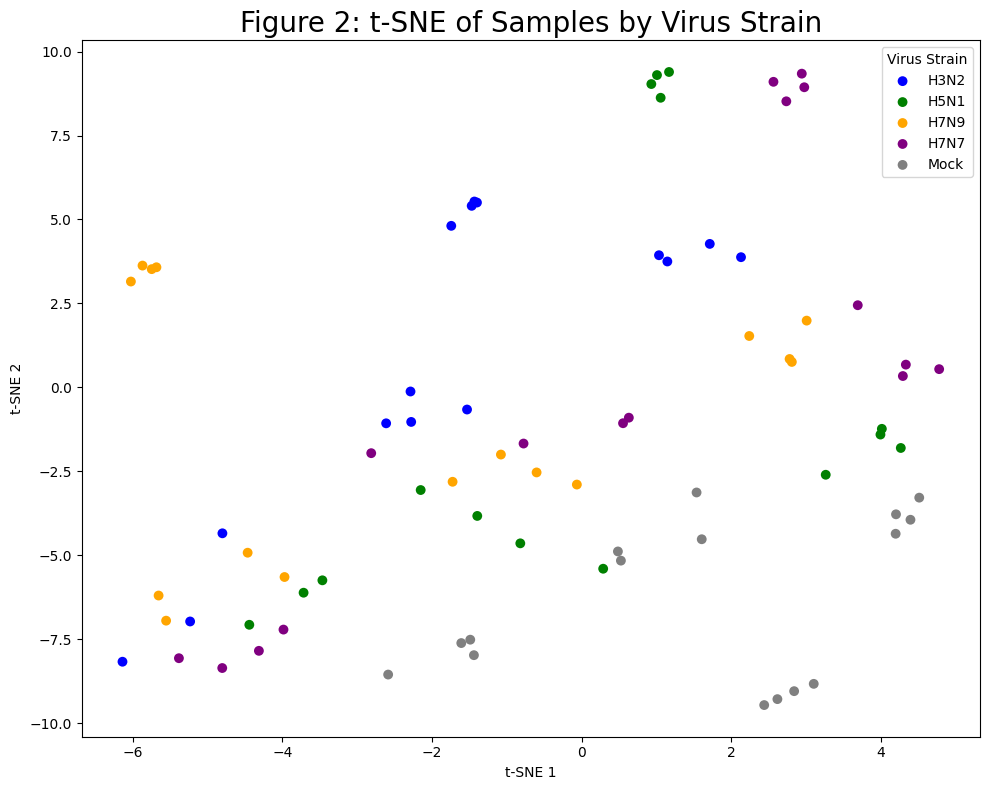

In [4]:
#Figure 2: tSNE clustering of Influenza Virus based on Microarray Gene Expression from 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# === Load the dataset ===
df = pd.read_csv("C:/Users/DIR/Jupyter/Multi-strain classification/dataset-1/data.csv")

# === Define strain colors ===
strain_to_color = {
    'H3N2': 'blue',
    'H5N1': 'green',
    'H7N9': 'orange',
    'H7N7': 'purple',
    'Mock': 'gray',
}

# === Prepare the expression matrix ===
expression_data = df.iloc[:, 1:-2]  # Assuming: sample column, gene columns, then "Virus_Strain" and "Time"

# === Normalize gene expression ===
scaled_data = StandardScaler().fit_transform(expression_data)

# === Run t-SNE ===
tsne = TSNE(n_components=2, random_state=42, perplexity=20)
tsne_results = tsne.fit_transform(scaled_data)

# === Plot colored by strain ===
plt.figure(figsize=(10, 8))
for strain in strain_to_color:
    mask = df["Virus_Strain"] == strain
    plt.scatter(
        tsne_results[mask, 0],
        tsne_results[mask, 1],
        label=strain,
        c=strain_to_color[strain],
        s=50,
        edgecolors='none'
    )

plt.title("Figure 2: t-SNE of Samples by Virus Strain", fontsize=20)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Virus Strain")
plt.tight_layout()

# === Save figure ===
plt.savefig("C:/Users/DIR/Jupyter/Multi-strain classification/figures/fig2.png", dpi=300)
plt.show()


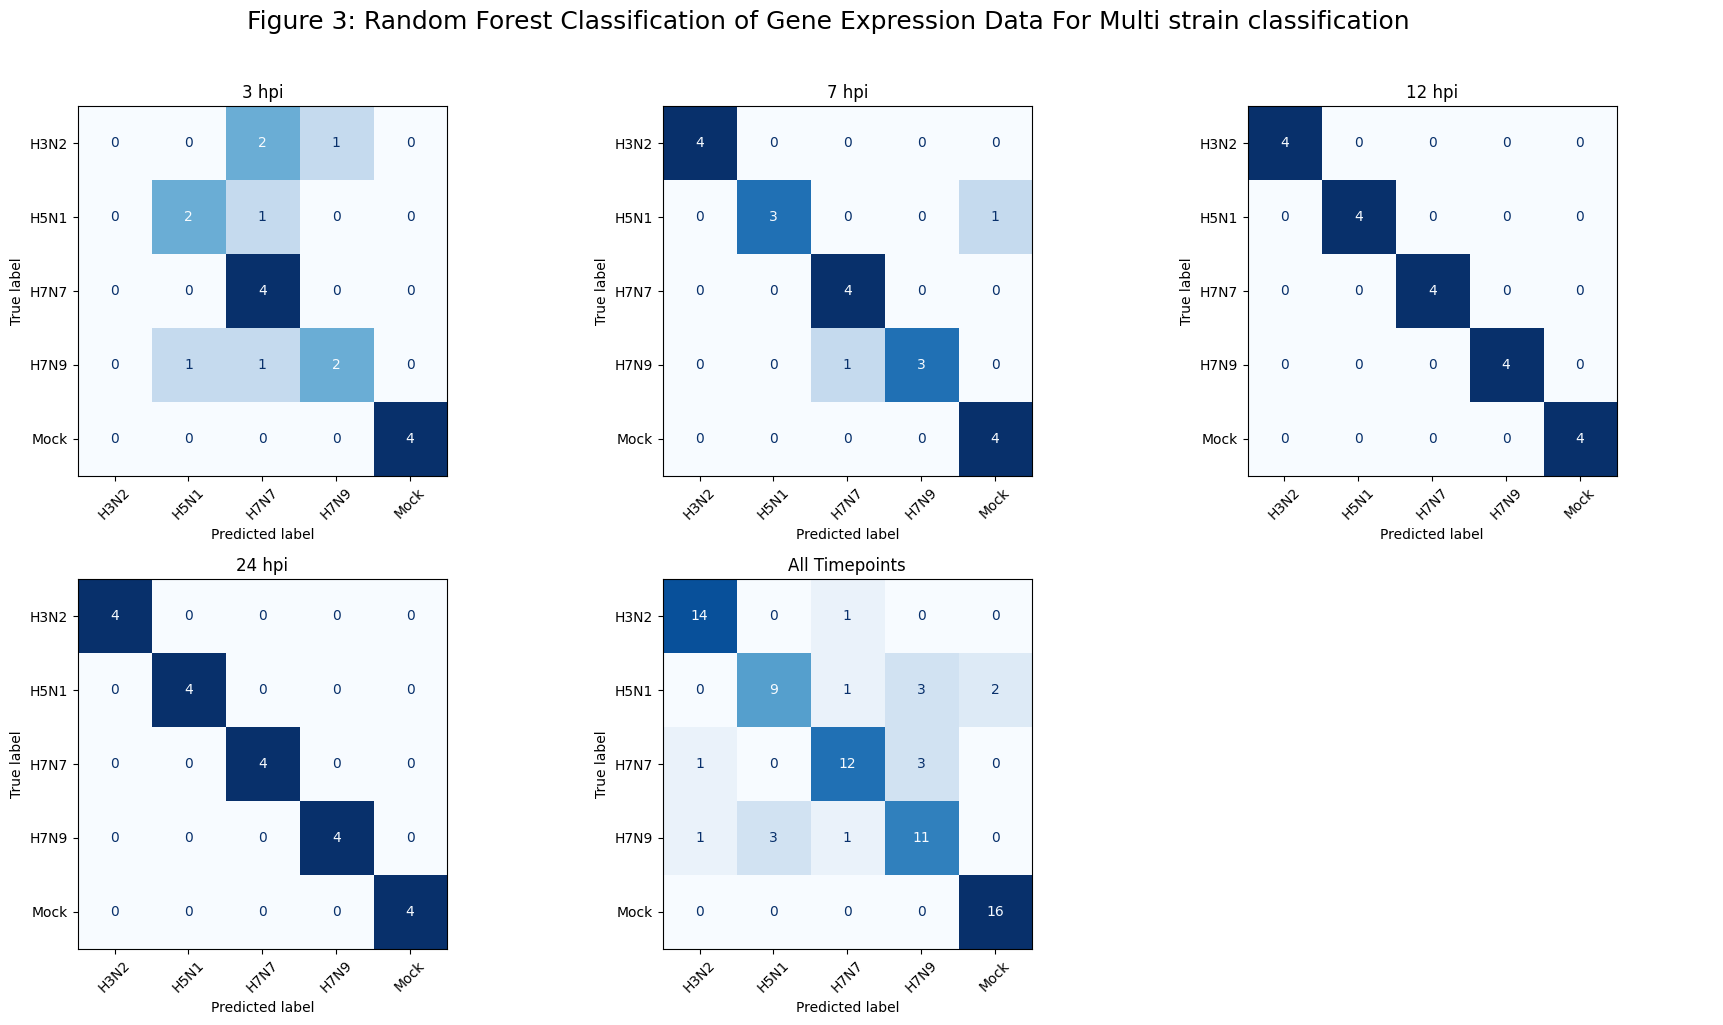

In [5]:
#Figure 3: Random Forest Classification of Gene Expression Data For Multi strain classification
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import Counter

# === Load and clean data ===
df = pd.read_csv("C:/Users/DIR/Jupyter/Multi-strain classification/dataset-1/data.csv")
df["Time"] = df["Time"].str.extract(r"(\d+)").astype(int)
timepoints = sorted(df["Time"].unique())

# === Setup 2x3 plot panel ===
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

def get_valid_n_splits(y, max_splits=10):
    class_counts = Counter(y)
    min_class_size = min(class_counts.values())
    return max(2, min(max_splits, min_class_size))

# === Function to train RF and return confusion matrix ===
def train_and_plot_confusion(ax, X, y, title):
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    label_names = label_encoder.classes_
    
    X_scaled = StandardScaler().fit_transform(X)
    
    n_splits = get_valid_n_splits(y)
    if n_splits < 2:
        ax.set_visible(False)
        return

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    all_true, all_pred = [], []

    for train_idx, test_idx in skf.split(X_scaled, y_encoded):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        all_true.extend(y_test)
        all_pred.extend(y_pred)

    cm = confusion_matrix(all_true, all_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
    disp.plot(ax=ax, cmap="Blues", colorbar=False, xticks_rotation=45)
    ax.set_title(title)

# === 1. Plot each timepoint individually ===
for i, timepoint in enumerate(timepoints):
    subset = df[df["Time"] == timepoint]
    if subset.shape[0] < 2:
        axs[i].set_visible(False)
        continue

    X = subset.drop(columns=["Sample", "Virus_Strain", "Time"])
    y = subset["Virus_Strain"]
    train_and_plot_confusion(axs[i], X, y, f"{timepoint} hpi")

# === 2. Aggregated confusion matrix ===
X_all = df.drop(columns=["Sample", "Virus_Strain", "Time"])
y_all = df["Virus_Strain"]
train_and_plot_confusion(axs[4], X_all, y_all, "All Timepoints")

# === Hide any unused subplots (like panel 5) ===
for j in range(5, len(axs)):
    axs[j].axis("off")

plt.suptitle("Figure 3: Random Forest Classification of Gene Expression Data For Multi strain classification", fontsize=18, y=1.02)
plt.tight_layout()
plt.savefig("C:/Users/DIR/Jupyter/Multi-strain classification/figures/fig3.png", dpi=300)
plt.show()

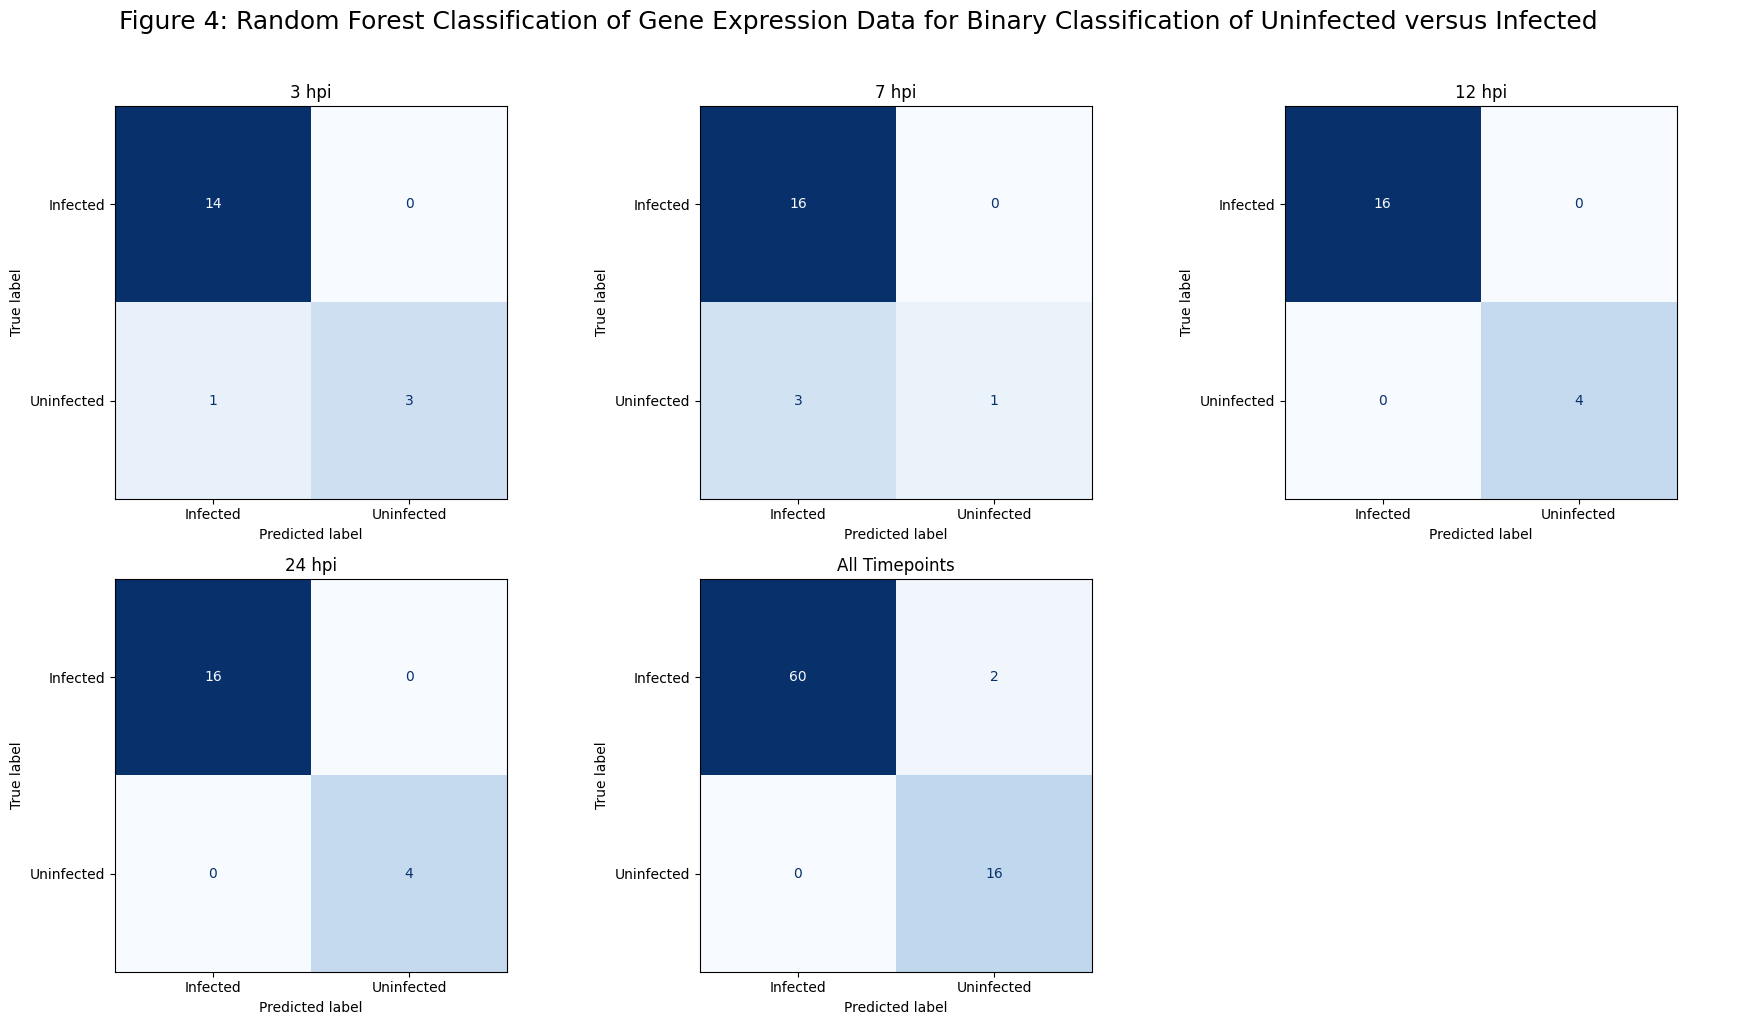

In [3]:
#Figure 4: Random Forest Classification of Gene Expression Data for Binary Classification of Uninfected versus Infected
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import Counter

# === Load and clean data ===
df = pd.read_csv("C:/Users/DIR/Jupyter/Multi-strain classification/dataset-1/data.csv")
df["Time"] = df["Time"].str.extract(r"(\d+)").astype(int)

# Create binary infection status: 'Mock' = Uninfected, else Infected
df["Infection_Status"] = df["Virus_Strain"].apply(lambda x: "Uninfected" if x.strip().lower() == "mock" else "Infected")

# Get all unique timepoints
timepoints = sorted(df["Time"].unique())

# === Set up 2x3 plot panel (for 4 timepoints + 1 aggregated) ===
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

# === Helper to determine valid n_splits based on smallest class ===
def get_valid_n_splits(y, max_splits=10):
    class_counts = Counter(y)
    return max(2, min(min(class_counts.values()), max_splits))

# === Function to train and plot confusion matrix ===
def train_and_plot_binary_confusion(ax, X, y, title):
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    label_names = label_encoder.classes_

    X_scaled = StandardScaler().fit_transform(X)

    n_splits = get_valid_n_splits(y)
    if n_splits < 2:
        ax.set_visible(False)
        return

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    all_true, all_pred = [], []

    for train_idx, test_idx in skf.split(X_scaled, y_encoded):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        all_true.extend(y_test)
        all_pred.extend(y_pred)

    cm = confusion_matrix(all_true, all_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
    disp.plot(ax=ax, cmap="Blues", colorbar=False, values_format="d")
    ax.set_title(title)

# === 1. Plot individual confusion matrices per timepoint ===
for i, timepoint in enumerate(timepoints):
    subset = df[df["Time"] == timepoint]
    if subset.shape[0] < 2:
        axs[i].set_visible(False)
        continue

    y = subset["Infection_Status"]
    X = subset.drop(columns=["Sample", "Virus_Strain", "Time", "Infection_Status"])

    train_and_plot_binary_confusion(axs[i], X, y, f"{timepoint} hpi")

# === 2. Plot the aggregated confusion matrix ===
y_all = df["Infection_Status"]
X_all = df.drop(columns=["Sample", "Virus_Strain", "Time", "Infection_Status"])
train_and_plot_binary_confusion(axs[4], X_all, y_all, "All Timepoints")

# Hide last panel if unused
for j in range(5, len(axs)):
    axs[j].axis("off")

# Final formatting
plt.suptitle("Figure 4: Random Forest Classification of Gene Expression Data for Binary Classification of Uninfected versus Infected", fontsize=18, y=1.02)
plt.tight_layout()
plt.savefig("C:/Users/DIR/Jupyter/Multi-strain classification/figures/fig4.png", dpi=300)
plt.show()


## Section 2: The nucleotide composition of an infected cell can be used to determine which viral genotype is infecting a cell

### Figure 5

In [7]:
#Figure 5: Hierarchical Clustering of Kmer Abundance Profiles from Infected Cells
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.cluster.hierarchy import linkage, dendrogram, to_tree
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from collections import defaultdict, Counter

# Parameters
kmer_csv_dir = "C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/kmer_tables"
strain_to_color = {
    'LASV': 'red', 'H5N1': 'orange', 'H1N1': 'yellow',
    'EBOV': 'green', 'MARV': 'blue', 'RVFV': 'violet',
    'RSV': 'pink', 'NiV': 'white', 'SFSV': 'brown', 'Mock': 'gray'
}
global_max_distance = 500

def compute_purity(linkage_matrix, labels):
    tree, _ = to_tree(linkage_matrix, rd=True)
    id_to_label = {i: labels[i] for i in range(len(labels))}
    label_to_indices = defaultdict(list)

    for i, label in enumerate(labels):
        label_to_indices[label].append(i)

    class_purities = {}

    for label, indices in label_to_indices.items():
        indices_set = set(indices)

        def find_subtree(node):
            if node.is_leaf():
                return node if node.id in indices_set else None
            left = find_subtree(node.left)
            right = find_subtree(node.right)
            if left and right:
                return node
            return left or right

        subtree = find_subtree(tree)
        if subtree:
            leaf_ids = subtree.pre_order()
            all_labels = [id_to_label[i] for i in leaf_ids]
            counts = Counter(all_labels)
            purity = counts[label] / len(all_labels)
            class_purities[label] = round(purity, 4)
        else:
            class_purities[label] = 0.0

    return class_purities

# Load and analyze files
csv_files = [f for f in sorted(os.listdir(kmer_csv_dir)) if f.endswith("_results_unfiltered.csv")]
n = len(csv_files)
cols = 3
rows = int(np.ceil(n / cols))

fig, axs = plt.subplots(rows, cols, figsize=(cols * 5.5, rows * 7.5))
axs = axs.flatten()
stats = []

for i, filename in enumerate(csv_files):
    file_path = os.path.join(kmer_csv_dir, filename)
    df = pd.read_csv(file_path)

    if "Virus" not in df.columns or "HPI" not in df.columns:
        axs[i].set_visible(False)
        continue

    df = df[~df["HPI"].isin([3, 6])]

    if df.empty:
        axs[i].set_visible(False)
        continue

    k = ''.join([c for c in filename if c.isdigit()]) or '?'
    labels = df["Virus"].values
    excluded_columns = ["Accession", "Filter", "Virus", "HPI"]
    feature_cols = [col for col in df.columns if col not in excluded_columns]
    features = df[feature_cols]

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(features)
    dist_matrix = pdist(scaled_data)
    linkage_matrix = linkage(scaled_data, method='ward')

    purity_scores = compute_purity(linkage_matrix, labels)
    mean_purity = np.mean(list(purity_scores.values()))

    stats.append({
        "k": k,
        "Filename": filename,
        "Num_Samples": len(df),
        "Num_Kmers": len(feature_cols),
        "Mean_Purity": round(mean_purity, 4),
        "Tree_Max_Height": round(np.max(linkage_matrix[:, 2]), 4),
        **{f"Purity_{lab}": score for lab, score in purity_scores.items()}
    })

    ax = axs[i]
    ddata = dendrogram(
        linkage_matrix,
        labels=None,
        orientation='right',
        ax=ax,
        color_threshold=0,
        link_color_func=lambda _: 'black'
    )

    leaf_positions = ax.get_yaxis().get_majorticklocs()
    leaves = ddata['leaves']
    viruses = labels[leaves]

    for y, virus in zip(leaf_positions, viruses):
        ax.scatter(global_max_distance * 1.01, y, s=70,
                   color=strain_to_color.get(virus, 'black'),
                   zorder=3)

    ax.set_xlim([0, global_max_distance * 1.05])
    ax.set_title(f"k={k} | Purity: {mean_purity:.2f}", fontsize=13, pad=10)
    ax.set_xlabel("Distance", fontsize=11)
    ax.set_ylabel("")
    ax.set_yticks([])
    ax.tick_params(axis='x', labelsize=9)

# Clean up extra subplots
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=strain,
           markerfacecolor=color, markersize=10)
    for strain, color in strain_to_color.items()
]
fig.legend(handles=legend_elements, loc='lower center', ncol=4, fontsize=12, frameon=False)
fig.suptitle("Figure 5: Hierarchical Clustering of K-mer Profiles by Virus (Purity, HPI 12/24)", fontsize=18, y=1.02)

plt.tight_layout(rect=[0, 0.05, 1, 0.97])
fig.savefig("C:/Users/DIR/Jupyter/Multi-strain classification/figures/fig5.png", dpi=300, bbox_inches='tight')

# Save purity stats
stats_df = pd.DataFrame(stats)
stats_output_path = os.path.join(kmer_csv_dir, "dendrogram_stats_purity_HPI12-24.csv")
stats_df.to_csv(stats_output_path, index=False)

stats_output_path



KeyboardInterrupt



Error in callback <function flush_figures at 0x000002493244D940> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

### Figure 6

In [7]:
## Overall Parameters for Figure 6
import os
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
from scipy.cluster.hierarchy import linkage, to_tree
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler

# PARAMETERS
kmer_csv_dir = "C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/kmer_tables"
kmer_range = range(1, 10)
bootstrap_iterations = 25
bootstrap_fraction = 0.8
datasets = {
    "Unfiltered": "_results_unfiltered.csv",
    "Shuffled": "_results_shuffled.csv",
    "Permuted": "_results_unfiltered_label_permuted.csv"
}
# === BLOCK 1: Hierarchical Clustering Purity ===

# PURITY FUNCTION
def compute_purity(linkage_matrix, labels):
    tree, _ = to_tree(linkage_matrix, rd=True)
    id_to_label = {i: labels[i] for i in range(len(labels))}
    label_to_indices = defaultdict(list)
    for i, label in enumerate(labels):
        label_to_indices[label].append(i)

    class_purities = {}
    for label, indices in label_to_indices.items():
        indices_set = set(indices)

        def find_subtree(node):
            if node.is_leaf():
                return node if node.id in indices_set else None
            left = find_subtree(node.left)
            right = find_subtree(node.right)
            if left and right:
                return node
            return left or right

        subtree = find_subtree(tree)
        if subtree:
            leaf_ids = subtree.pre_order()
            all_labels = [id_to_label[i] for i in leaf_ids]
            counts = Counter(all_labels)
            purity = counts[label] / len(all_labels)
            class_purities[label] = round(purity, 4)
        else:
            class_purities[label] = 0.0

    return np.mean(list(class_purities.values()))

# RUN CLUSTERING + BOOTSTRAP
tree_results = []
for condition, suffix in datasets.items():
    for k in kmer_range:
        file_path = os.path.join(kmer_csv_dir, f"multivirus_{k}mer{suffix}")
        if not os.path.exists(file_path):
            continue
        df = pd.read_csv(file_path)
        if "Virus" not in df.columns or "HPI" not in df.columns:
            continue
        df = df[~df["HPI"].isin([3, 6])]
        if df.empty:
            continue

        feature_cols = [col for col in df.columns if col not in ["Accession", "Filter", "Virus", "HPI"]]
        X = df[feature_cols].values
        y = df["Virus"].values

        for i in range(bootstrap_iterations):
            idx = np.random.choice(len(df), int(len(df) * bootstrap_fraction), replace=False)
            X_sample = X[idx]
            y_sample = y[idx]

            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X_sample)
            linkage_matrix = linkage(X_scaled, method='ward')
            purity = compute_purity(linkage_matrix, y_sample)

            tree_results.append({
                "Condition": condition,
                "k": k,
                "Iteration": i + 1,
                "Metric": "Purity",
                "Value": purity
            })

results_df = pd.DataFrame(tree_results)
results_df.to_csv(os.path.join(kmer_csv_dir, "fig6_tree_purity_bootstrap.csv"), index=False)

# === BLOCK 2: Random Forest with K-Fold CV (Exports CSV) ===
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold

rf_results = []

for condition, suffix in datasets.items():
    for k in kmer_range:
        file_path = os.path.join(kmer_csv_dir, f"multivirus_{k}mer{suffix}")
        if not os.path.exists(file_path):
            continue

        df = pd.read_csv(file_path)
        if "Virus" not in df.columns or "HPI" not in df.columns:
            continue

        df = df[~df["HPI"].isin([3, 6])]
        if df.empty:
            continue

        feature_cols = [col for col in df.columns if col not in ["Accession", "Filter", "Virus", "HPI"]]

        # Equalize class sizes to the smallest class size
        class_counts = df["Virus"].value_counts()
        min_class_size = class_counts.min()

        balanced_frames = []
        for label in class_counts.index:
            df_label = df[df["Virus"] == label]
            if len(df_label) >= min_class_size:
                balanced_frames.append(df_label.sample(n=min_class_size, random_state=42))

        df_balanced = pd.concat(balanced_frames).sample(frac=1, random_state=42).reset_index(drop=True)

        X = df_balanced[feature_cols].values
        y = df_balanced["Virus"].values

        # Determine the number of splits dynamically based on min class count
        max_splits = min(10, min_class_size)  # Cap at 10 to avoid excessive splitting
        if max_splits < 2:
            continue  # Skip if not enough data for splitting

        skf = StratifiedKFold(n_splits=max_splits, shuffle=True, random_state=42)

        for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            clf = RandomForestClassifier(n_estimators=100, random_state=42)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)

            rf_results.extend([
                {"Condition": condition, "k": k, "Iteration": fold + 1, "Metric": "Precision",
                 "Value": precision_score(y_test, y_pred, average="macro", zero_division=0)},
                {"Condition": condition, "k": k, "Iteration": fold + 1, "Metric": "Recall",
                 "Value": recall_score(y_test, y_pred, average="macro", zero_division=0)},
                {"Condition": condition, "k": k, "Iteration": fold + 1, "Metric": "F1",
                 "Value": f1_score(y_test, y_pred, average="macro", zero_division=0)}
            ])

            # Confusion matrix for last fold of each k/condition
            labels = sorted(np.unique(np.concatenate([y_test, y_pred])))
            cm = confusion_matrix(y_test, y_pred, labels=labels)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

            fig_cm, ax_cm = plt.subplots(figsize=(8, 6))
            disp.plot(ax=ax_cm, cmap="Blues", xticks_rotation=45)
            ax_cm.set_title(f"Confusion Matrix (Condition: {condition}, k={k}, Fold {fold + 1})")
            plt.tight_layout()
            plt.show()

# Save all RF performance metrics to CSV
rf_df = pd.DataFrame(rf_results)
rf_df.to_csv(os.path.join(kmer_csv_dir, "fig6_rf_bootstrap_metrics.csv"), index=False)

# Plot Fig 6
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load CSVs
tree_df = pd.read_csv(os.path.join(kmer_csv_dir, "fig6_tree_purity_bootstrap.csv"))
rf_df = pd.read_csv(os.path.join(kmer_csv_dir, "fig6_rf_bootstrap_metrics.csv"))

# Combine
df = pd.concat([tree_df, rf_df], ignore_index=True)

# Palette
palette = {
    "Unfiltered": "#1f77b4",
    "Shuffled": "#d62728",
    "Permuted": "#9467bd"
}

# Set up plot
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
metric_titles = {
    "Purity": "A) Tree Purity",
    "F1": "B) Random Forest F1 Score",
    "Recall": "C) Random Forest Recall",
    "Precision": "D) Random Forest Precision"
}
metric_axes = {
    "Purity": axs[0, 0],
    "F1": axs[0, 1],
    "Recall": axs[1, 0],
    "Precision": axs[1, 1]
}

for metric, ax in metric_axes.items():
    for condition in palette:
        subset = df[(df["Condition"] == condition) & (df["Metric"] == metric)]

        if subset.empty:
            continue

        # Fit LOWESS curve
        lowess_fit = lowess(subset["Value"], subset["k"], frac=0.5, return_sorted=True)
        smoothed_k = lowess_fit[:, 0]
        smoothed_y = lowess_fit[:, 1]

        # Estimate residuals for CI
        residuals = subset["Value"] - np.interp(subset["k"], smoothed_k, smoothed_y)
        std = residuals.std()
        ci = 1.96 * std

        # Plot shaded confidence band
        ax.fill_between(smoothed_k, smoothed_y - ci, smoothed_y + ci,
                    alpha=0.2, color=palette[condition])

        # Plot LOWESS mean line
        ax.plot(smoothed_k, smoothed_y, color=palette[condition], linewidth=1.5)

        # Plot points
        jittered_k = subset["k"] + (np.random.rand(len(subset)) - 0.5) * 0.8
        ax.scatter(jittered_k, subset["Value"], alpha=0.5, s=25, color=palette[condition])


    # Axis labels
    ax.set_title(metric_titles[metric], fontsize=14)
    ax.set_ylim(top=1.0)
    ax.set_xlabel("k-mer length", fontsize=14)
    if metric == "Purity":
        ax.set_ylabel("Mean Class Purity", fontsize=14)
    else:
        ax.set_ylabel(metric, fontsize=14)

    ax.set_xticks(sorted(df["k"].unique()))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(False)

# Shared legend
handles = [
    Line2D([0], [0], marker='o', color='w', label=cond,
           markerfacecolor=palette[cond], markersize=8)
    for cond in palette
]
fig.legend(handles=handles, title="Condition", loc='lower center',
           ncol=len(palette), fontsize=14, title_fontsize=15, bbox_to_anchor=(0.5, -0.02))

fig.suptitle("Figure 6: Hierarchical Clustering and Random Forest Performance on Real, Shuffled, and Permuted Data", fontsize=20, y=1.03)
fig.tight_layout(rect=[0, 0.05, 1, 0.97])
plt.savefig("C:/Users/DIR/Jupyter/Multi-strain classification/figures/fig6.png", dpi=300)
plt.show()

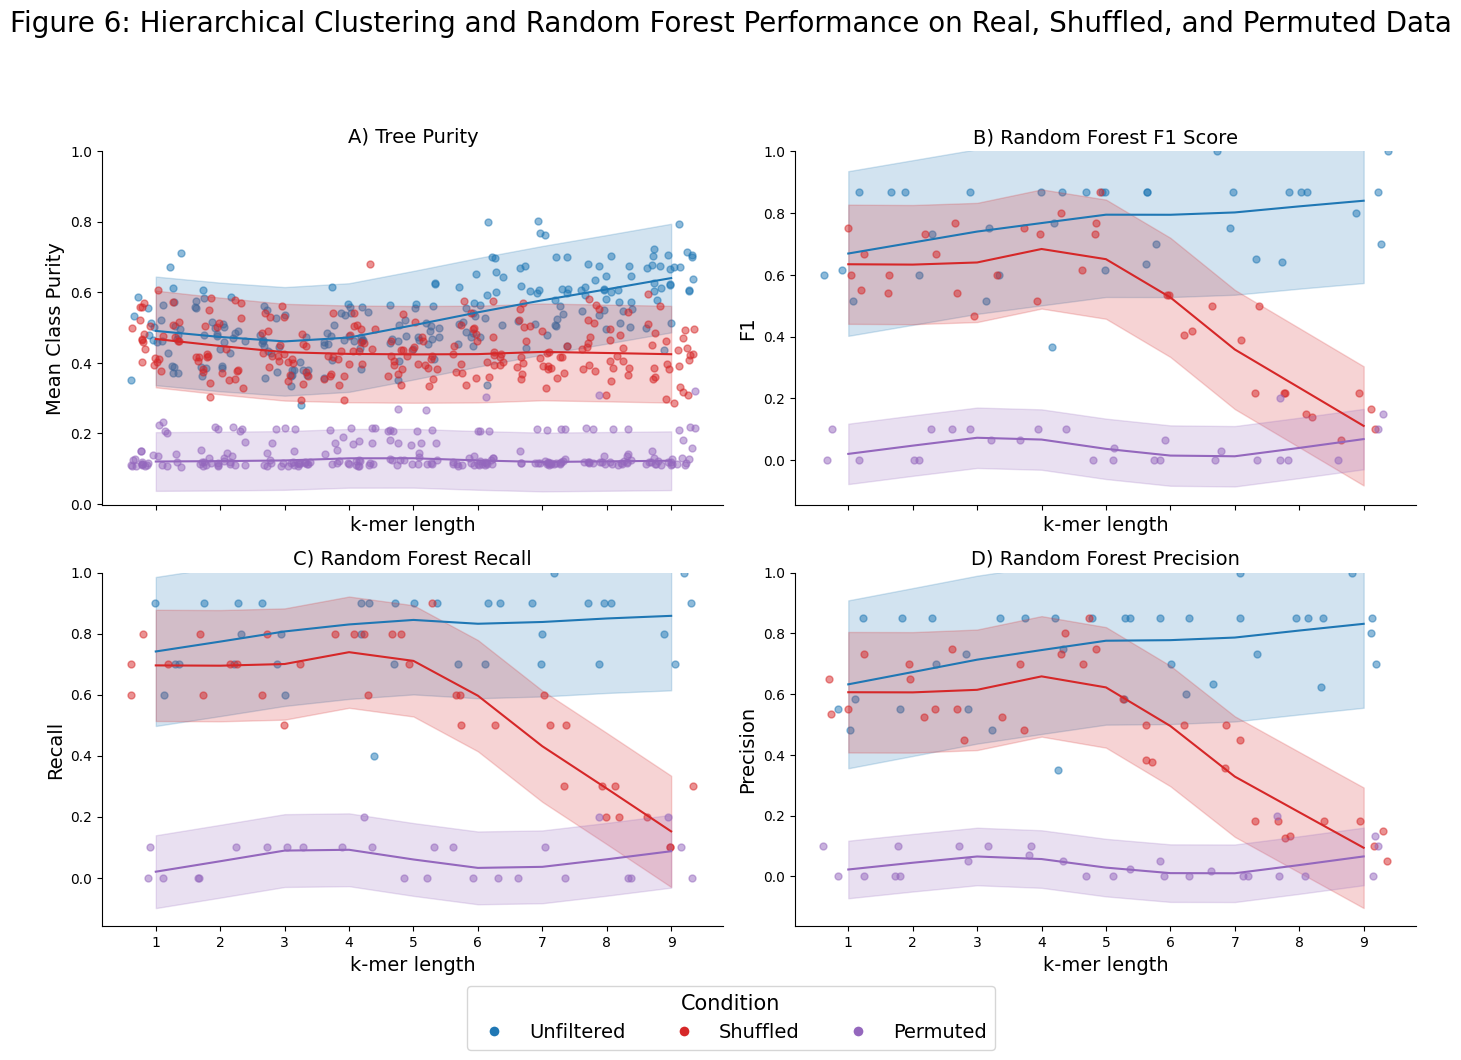

To assess which features were most important for sucessful classification by Random Forests and Hierarchical Clustering, variant training data was used to given to the RF and Hclust models and the performance was assessed by (A) Tree purity in the case of Hclust and (B) F1 score, (C) Recall, and (D) Precision for the Random Forest model. The data in the "Unfiltered" category is the original data with no adulteration. For the shuffled data, the nucleotides within each read of the .fastq file in the training data were shuffled randomly. In the "permuted" data category, the labels of the unfiltered category were randomly assigned to each kmer abundance profile.

For Hclust, the unfiltered data and shuffled data outperformed the permuted data, indicating that the nucleotide composition of the reads is necessary for classification. The shuffled data was successfully classified by the tree at lower kmer lengths, however, a drop in performance was observed with increasing k. The unfiltered data was able to be classified and the efficiency of the Hclust increased with increasing k.

For Random Forest Classification, the unfiltered data and shuffled data were well classified by the model at lower k. With increasing k, the model performance by F1 score, Recall, and Precision for the shuffled data decreased sharply after a k length of 5. The permuted data was not well classified by the Random Forest at any k.

### Figure 7

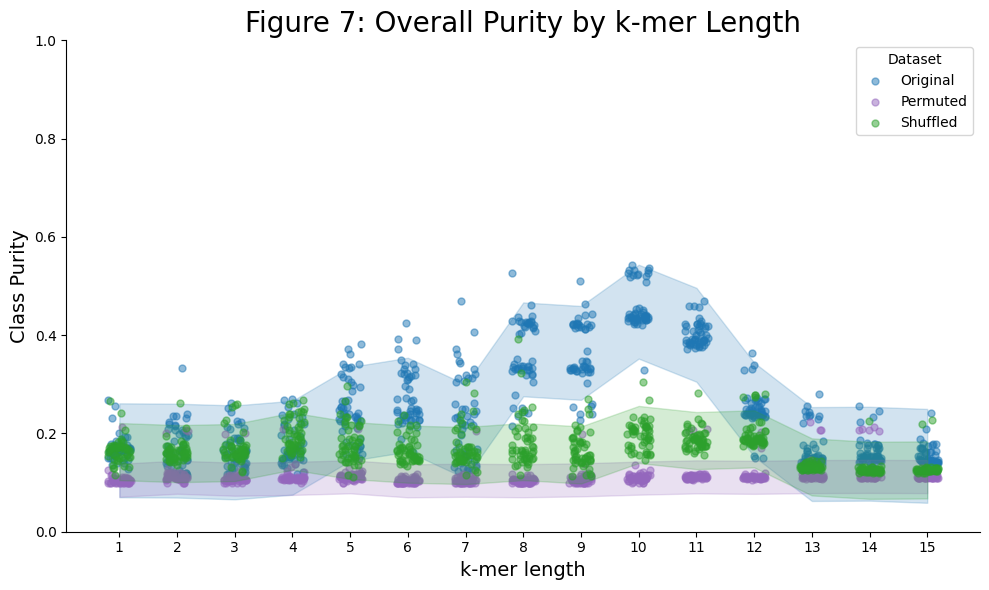

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load data
kmer_csv_dir = "C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/cluster_outputs/"
orig = pd.read_csv(os.path.join(kmer_csv_dir, "cluster_replicates_Original.csv"))
shuffled = pd.read_csv(os.path.join(kmer_csv_dir, "cluster_replicates_Original_shuffled.csv"))
perm = pd.read_csv(os.path.join(kmer_csv_dir, "cluster_replicates_Original_permuted.csv"))

# Label datasets
orig["Dataset"] = "Original"
shuffled["Dataset"] = "Shuffled"  # Fixed column name
perm["Dataset"] = "Permuted"

# Concatenate all
df = pd.concat([orig, perm, shuffled], ignore_index=True)
df = df[df['k'].between(1, 15)]


# Set up plot
palette = {'Original': '#1f77b4', 'Permuted': '#9467bd', 'Shuffled': '#2ca02c'}  # Add a color for Shuffled
fig, ax = plt.subplots(figsize=(10, 6))

# Plot for each group
for cond in ['Original', 'Permuted', 'Shuffled']:
    subset = df[df['Dataset'] == cond]
    if subset.empty:
        continue

    # LOWESS smoothing and CI
    lo = lowess(subset['purity'], subset['k'], frac=0.2, return_sorted=True)
    xs, ys = lo[:, 0], lo[:, 1]
    resid = subset['purity'] - np.interp(subset['k'], xs, ys)
    ci = 1.96 * resid.std()

    # Shaded CI
    ax.fill_between(xs,
                    np.clip(ys - ci, 0, 1),
                    np.clip(ys + ci, 0, 1),
                    color=palette[cond], alpha=0.2)

    # Scatter
    xjit = subset['k'] + (np.random.rand(len(subset)) - 0.5) * 0.4
    ax.scatter(xjit, subset['purity'],
               alpha=0.5, s=25, color=palette[cond], label=cond)

# Format plot
ax.set_xlabel('k-mer length', fontsize=14)
ax.set_ylabel('Class Purity', fontsize=14)
ax.set_title('Figure 7: Overall Purity by k-mer Length', fontsize=20)
ax.set_xticks(sorted(df['k'].unique()))
ax.set_ylim(0, 1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(title='Dataset')
fig.tight_layout()
fig.savefig("C:/Users/DIR/Jupyter/Multi-strain classification/figures/fig7.png", dpi=300)
plt.show()


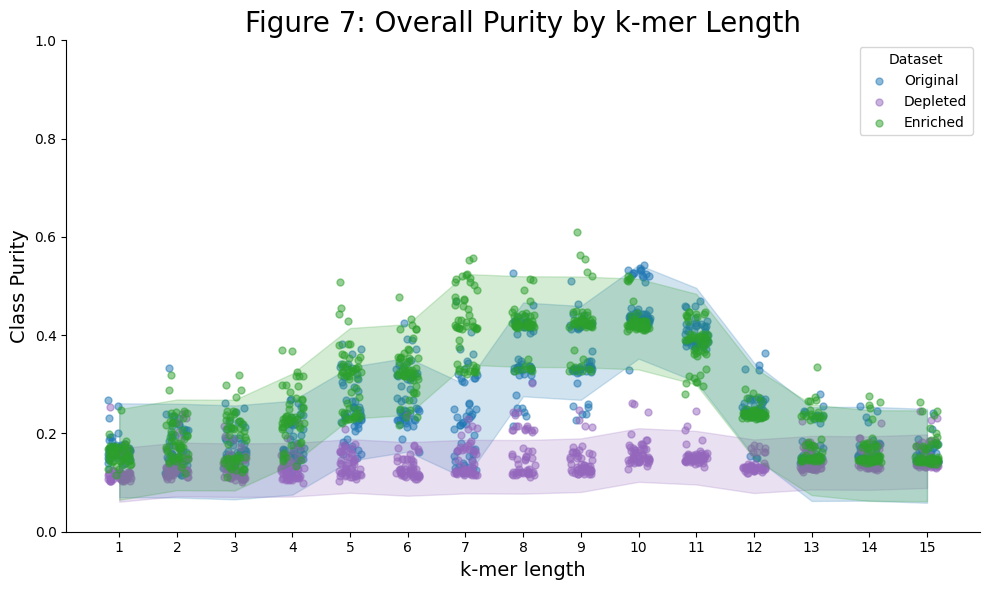

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load data
kmer_csv_dir = "C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/cluster_outputs/"
orig = pd.read_csv(os.path.join(kmer_csv_dir, "cluster_replicates_Original.csv"))
depleted = pd.read_csv(os.path.join(kmer_csv_dir, "cluster_replicates_Depleted.csv"))
enriched = pd.read_csv(os.path.join(kmer_csv_dir, "cluster_replicates_Enriched.csv"))

# Label datasets
orig["Dataset"] = "Original"
depleted["Dataset"] = "Depleted"  # Fixed column name
enriched["Dataset"] = "Enriched"

# Concatenate all
df = pd.concat([orig, depleted, enriched], ignore_index=True)
df = df[df['k'].between(1, 15)]

# Set up plot
palette = {'Original': '#1f77b4', 'Depleted': '#9467bd', 'Enriched': '#2ca02c'}  # Add a color for Shuffled
fig, ax = plt.subplots(figsize=(10, 6))

# Plot for each group
for cond in ['Original', 'Depleted', 'Enriched']:
    subset = df[df['Dataset'] == cond]
    if subset.empty:
        continue

    # LOWESS smoothing and CI
    lo = lowess(subset['purity'], subset['k'], frac=0.2, return_sorted=True)
    xs, ys = lo[:, 0], lo[:, 1]
    resid = subset['purity'] - np.interp(subset['k'], xs, ys)
    ci = 1.96 * resid.std()

    # Shaded CI
    ax.fill_between(xs,
                    np.clip(ys - ci, 0, 1),
                    np.clip(ys + ci, 0, 1),
                    color=palette[cond], alpha=0.2)

    # Scatter
    xjit = subset['k'] + (np.random.rand(len(subset)) - 0.5) * 0.4
    ax.scatter(xjit, subset['purity'],
               alpha=0.5, s=25, color=palette[cond], label=cond)

# Format plot
ax.set_xlabel('k-mer length', fontsize=14)
ax.set_ylabel('Class Purity', fontsize=14)
ax.set_title('Figure 7: Overall Purity by k-mer Length', fontsize=20)
ax.set_xticks(sorted(df['k'].unique()))
ax.set_ylim(0, 1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(title='Dataset')
fig.tight_layout()
fig.savefig("C:/Users/DIR/Jupyter/Multi-strain classification/figures/fig5.png", dpi=300)
plt.show()


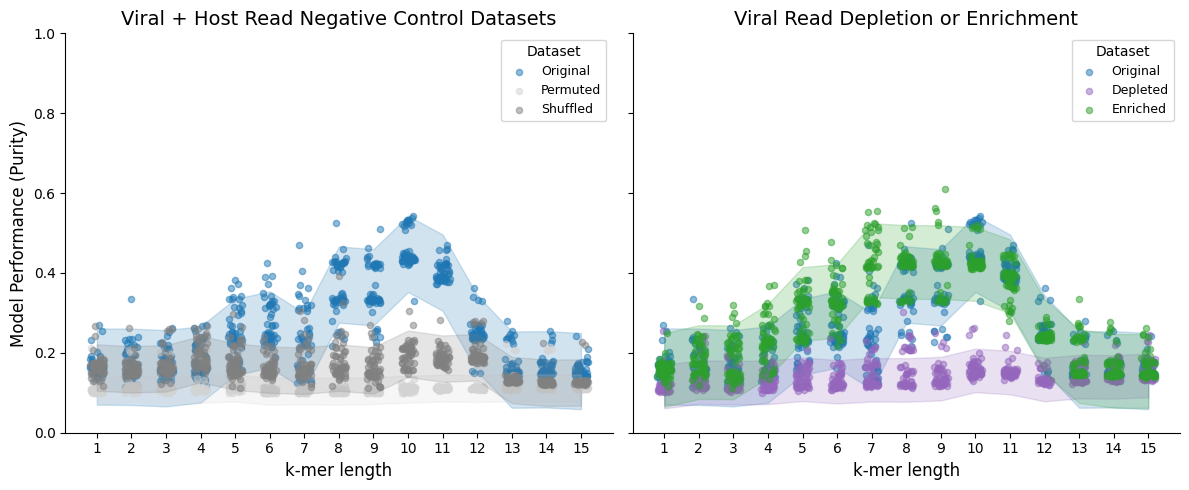

In [5]:
# combined figure for poster
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Set paths
kmer_csv_dir = "C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/cluster_outputs/"
fig_output_path = "C:/Users/DIR/Jupyter/Multi-strain classification/figures/fig_combined.png"

# Load first set
orig1 = pd.read_csv(os.path.join(kmer_csv_dir, "cluster_replicates_Original.csv"))
shuffled = pd.read_csv(os.path.join(kmer_csv_dir, "cluster_replicates_Original_shuffled.csv"))
perm = pd.read_csv(os.path.join(kmer_csv_dir, "cluster_replicates_Original_permuted.csv"))
orig1["Dataset"] = "Original"
shuffled["Dataset"] = "Shuffled"
perm["Dataset"] = "Permuted"
df1 = pd.concat([orig1, perm, shuffled], ignore_index=True)
df1 = df1[df1['k'].between(1, 15)]
palette1 = {'Original': '#1f77b4', 'Permuted': 'lightgrey', 'Shuffled': 'grey'}

# Load second set
orig2 = pd.read_csv(os.path.join(kmer_csv_dir, "cluster_replicates_Original.csv"))
depleted = pd.read_csv(os.path.join(kmer_csv_dir, "cluster_replicates_Depleted.csv"))
enriched = pd.read_csv(os.path.join(kmer_csv_dir, "cluster_replicates_Enriched.csv"))
orig2["Dataset"] = "Original"
depleted["Dataset"] = "Depleted"
enriched["Dataset"] = "Enriched"
df2 = pd.concat([orig2, depleted, enriched], ignore_index=True)
df2 = df2[df2['k'].between(1, 15)]
palette2 = {'Original': '#1f77b4', 'Depleted': '#9467bd', 'Enriched': '#2ca02c'}

# Set up 2-panel figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Panel A
for cond in ['Original', 'Permuted', 'Shuffled']:
    subset = df1[df1['Dataset'] == cond]
    if subset.empty:
        continue
    lo = lowess(subset['purity'], subset['k'], frac=0.2, return_sorted=True)
    xs, ys = lo[:, 0], lo[:, 1]
    resid = subset['purity'] - np.interp(subset['k'], xs, ys)
    ci = 1.96 * resid.std()
    axes[0].fill_between(xs, np.clip(ys - ci, 0, 1), np.clip(ys + ci, 0, 1), color=palette1[cond], alpha=0.2)
    xjit = subset['k'] + (np.random.rand(len(subset)) - 0.5) * 0.4
    axes[0].scatter(xjit, subset['purity'], alpha=0.5, s=20, color=palette1[cond], label=cond)

axes[0].set_title('Viral + Host Read Negative Control Datasets', fontsize=14)
axes[0].set_xlabel('k-mer length', fontsize=12)
axes[0].set_ylabel('Model Performance (Purity)', fontsize=12)
axes[0].set_xticks(sorted(df1['k'].unique()))
axes[0].set_ylim(0, 1)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].legend(title='Dataset', fontsize=9, title_fontsize=10)

# Panel B
for cond in ['Original', 'Depleted', 'Enriched']:
    subset = df2[df2['Dataset'] == cond]
    if subset.empty:
        continue
    lo = lowess(subset['purity'], subset['k'], frac=0.2, return_sorted=True)
    xs, ys = lo[:, 0], lo[:, 1]
    resid = subset['purity'] - np.interp(subset['k'], xs, ys)
    ci = 1.96 * resid.std()
    axes[1].fill_between(xs, np.clip(ys - ci, 0, 1), np.clip(ys + ci, 0, 1), color=palette2[cond], alpha=0.2)
    xjit = subset['k'] + (np.random.rand(len(subset)) - 0.5) * 0.4
    axes[1].scatter(xjit, subset['purity'], alpha=0.5, s=20, color=palette2[cond], label=cond)

axes[1].set_title('Viral Read Depletion or Enrichment', fontsize=14)
axes[1].set_xlabel('k-mer length', fontsize=12)
axes[1].set_xticks(sorted(df2['k'].unique()))
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].legend(title='Dataset', fontsize=9, title_fontsize=10)

fig.tight_layout()
fig.savefig(fig_output_path, dpi=300)
plt.show()

In [5]:
## Figure 7B Full Grid: F1, Accuracy, Precision, Recall across Original/Permuted/Shuffled and Enriched/Depleted
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec

# --- Load data ---
kmer_csv_dir = "C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/cluster_outputs/"

orig = pd.read_csv(os.path.join(kmer_csv_dir, "rf_folds_Original.csv"))
perm = pd.read_csv(os.path.join(kmer_csv_dir, "rf_folds_Original_permuted.csv"))
shuf = pd.read_csv(os.path.join(kmer_csv_dir, "rf_folds_Original_shuffled.csv"))
enr = pd.read_csv(os.path.join(kmer_csv_dir, "rf_folds_Enriched.csv"))
dep = pd.read_csv(os.path.join(kmer_csv_dir, "rf_folds_Depleted.csv"))

# --- Label datasets ---
orig["Permute"] = "Original"
perm["Permute"] = "Permuted"
shuf["Permute"] = "Shuffled"
enr["Permute"] = "Enriched"
dep["Permute"] = "Depleted"

# --- Combine datasets ---
df_left = pd.concat([orig, perm, shuf], ignore_index=True)
df_right = pd.concat([enr, dep], ignore_index=True)

# --- Color palettes ---
palette_left = {
    "Original": "#1f77b4",
    "Permuted": "#9467bd",
    "Shuffled": "#2ca02c"
}
palette_right = {
    "Enriched": "#ff7f0e",
    "Depleted": "#d62728"
}

# --- Plotting function ---
def plot_metric(ax, df, palette, metric, title):
    for cond in palette:
        subset = df[df["Permute"] == cond]
        if subset.empty or metric not in subset.columns:
            continue

        # LOWESS + 95% CI
        lo = lowess(subset[metric], subset["k"], frac=0.5, return_sorted=True)
        xs, ys = lo[:, 0], lo[:, 1]
        resid = subset[metric] - np.interp(subset["k"], xs, ys)
        ci = 1.96 * resid.std()

        ax.fill_between(xs,
                        np.clip(ys - ci, 0, 1),
                        np.clip(ys + ci, 0, 1),
                        color=palette[cond], alpha=0.2)

        xjit = subset["k"] + (np.random.rand(len(subset)) - 0.5) * 0.4
        ax.scatter(xjit, subset[metric],
                   alpha=0.5, s=25,
                   color=palette[cond], label=cond)

    ax.set_title(title, fontsize=12)
    ax.set_xlabel("k-mer length", fontsize=10)
    ax.set_ylabel(metric.capitalize(), fontsize=10)
    ax.set_xticks(sorted(df["k"].unique()))
    ax.set_ylim(0, 1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

# --- Setup 4x2 subplot grid ---
metrics = ["f1", "accuracy", "precision", "recall"]
titles_left = ["Original / Permuted / Shuffled — " + m.capitalize() for m in metrics]
titles_right = ["Enriched / Depleted — " + m.capitalize() for m in metrics]

fig, axes = plt.subplots(4, 2, figsize=(14, 18), sharex='col', sharey='row')

for i, metric in enumerate(metrics):
    plot_metric(axes[i, 0], df_left, palette_left, metric, titles_left[i])
    plot_metric(axes[i, 1], df_right, palette_right, metric, titles_right[i])

# --- Legends only in top-left subplots ---
handles_left = [Line2D([0], [0], marker='o', color='w', label=key,
                       markerfacecolor=color, markersize=8)
                for key, color in palette_left.items()]
handles_right = [Line2D([0], [0], marker='o', color='w', label=key,
                        markerfacecolor=color, markersize=8)
                 for key, color in palette_right.items()]
axes[0, 0].legend(handles=handles_left, title="Condition", loc='upper left')
axes[0, 1].legend(handles=handles_right, title="Condition", loc='upper left')

# --- Final formatting ---
fig.suptitle("Figure 7B: Random Forest Performance Metrics by k-mer Length", fontsize=18)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.savefig("C:/Users/DIR/Jupyter/Multi-strain classification/figures/fig7b.png", dpi=300)
plt.show()


KeyboardInterrupt: 

To asess the differntiability of each kmer abundance profiles originating from transcriptomes of virally infected cells, we performed Hierarchical Clustering and Random Forest Classification on kmer abundance profiles originating from samples infected with viruses grouped by family versus the mock condition. 

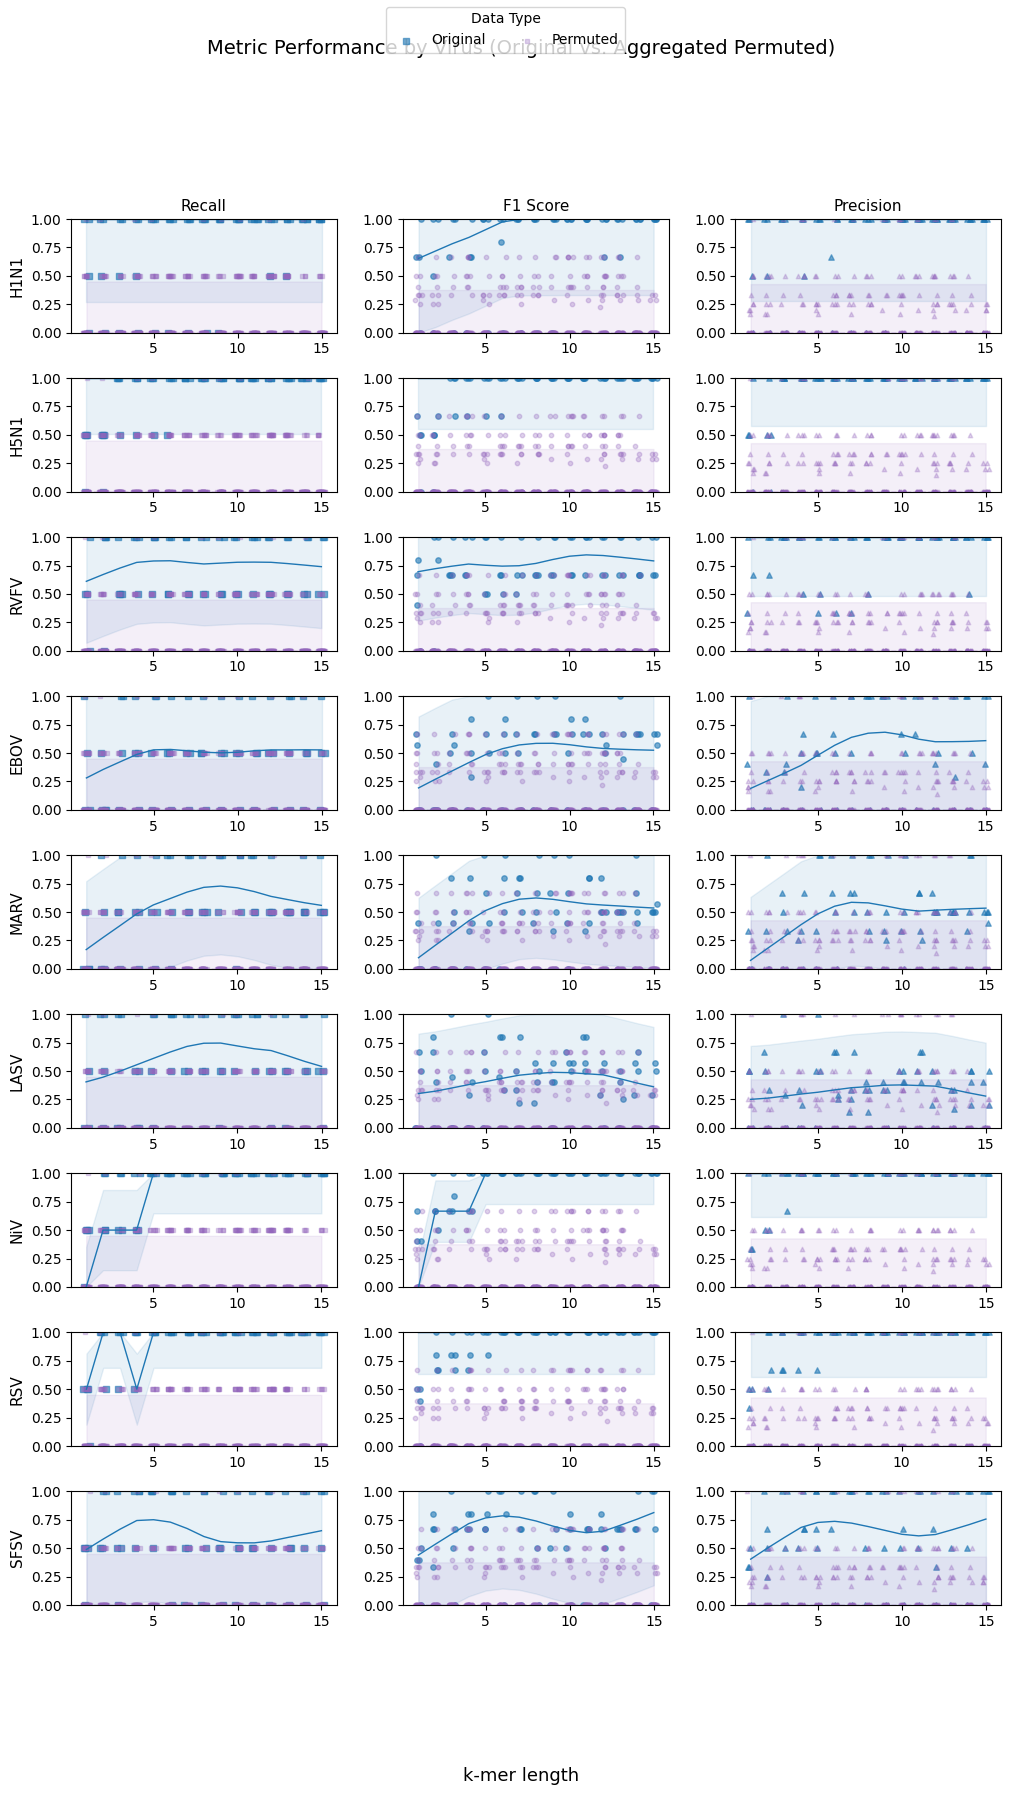

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.gridspec as gridspec

# --- Load Data ---
kmer_csv_dir = "C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/cluster_outputs/"
orig = pd.read_csv(os.path.join(kmer_csv_dir, "rf_folds_Original.csv"))
perm = pd.read_csv(os.path.join(kmer_csv_dir, "rf_folds_Original_permuted.csv"))

# --- Label datasets and combine ---
orig["Condition"] = "Original"
perm["Condition"] = "Permuted"
df = pd.concat([orig, perm], ignore_index=True)

# --- Define virus and metric order ---
virus_order = ["H1N1", "H5N1", "RVFV", "EBOV", "MARV", "LASV", "NiV", "RSV", "SFSV"]
sample_prefixes = [f"pc_{v}" for v in virus_order]
metrics = ["recall", "f1", "precision"]
metric_labels = {"f1": "F1 Score", "recall": "Recall", "precision": "Precision"}
markers = {"f1": "o", "recall": "s", "precision": "^"}
palette = {"Original": "#1f77b4", "Permuted": "#9467bd"}

# --- Aggregate permuted data by metric ---
permuted_agg = {}
for metric in metrics:
    combined = []
    for prefix in sample_prefixes:
        col = f"{prefix}_{metric}"
        if col in perm.columns:
            temp = perm[["k", col]].copy()
            temp = temp.rename(columns={col: "value"})
            combined.append(temp)
    permuted_agg[metric] = pd.concat(combined).dropna()

# --- Grid layout ---
nrows = len(sample_prefixes)  # 9 viruses
ncols = len(metrics)          # 3 metrics
fig = plt.figure(figsize=(12, 18))  # Increase figure height
gs = gridspec.GridSpec(nrows=nrows, ncols=ncols, height_ratios=[1.2]*nrows, hspace=0.4, wspace=0.25)

# --- Access axes manually via gs[row, col] ---
axes = np.empty((nrows, ncols), dtype=object)
for r in range(nrows):
    for c in range(ncols):
        axes[r, c] = fig.add_subplot(gs[r, c])

# --- Loop over virus x metric combinations ---
for row_idx, prefix in enumerate(sample_prefixes):
    virus_label = prefix.replace("pc_", "")
    for col_idx, metric in enumerate(metrics):
        ax = axes[row_idx, col_idx]
        metric_col = f"{prefix}_{metric}"

        # Plot original values
        subset = orig[["k", metric_col]].dropna()
        if not subset.empty:
            lo = lowess(subset[metric_col], subset["k"], frac=0.5, return_sorted=True)
            xs, ys = lo[:, 0], lo[:, 1]
            resid = subset[metric_col] - np.interp(subset["k"], xs, ys)
            ci = 1.96 * resid.std()

            # CI fill
            ax.fill_between(xs,
                            np.clip(ys - ci, 0, 1),
                            np.clip(ys + ci, 0, 1),
                            color=palette["Original"], alpha=0.1)

            # Scatter
            xjit = subset["k"] + (np.random.rand(len(subset)) - 0.5) * 0.4
            ax.scatter(xjit, subset[metric_col],
                       alpha=0.6, s=15,
                       color=palette["Original"], marker=markers[metric],
                       label="Original" if row_idx == 0 and col_idx == 0 else None)
            ax.plot(xs, ys, color=palette["Original"], linewidth=1)

        # Plot permuted values (aggregated across all viruses for that metric)
        perm_data = permuted_agg[metric]
        if not perm_data.empty:
            lo = lowess(perm_data["value"], perm_data["k"], frac=0.5, return_sorted=True)
            xs, ys = lo[:, 0], lo[:, 1]
            resid = perm_data["value"] - np.interp(perm_data["k"], xs, ys)
            ci = 1.96 * resid.std()

            ax.fill_between(xs,
                            np.clip(ys - ci, 0, 1),
                            np.clip(ys + ci, 0, 1),
                            color=palette["Permuted"], alpha=0.1)

            xjit = perm_data["k"] + (np.random.rand(len(perm_data)) - 0.5) * 0.4
            ax.scatter(xjit, perm_data["value"],
                       alpha=0.3, s=10,
                       color=palette["Permuted"], marker=markers[metric],
                       label="Permuted" if row_idx == 0 and col_idx == 0 else None)
            ax.plot(xs, ys, color=palette["Permuted"], linestyle='--', linewidth=1)

        if row_idx == 0:
            ax.set_title(metric_labels[metric], fontsize=11)
        if col_idx == 0:
            ax.set_ylabel(virus_label, fontsize=11)

        ax.set_ylim(0, 1)
        ax.grid(False)

# --- Legend ---
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, title="Data Type", fontsize=10)

# --- Final touches ---
fig.supxlabel("k-mer length", fontsize=13)
fig.suptitle("Metric Performance by Virus (Original vs. Aggregated Permuted)", fontsize=14)
#fig.savefig("C:/Users/DIR/Jupyter/Multi-strain classification/figures/virus_by_metric.png", dpi=300)
plt.show()


### Figure 8

In [11]:
## Overall Parameters for Figure 8
import os
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
from scipy.cluster.hierarchy import linkage, to_tree
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold

# PARAMETERS
kmer_csv_dir = "C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/kmer_tables"
kmer_range = range(1, 10)
bootstrap_iterations = 25
bootstrap_fraction = 0.8
datasets = {
    "Depleted": "_results_high.csv",
    "Normal": "_results_unfiltered.csv",
    "Enriched": "_results_enriched.csv"
}

# PURITY FUNCTION
def compute_purity(linkage_matrix, labels):
    tree, _ = to_tree(linkage_matrix, rd=True)
    id_to_label = {i: labels[i] for i in range(len(labels))}
    label_to_indices = defaultdict(list)
    for i, label in enumerate(labels):
        label_to_indices[label].append(i)

    class_purities = {}
    for label, indices in label_to_indices.items():
        indices_set = set(indices)

        def find_subtree(node):
            if node.is_leaf():
                return node if node.id in indices_set else None
            left = find_subtree(node.left)
            right = find_subtree(node.right)
            if left and right:
                return node
            return left or right

        subtree = find_subtree(tree)
        if subtree:
            leaf_ids = subtree.pre_order()
            all_labels = [id_to_label[i] for i in leaf_ids]
            counts = Counter(all_labels)
            purity = counts[label] / len(all_labels)
            class_purities[label] = round(purity, 4)
        else:
            class_purities[label] = 0.0

    return np.mean(list(class_purities.values()))

# RUN CLUSTERING + BOOTSTRAP
tree_results = []
for condition, suffix in datasets.items():
    for k in kmer_range:
        file_path = os.path.join(kmer_csv_dir, f"multivirus_{k}mer{suffix}")
        if not os.path.exists(file_path):
            continue
        df = pd.read_csv(file_path)
        if "Virus" not in df.columns or "HPI" not in df.columns:
            continue
        df = df[~df["HPI"].isin([3, 6])]
        if df.empty:
            continue

        feature_cols = [col for col in df.columns if col not in ["Accession", "Filter", "Virus", "HPI"]]
        X = df[feature_cols].values
        y = df["Virus"].values

        for i in range(bootstrap_iterations):
            idx = np.random.choice(len(df), int(len(df) * bootstrap_fraction), replace=False)
            X_sample = X[idx]
            y_sample = y[idx]

            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X_sample)
            linkage_matrix = linkage(X_scaled, method='ward')
            purity = compute_purity(linkage_matrix, y_sample)

            tree_results.append({
                "Condition": condition,
                "k": k,
                "Iteration": i + 1,
                "Metric": "Purity",
                "Value": purity
            })

results_df = pd.DataFrame(tree_results)
results_df.to_csv(os.path.join(kmer_csv_dir, "fig8_tree_purity_bootstrap.csv"), index=False)

# === BLOCK 2: Random Forest with K-Fold CV (Exports CSV) ===

rf_results = []

for condition, suffix in datasets.items():
    for k in kmer_range:
        file_path = os.path.join(kmer_csv_dir, f"multivirus_{k}mer{suffix}")
        if not os.path.exists(file_path):
            continue

        df = pd.read_csv(file_path)
        if "Virus" not in df.columns or "HPI" not in df.columns:
            continue

        df = df[~df["HPI"].isin([3, 6])]
        if df.empty:
            continue

        feature_cols = [col for col in df.columns if col not in ["Accession", "Filter", "Virus", "HPI"]]

        # Equalize class sizes to the smallest class size
        class_counts = df["Virus"].value_counts()
        min_class_size = class_counts.min()

        balanced_frames = []
        for label in class_counts.index:
            df_label = df[df["Virus"] == label]
            if len(df_label) >= min_class_size:
                balanced_frames.append(df_label.sample(n=min_class_size, random_state=42))

        df_balanced = pd.concat(balanced_frames).sample(frac=1, random_state=42).reset_index(drop=True)

        X = df_balanced[feature_cols].values
        y = df_balanced["Virus"].values

        # Determine the number of splits dynamically based on min class count
        max_splits = min(10, min_class_size)  # Cap at 10 to avoid excessive splitting
        if max_splits < 2:
            continue  # Skip if not enough data for splitting

        skf = StratifiedKFold(n_splits=max_splits, shuffle=True, random_state=42)

        for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            clf = RandomForestClassifier(n_estimators=100, random_state=42)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)

            rf_results.extend([
                {"Condition": condition, "k": k, "Iteration": fold + 1, "Metric": "Precision",
                 "Value": precision_score(y_test, y_pred, average="macro", zero_division=0)},
                {"Condition": condition, "k": k, "Iteration": fold + 1, "Metric": "Recall",
                 "Value": recall_score(y_test, y_pred, average="macro", zero_division=0)},
                {"Condition": condition, "k": k, "Iteration": fold + 1, "Metric": "F1",
                 "Value": f1_score(y_test, y_pred, average="macro", zero_division=0)}
            ])

            # Confusion matrix for last fold of each k/condition
            labels = sorted(np.unique(np.concatenate([y_test, y_pred])))
            cm = confusion_matrix(y_test, y_pred, labels=labels)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

            fig_cm, ax_cm = plt.subplots(figsize=(8, 6))
            disp.plot(ax=ax_cm, cmap="Blues", xticks_rotation=45)
            ax_cm.set_title(f"Confusion Matrix (Condition: {condition}, k={k}, Fold {fold + 1})")
            plt.tight_layout()
            plt.show()

# Save all RF performance metrics to CSV
rf_df = pd.DataFrame(rf_results)
rf_df.to_csv(os.path.join(kmer_csv_dir, "fig8_rf_bootstrap_metrics.csv"), index=False)

# Plot Fig 8
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load CSVs
tree_df = pd.read_csv(os.path.join(kmer_csv_dir, "fig8_tree_purity_bootstrap.csv"))
rf_df = pd.read_csv(os.path.join(kmer_csv_dir, "fig8_rf_bootstrap_metrics.csv"))

# Combine
df = pd.concat([tree_df, rf_df], ignore_index=True)

# Palette
palette = {
    "Depleted": "#1f77b4",
    "Normal": "#d62728",
    "Enriched": "#9467bd"
}

# Set up plot
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
metric_titles = {
    "Purity": "A) Tree Purity",
    "F1": "B) Random Forest F1 Score",
    "Recall": "C) Random Forest Recall",
    "Precision": "D) Random Forest Precision"
}
metric_axes = {
    "Purity": axs[0, 0],
    "F1": axs[0, 1],
    "Recall": axs[1, 0],
    "Precision": axs[1, 1]
}

for metric, ax in metric_axes.items():
    for condition in palette:
        subset = df[(df["Condition"] == condition) & (df["Metric"] == metric)]

        if subset.empty:
            continue

        # Fit LOWESS curve
        lowess_fit = lowess(subset["Value"], subset["k"], frac=0.5, return_sorted=True)
        smoothed_k = lowess_fit[:, 0]
        smoothed_y = lowess_fit[:, 1]

        # Estimate residuals for CI
        residuals = subset["Value"] - np.interp(subset["k"], smoothed_k, smoothed_y)
        std = residuals.std()
        ci = 1.96 * std

        # Plot shaded confidence band
        ax.fill_between(smoothed_k, smoothed_y - ci, smoothed_y + ci,
                    alpha=0.2, color=palette[condition])

        # Plot LOWESS mean line
        ax.plot(smoothed_k, smoothed_y, color=palette[condition], linewidth=1.5)

        # Plot points
        jittered_k = subset["k"] + (np.random.rand(len(subset)) - 0.5) * 0.8
        ax.scatter(jittered_k, subset["Value"], alpha=0.5, s=25, color=palette[condition])


    # Axis labels
    ax.set_title(metric_titles[metric], fontsize=14)
    ax.set_ylim(top=1.0)
    ax.set_xlabel("k-mer length", fontsize=14)
    if metric == "Purity":
        ax.set_ylabel("Mean Class Purity", fontsize=14)
    else:
        ax.set_ylabel(metric, fontsize=14)

    ax.set_xticks(sorted(df["k"].unique()))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(False)

# Shared legend
handles = [
    Line2D([0], [0], marker='o', color='w', label=cond,
           markerfacecolor=palette[cond], markersize=8)
    for cond in palette
]
fig.legend(handles=handles, title="Condition", loc='lower center',
           ncol=len(palette), fontsize=14, title_fontsize=15, bbox_to_anchor=(0.5, -0.02))

fig.suptitle("Figure 8: Hierarchical Clustering and Random Forest Performance on Virally Depleted versus Enriched Transcriptomes", fontsize=20, y=1.03)
fig.tight_layout(rect=[0, 0.05, 1, 0.97])
fig.savefig("C:/Users/DIR/Jupyter/Multi-strain classification/figures/fig8.png", dpi=300)
plt.show()

KeyboardInterrupt: 

C:\Users\DIR\AppData\Local\Temp\ipykernel_17740\18615680.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.98])


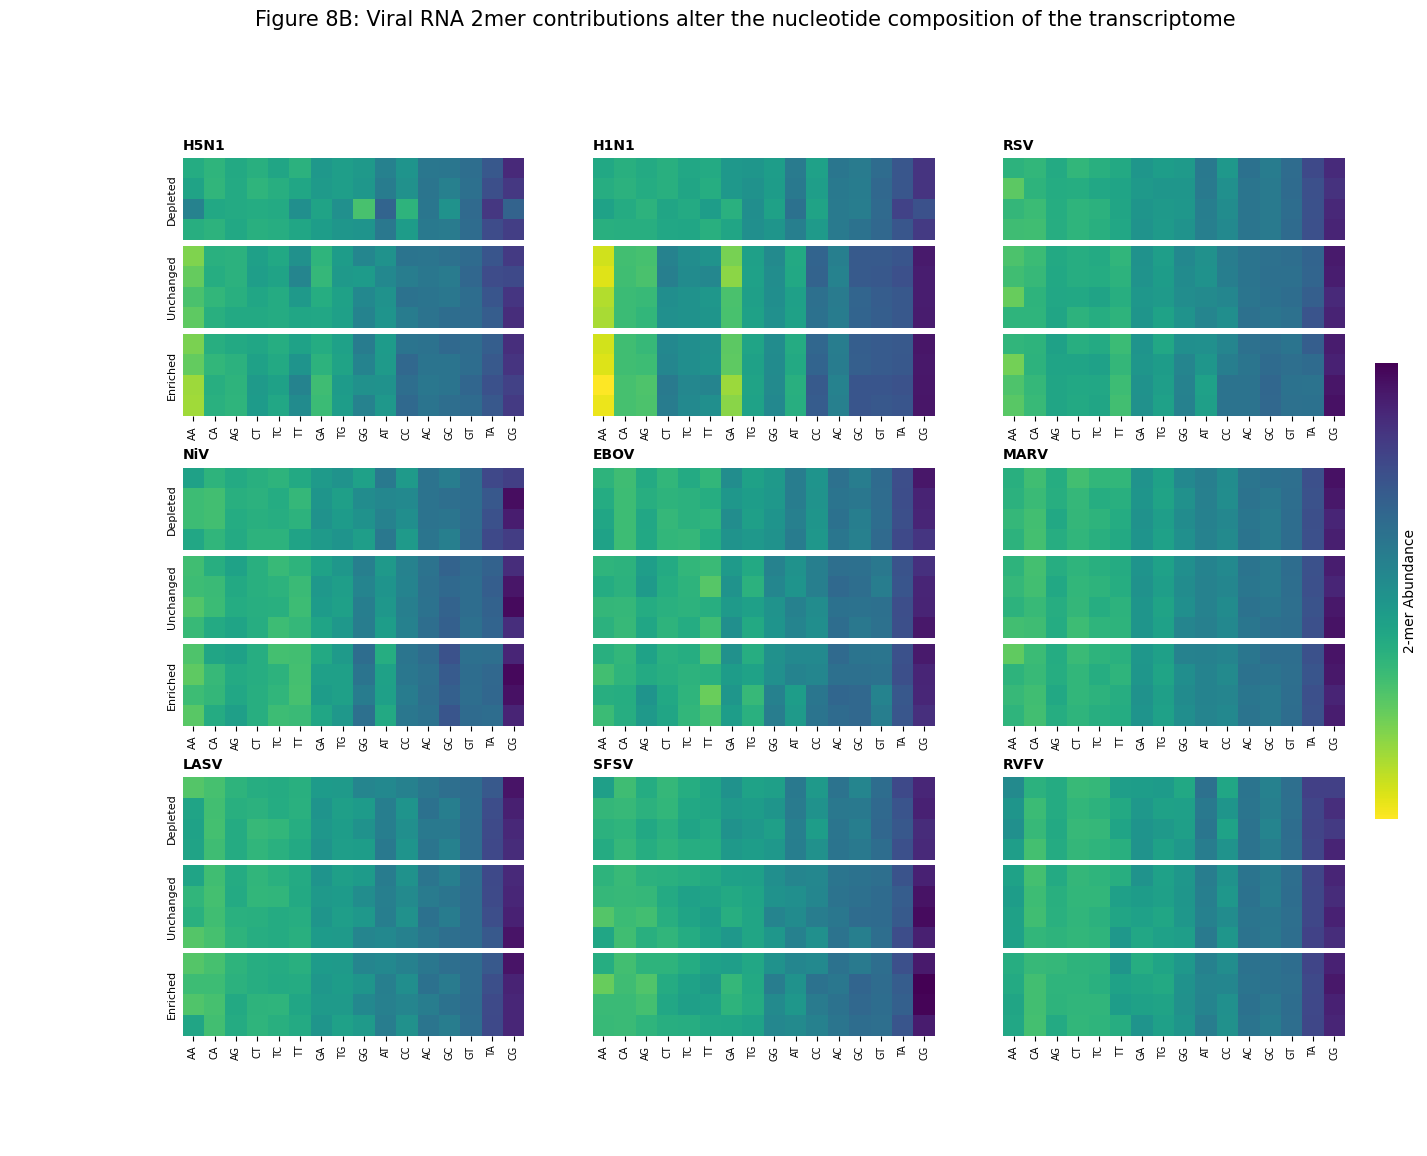

In [13]:
##Figure 8B
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Setup
base_path = "C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/kmer_tables"
file_paths = {
    "Depleted": "multivirus_2mer_results_depleted.csv",
    "Unchanged": "multivirus_2mer_results_unchanged.csv",
    "Enriched": "multivirus_2mer_results_enriched.csv"
}
virus_order = ["H5N1", "H1N1", "RSV", "NiV", "EBOV", "MARV", "LASV", "SFSV", "RVFV"]
condition_order = ["Depleted", "Unchanged", "Enriched"]

# Load and clean
all_data = {}
kmer_cols = None
for cond, file in file_paths.items():
    df = pd.read_csv(os.path.join(base_path, file))
    df = df[~df["HPI"].isin([3, 6])]
    df = df[df["Virus"].isin(virus_order)]
    if kmer_cols is None:
        kmer_cols = [col for col in df.columns if len(col) == 2 and col.isalpha()]
    all_data[cond] = df

# k-mer order and color scale
all_kmers = pd.concat([all_data[c][kmer_cols] for c in condition_order])
kmer_order = all_kmers.mean().sort_values(ascending=False).index.tolist()
vmin, vmax = all_kmers.min().min(), all_kmers.max().max()

# Plot: one subplot per virus, each with 3 stacked heatmaps
n_cols = 3
n_rows = int(np.ceil(len(virus_order) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 3.8 * n_rows), squeeze=False)

for idx, virus in enumerate(virus_order):
    r, c = divmod(idx, n_cols)
    outer_ax = axes[r, c]
    outer_ax.axis('off')
    box = outer_ax.get_position()

    gap = 0.005
    height = (box.height - 2 * gap) / 3
    y_start = box.y0

    # Add virus label at top-left corner
    fig.text(box.x0, y_start + 3 * (height + gap), virus, fontsize=10, weight='bold', ha='left', va='bottom')

    for i, cond in enumerate(condition_order):
        inner_pos = [box.x0, y_start + (2 - i) * (height + gap), box.width, height]
        inner_ax = fig.add_axes(inner_pos)

        sub = all_data[cond][all_data[cond]["Virus"] == virus]
        if not sub.empty:
            sns.heatmap(sub[kmer_order], ax=inner_ax, cmap="viridis",
                        vmin=vmin, vmax=vmax, xticklabels=(i == 2), yticklabels=False,
                        cbar=False, linewidths=0)

        if c == 0:
            inner_ax.set_ylabel(cond, fontsize=8)
        else:
            inner_ax.set_ylabel("")

        inner_ax.set_xticklabels(inner_ax.get_xticklabels(), rotation=90, fontsize=7)
        inner_ax.tick_params(left=False, bottom=True, labelbottom=(i == 2))

# Remove unused axes
for i in range(len(virus_order), n_rows * n_cols):
    fig.delaxes(axes[i // n_cols, i % n_cols])

# Shared colorbar
cbar_ax = fig.add_axes([0.92, 0.3, 0.015, 0.4])
sns.heatmap(pd.DataFrame([[vmin, vmax]]), cbar_ax=cbar_ax, cmap="viridis",
            vmin=vmin, vmax=vmax, xticklabels=False, yticklabels=False, cbar=True)
cbar_ax.set_ylabel("2-mer Abundance")

# Suptitle + tighter layout
plt.suptitle("Figure 8B: Viral RNA 2mer contributions alter the nucleotide composition of the transcriptome",
             fontsize=15, y=1.01)
plt.subplots_adjust(wspace=0.3, hspace=0.2)
plt.tight_layout(rect=[0, 0, 0.9, 0.98])
fig.savefig("C:/Users/DIR/Jupyter/Multi-strain classification/figures/fig8b.png", dpi=300, bbox_inches='tight')
plt.show()


### Figure 9

In [ ]:
#Figure 9: Confusion Matrices of RF trained on kmer data vs depleted data
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Parameters
kmer_csv_dir = "C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/kmer_tables"
k_range = range(1, 8)
results = []

def load_data(file_path):
    df = pd.read_csv(file_path)
    df = df[
        (df["Virus"] != "Mock") &
        (df["HPI"] != 3) &
        (df["HPI"] != 6)
    ]
    excluded_cols = ["Accession", "Filter", "Virus", "HPI"]
    feature_cols = [c for c in df.columns if c not in excluded_cols]
    X = df[feature_cols].values
    y = df["Virus"].values
    return X, y, sorted(np.unique(y))

def run_rf_cv(X, y, class_labels, k, condition):
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    agg_cm = np.zeros((len(class_labels), len(class_labels)), dtype=int)
    all_y_true = []
    all_y_pred = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        cm = confusion_matrix(y_test, y_pred, labels=class_labels)
        agg_cm += cm
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)

    overall_acc = accuracy_score(all_y_true, all_y_pred)
    report = classification_report(all_y_true, all_y_pred, output_dict=True, labels=class_labels)
    df_report = pd.DataFrame(report).T.reset_index()
    df_report['k'] = k
    df_report['Condition'] = condition
    df_report['Overall_Accuracy'] = overall_acc

    return df_report, agg_cm, class_labels

# Set up figure
fig, axs = plt.subplots(3, len(k_range), figsize=(4.5 * len(k_range), 13))
axs = axs.reshape(3, len(k_range))

for col_idx, k in enumerate(k_range):
    full_path = os.path.join(kmer_csv_dir, f"multivirus_{k}mer_results_unfiltered.csv")
    medium_path = os.path.join(kmer_csv_dir, f"multivirus_{k}mer_results_medium.csv")
    depleted_path = os.path.join(kmer_csv_dir, f"multivirus_{k}mer_results_high.csv")


    if not all(os.path.exists(p) for p in [full_path, medium_path, depleted_path]):
        for row in range(4):
            axs[row, col_idx].axis('off')
        continue

    X_full, y_full, labels = load_data(full_path)
    X_medium, y_medium, _ = load_data(medium_path)
    X_depleted, y_depleted, _ = load_data(depleted_path)

    df_full, cm_full, lbls = run_rf_cv(X_full, y_full, labels, k, "Full")
    df_medium, cm_medium, _ = run_rf_cv(X_medium, y_medium, labels, k, "Medium")
    df_depleted, cm_depleted, _ = run_rf_cv(X_depleted, y_depleted, labels, k, "Depleted")

    results.extend([df_full, df_medium, df_depleted])

    for row_idx, (cm, condition) in enumerate(zip([cm_full, cm_medium, cm_depleted], ["Full", "Medium", "Depleted"])):
        ax = axs[row_idx, col_idx]
        ax.imshow(cm, cmap='Blues')
        ax.set_title(f"k={k} {condition}")
        ax.set_xticks(np.arange(len(lbls)))
        ax.set_yticks(np.arange(len(lbls)))
        ax.set_xticklabels(lbls, rotation=90)
        ax.set_yticklabels(lbls)

fig.suptitle("Figure 9: Confusion Matrices of RF Classifiers for K-mer Profiles from Virally Depleted Data", fontsize=30, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leaves space at the top for the suptitle
fig_path = os.path.join(kmer_csv_dir, "fig9.png")
fig.savefig("C:/Users/DIR/Jupyter/Multi-strain classification/figures/fig9.png", dpi=300, bbox_inches='tight')
plt.show()

# Save results
final_stats = pd.concat(results, ignore_index=True)
stats_path = os.path.join(kmer_csv_dir, "cm_data_fig9.csv")
#final_stats.to_csv(stats_path, index=False)

Figure 9: 3 reads from the raw .fastq files were aligned to a set of viral reference genomes to identify and remove the reads matching viral genomes. Two different stringency levels were used "medium" and "depleted" representing different depletion levels of viral reads. The RF classifiers trained on data with the original amount of viral reads present was the most learnable by the RF classifier.

### Figure 10:

In [ ]:
#Figure 10: Confusion Matrices of RF trained on kmer data from infected vs non-infected
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Parameters
kmer_csv_dir = "C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/kmer_tables"
k_range = range(1, 8)
results = []

def load_binary_data(file_path):
    df = pd.read_csv(file_path)
    df["Label"] = df["Virus"].apply(lambda x: "Mock" if x == "Mock" else "Infected")
    excluded_cols = ["Accession", "Filter", "Virus"]
    feature_cols = [c for c in df.columns if c not in excluded_cols + ["Label"]]
    X = df[feature_cols].values
    y = df["Label"].values
    return X, y, sorted(np.unique(y))

def run_rf_cv(X, y, class_labels, k, condition):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    agg_cm = np.zeros((len(class_labels), len(class_labels)), dtype=int)
    all_y_true = []
    all_y_pred = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        cm = confusion_matrix(y_test, y_pred, labels=class_labels)
        agg_cm += cm
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)

    overall_acc = accuracy_score(all_y_true, all_y_pred)
    report = classification_report(all_y_true, all_y_pred, output_dict=True, labels=class_labels)
    df_report = pd.DataFrame(report).T.reset_index()
    df_report['k'] = k
    df_report['Condition'] = condition
    df_report['Overall_Accuracy'] = overall_acc

    return df_report, agg_cm, class_labels

# Create plot
fig, axs = plt.subplots(2, len(k_range), figsize=(4.5 * len(k_range), 10))
axs = axs.flatten()

for i, k in enumerate(k_range):
    full_path = os.path.join(kmer_csv_dir, f"multivirus_{k}mer_results_unfiltered.csv")
    depleted_path = os.path.join(kmer_csv_dir, f"multivirus_{k}mer_results_high.csv")

    if not os.path.exists(full_path) or not os.path.exists(depleted_path):
        continue

    X_full, y_full, labels = load_binary_data(full_path)
    X_depleted, y_depleted, _ = load_binary_data(depleted_path)

    df_full, cm_full, lbls = run_rf_cv(X_full, y_full, labels, k, "Full")
    df_depleted, cm_depleted, _ = run_rf_cv(X_depleted, y_depleted, labels, k, "Depleted")

    results.append(df_full)
    results.append(df_depleted)

    # Plot confusion matrices
    ax_f = axs[i]
    ax_d = axs[i + len(k_range)]
    ax_f.imshow(cm_full, cmap='Blues')
    ax_d.imshow(cm_depleted, cmap='Blues')
    ax_f.set_title(f"k={k} Full")
    ax_d.set_title(f"k={k} Depleted")

    for ax in (ax_f, ax_d):
        ax.set_xticks(np.arange(len(lbls)))
        ax.set_yticks(np.arange(len(lbls)))
        ax.set_xticklabels(lbls, rotation=90)
        ax.set_yticklabels(lbls)

plt.tight_layout()
fig.savefig("C:/Users/DIR/Jupyter/Multi-strain classification/figures/fig10.png", dpi=300, bbox_inches='tight')
plt.show()

# Save results
final_stats = pd.concat(results, ignore_index=True)
stats_path = os.path.join(kmer_csv_dir, "rf_binary_mock_vs_infected_stats_balanced.csv")
final_stats.to_csv(stats_path, index=False)


Figure 8: RF classifiers trained on the permuted data were unable to learn the differences between each class, indicating that the model is not overfitting on this dataset. RF classifiers trained on data where the nucleotides were shuffled between reads were still able to classify viruses accurately but at lower kmer lengths.

### Figure 11:

Figure 11: Transcript-level abundance estimation was performed using Salmon v1.10.2 in quasi-mapping mode. The reference transcriptome index was generated using the Ensembl cDNA reference (Homo_sapiens.GRCh38.cdna.all.fa.gz) with the command:

bash
Copy code
salmon index -t Homo_sapiens.GRCh38.cdna.all.fa.gz -i salmon_index
Quantification was carried out on a high-performance computing (HPC) cluster using SLURM array jobs, with each sample processed individually as follows:

bash
Copy code
salmon quant -i salmon_index -l A -r <sample>.fastq.gz -p 16 -o quant/<sample>/
The quant.sf output files from Salmon, containing transcript-level TPM estimates, were generated for all successfully processed samples.

Transcript-to-Gene Mapping
To enable gene-level quantification, transcript identifiers in the quant.sf files were mapped to Ensembl gene IDs using a transcript-to-gene lookup table (tx2gene.tsv). This mapping was derived by parsing FASTA headers in the Ensembl cDNA file (.fa.gz). Transcript and gene version suffixes (e.g., .2, .5) were stripped to ensure consistency with Salmon output.

TPM Aggregation and Matrix Construction
For each sample, transcript-level TPM values were aggregated to the gene level by summing TPMs across transcripts belonging to the same gene. This was done using a custom Python script that iteratively parsed each quant.sf file, joined it to the tx2gene mapping, and computed per-gene TPM values.

Gene-level TPM vectors for all samples were merged into a single expression matrix, with rows corresponding to samples and columns to Ensembl gene IDs. The matrix was merged with the metadata file to produce a comprehensive dataset suitable for machine learning and clustering analyses. Missing values were filled with zero. The final output was saved as a CSV file: gene_tpm_w_metadata.csv.

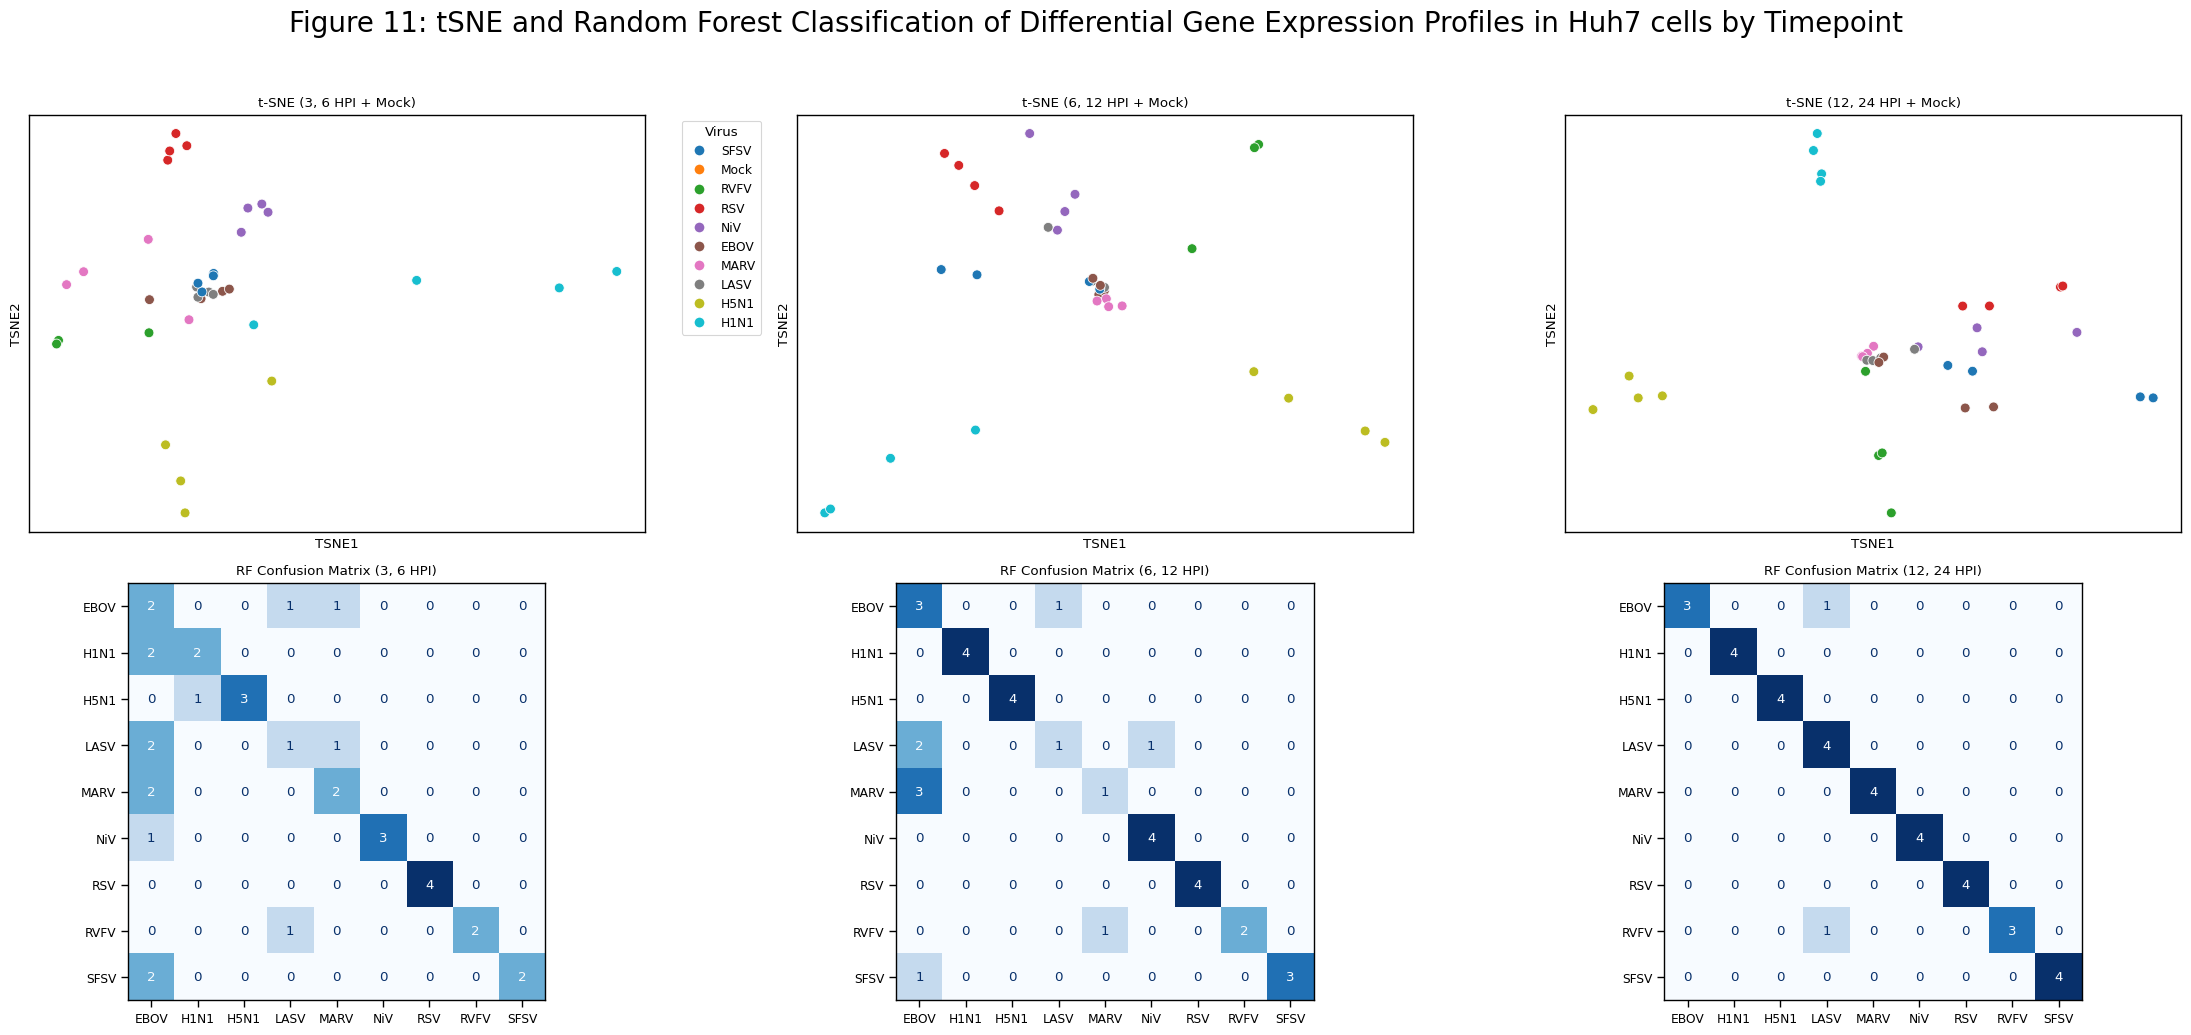

In [91]:
#Figure 11: Confusion Matrix and Hclust of Differential Gene Expression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

# Cell 2: Load and filter data
df = pd.read_csv("C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/gene_tpm_w_metadata.csv")

# Timepoint sets per column
timepoint_sets = [
    [3, 6],
    [6, 12],
    [12, 24]
]

# Color palette
unique_viruses_all = df["Virus"].unique()
palette = sns.color_palette("tab10", len(unique_viruses_all))
virus_color_dict = dict(zip(unique_viruses_all, palette))

# Setup figure with tight layout
fig, axs = plt.subplots(2, 3, figsize=(22, 10))
plt.tight_layout()

for col_idx, timepoints in enumerate(timepoint_sets):
    # t-SNE (includes Mock)
    include_all = df["HPI"].isin(timepoints)
    df_tsne = df[include_all].copy()

    meta_cols = ["Run", "Library Name", "Virus", "HPI"]
    X_tsne = df_tsne.drop(columns=meta_cols)
    y_tsne = df_tsne["Virus"]

    X_tsne = X_tsne.loc[:, X_tsne.std() > 0]
    X_scaled_tsne = (X_tsne - X_tsne.mean()) / X_tsne.std()
    X_scaled_tsne = X_scaled_tsne.dropna(axis=1)

    ax_tsne = axs[0, col_idx]
    if len(X_scaled_tsne) > 2:
        tsne = TSNE(n_components=2, perplexity=30, random_state=42)
        tsne_results = tsne.fit_transform(X_scaled_tsne)
        tsne_df = pd.DataFrame(tsne_results, columns=["TSNE1", "TSNE2"])
        tsne_df["Virus"] = y_tsne.values

        sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2", hue="Virus",
                        palette=virus_color_dict, s=50, ax=ax_tsne, legend=False)
        ax_tsne.set_title(f"t-SNE ({', '.join(map(str, timepoints))} HPI + Mock)")
        ax_tsne.set_xticks([])
        ax_tsne.set_yticks([])
    else:
        ax_tsne.set_title("Too few samples for t-SNE")
        ax_tsne.axis("off")

    # Random Forest Confusion Matrix (excludes Mock)
    include_rf = df["HPI"].isin(timepoints)
    df_rf = df[include_rf].copy()
    X_rf = df_rf.drop(columns=meta_cols)
    y_rf = df_rf["Virus"]

    X_rf = X_rf.loc[:, X_rf.std() > 0]
    ax_cm = axs[1, col_idx]
    if len(X_rf) < 2 or y_rf.nunique() < 2:
        ax_cm.set_title("Not enough samples for RF")
        ax_cm.axis("off")
    else:
        splits = min(5, len(y_rf) // y_rf.nunique())
        if splits < 2:
            ax_cm.set_title("Too few samples for CV")
            ax_cm.axis("off")
        else:
            rf = RandomForestClassifier(n_estimators=100, random_state=42)
            cv = StratifiedKFold(n_splits=splits, shuffle=True, random_state=42)
            y_pred = cross_val_predict(rf, X_rf, y_rf, cv=cv)
            cm = confusion_matrix(y_rf, y_pred, labels=np.unique(y_rf))
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_rf))
            disp.plot(ax=ax_cm, cmap="Blues", colorbar=False)
            ax_cm.set_title(f"RF Confusion Matrix ({', '.join(map(str, timepoints))} HPI)")
            ax_cm.set_xlabel("")
            ax_cm.set_ylabel("")

# Legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=v,
                      markerfacecolor=c, markersize=8)
           for v, c in virus_color_dict.items()]
axs[0, 0].legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', title="Virus")

fig.suptitle("Figure 11: tSNE and Random Forest Classification of Differential Gene Expression Profiles in Huh7 cells by Timepoint", fontsize=20, y=1.03)
plt.tight_layout()
plt.savefig("C:/Users/DIR/Jupyter/Multi-strain classification/figures/fig11.png", dpi=300, bbox_inches="tight")
plt.show()

In [13]:
# create top 100 file
import pandas as pd

# Load .txt file
df = pd.read_csv("C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/mart_export.txt", delimiter=",").dropna(subset=["GO term name"])

# Group GO terms per gene
gene_to_go = (
    df.groupby("Gene stable ID")["GO term name"]
    .apply(lambda terms: "; ".join(sorted(set(terms))))
    .to_dict()
)

# Define a function to bin GO terms into coarse categories
def assign_category(go_terms):
    go_terms = go_terms.lower()
    if "immune" in go_terms or "defense" in go_terms:
        return "Immune"
    elif "ribosome" in go_terms or "translation" in go_terms:
        return "Translation"
    elif "metabolic" in go_terms or "biosynthetic" in go_terms:
        return "Metabolism"
    elif "signaling" in go_terms or "kinase" in go_terms:
        return "Signaling"
    elif "cell cycle" in go_terms:
        return "Cell Cycle"
    elif "transport" in go_terms:
        return "Transport"
    elif "chromatin" in go_terms or "nucleosome" in go_terms or "telomere" in go_terms:
        return "Chromatin"
    elif "spliceosome" in go_terms or "rna splicing" in go_terms or "mRNA processing" in go_terms:
        return "RNA Processing"
    elif "actin" in go_terms or "cytoskeleton" in go_terms or "muscle" in go_terms or "myosin" in go_terms:
        return "Cytoskeleton"
    elif "endoplasmic reticulum" in go_terms or "golgi" in go_terms or "protein folding" in go_terms:
        return "Secretory Pathway"
    else:
        return "Other"

# Apply the binning function
gene_to_category = {gene: assign_category(go_terms) for gene, go_terms in gene_to_go.items()}

from collections import Counter

# Count how many genes per category
category_counts = Counter(gene_to_category.values())

# Display
for category, count in category_counts.items():
    print(f"{category}: {count}")


Translation: 31
Cytoskeleton: 3
Immune: 18
Signaling: 7
Metabolism: 8
Transport: 11
Cell Cycle: 2
Secretory Pathway: 2
Other: 1
RNA Processing: 1
Chromatin: 11


In [12]:
# Create list of (gene, GO terms) for genes assigned to "Other"
other_gene_go_terms = {
    gene: gene_to_go[gene]
    for gene, category in gene_to_category.items()
    if category == "Other"
}

# Print them out
for gene, go_terms in other_gene_go_terms.items():
    print(f"{gene}:\n  GO terms → {go_terms}\n")


ENSG00000034510:
  GO terms → actin binding; actin filament organization; actin monomer binding; cytoplasm; cytoskeleton; protein binding; regulation of cell migration

ENSG00000092841:
  GO terms → brush border; calcium ion binding; cytoskeletal motor activity; cytosol; extracellular exosome; membrane; microfilament motor activity; muscle contraction; muscle filament sliding; myosin II complex; myosin complex; protein binding; skeletal muscle tissue development; structural constituent of muscle; unconventional myosin complex; vesicle

ENSG00000144649:
  GO terms → Golgi apparatus; caveola; endomembrane system; endoplasmic reticulum; extracellular region; intracellular membrane-bounded organelle; membrane

ENSG00000150394:
  GO terms → adherens junction; adherens junction organization; axon terminus; beta-catenin binding; cadherin binding; calcium ion binding; calcium-dependent cell-cell adhesion via plasma membrane cell adhesion molecules; catenin complex; cell adhesion; cell migratio

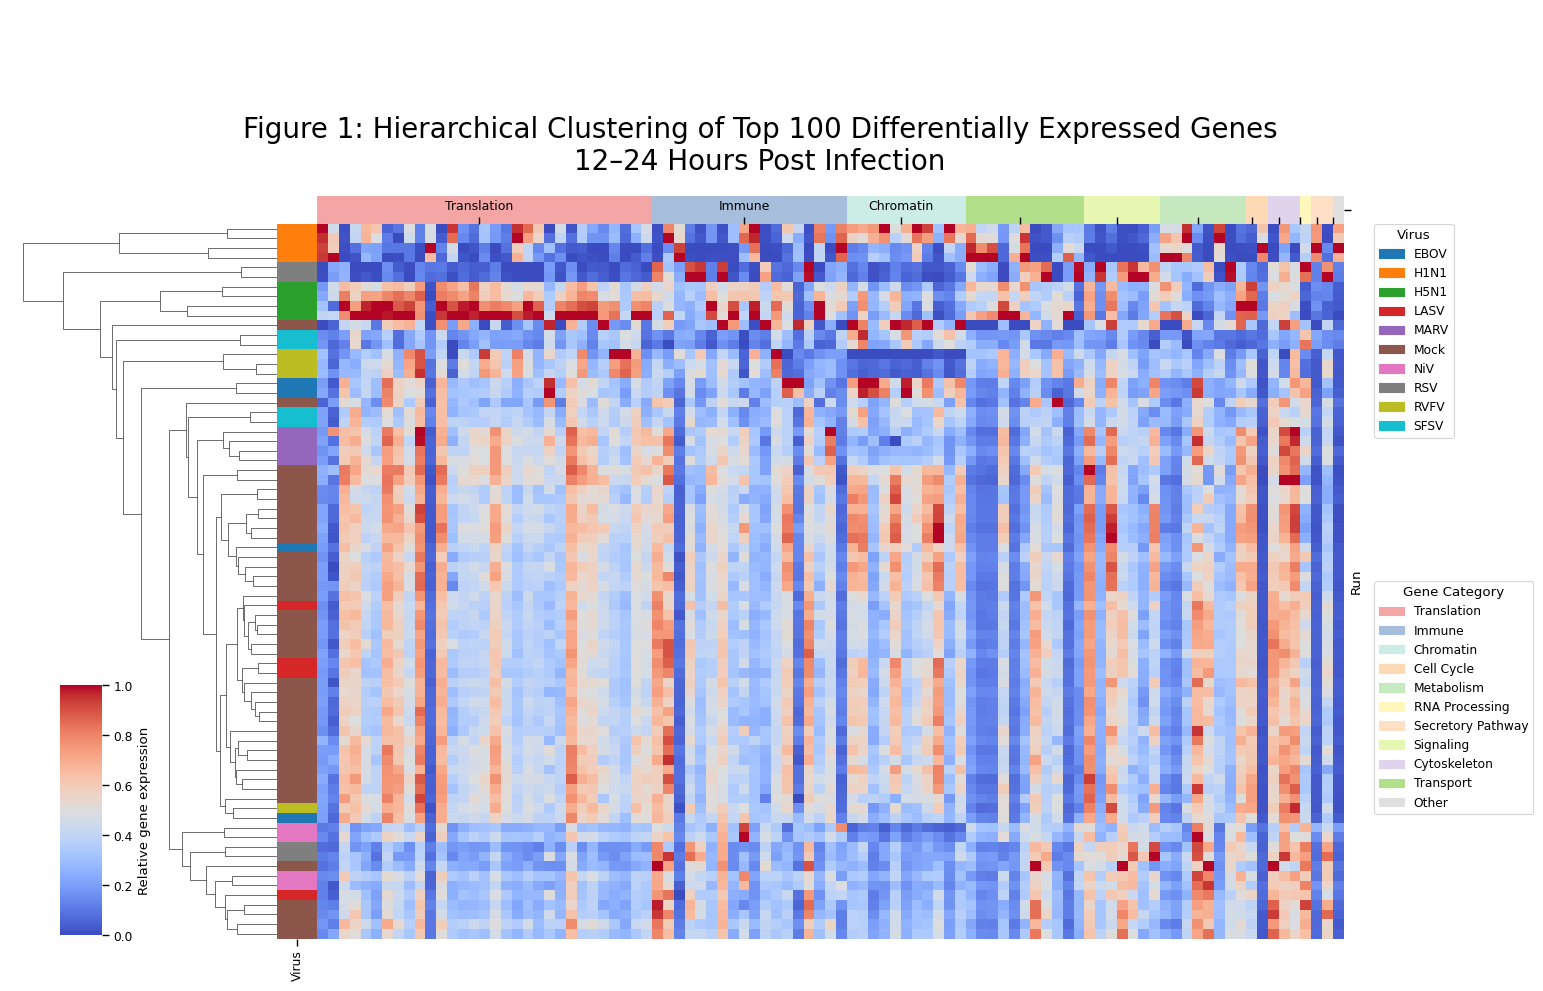

In [90]:
# Figure 11 for Poster
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

sns.set_context("paper")

# Load and filter
df = pd.read_csv("C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/top100_tpm_filtered.csv")

meta_cols = ["Run", "Library Name", "Virus", "HPI"]
gene_cols = [col for col in df.columns if col not in meta_cols]

# Build initial matrix
heatmap_data = df.set_index("Run")[gene_cols]

# Order genes by predefined category order
category_order = ['Translation', 'Immune', 'Chromatin', 'Transport', 'Signaling', 'Metabolism',
                  'Cell Cycle', 'Cytoskeleton', 'RNA Processing', 'Secretory Pathway', 'Other']

ordered_columns = []
for cat in category_order:
    genes_in_cat = [g for g in heatmap_data.columns if gene_to_category.get(g) == cat]
    ordered_columns.extend(genes_in_cat)

heatmap_data = heatmap_data[ordered_columns]

# Manual virus color mapping
virus_lut = {
    "EBOV": "#1f77b4",
    "H1N1": "#ff7f0e",
    "H5N1": "#2ca02c",
    "LASV": "#d62728",
    "MARV": "#9467bd",
    "Mock": "#8c564b",
    "NiV": "#e377c2",
    "RSV": "#7f7f7f",
    "RVFV": "#bcbd22",
    "SFSV": "#17becf"
}

category_lut = {
    "Translation": "#f4a6a6",          # light red
    "Immune": "#a6bddb",              # light blue
    "Chromatin": "#ccece6",           # pale teal
    "Cell Cycle": "#fdd9b5",          # pale orange
    "Metabolism": "#c7e9c0",          # soft green
    "RNA Processing": "#fff7bc",      # very light yellow
    "Secretory Pathway": "#fde0c5",   # peach
    "Signaling": "#e7f6b0",           # yellow-green
    "Cytoskeleton": "#e0d4ec",        # lavender
    "Transport": "#b2df8a",           # light mint green
    "Other": "#e0e0e0"                # soft gray
}



# Row color map (by Virus)
row_colors = df.set_index("Run")["Virus"].map(virus_lut)

# Column color map (by gene category)
col_colors = pd.Series(heatmap_data.columns, index=heatmap_data.columns) \
                .map(gene_to_category) \
                .map(category_lut)

# --- Plot ---
g = sns.clustermap(
    heatmap_data,
    row_colors=row_colors,
    col_colors=col_colors,
    cmap="coolwarm",
    standard_scale=1,
    xticklabels=False,
    yticklabels=False,
    col_cluster=False,
    cbar_kws={"label": "Relative gene expression"},
    cbar_pos=(0.05, 0.06, 0.03, 0.25)  # move colorbar to right side
)

# Resize the figure to make room for legends
g.fig.set_size_inches(14, 10)

# Set xticks at the center of each category block
ax = g.ax_heatmap

category_to_genes = {}
for gene, cat in gene_to_category.items():
    category_to_genes.setdefault(cat, []).append(gene)

ordered_genes = heatmap_data.columns.tolist()
categories = []
positions = []
current_cat = None
start = 0

for i, gene in enumerate(ordered_genes):
    cat = gene_to_category.get(gene, "Other")
    if cat != current_cat:
        if current_cat is not None:
            midpoint = (start + i - 1) / 2
            positions.append(midpoint)
            categories.append(current_cat)
        current_cat = cat
        start = i
midpoint = (start + len(ordered_genes) - 1) / 2
positions.append(midpoint)
categories.append(current_cat)

# Apply xtick labels
ax.set_xticks(positions)
visible_labels = {"Translation", "Immune", "Chromatin"}
display_labels = [cat if cat in visible_labels else "" for cat in categories]

ax.set_xticklabels(display_labels, rotation=0, ha='center', fontsize=9)
ax.xaxis.tick_top()

# --- Add Legends to the Right ---

# Virus legend
virus_patches = [mpatches.Patch(color=color, label=label) for label, color in virus_lut.items()]
legend1 = g.ax_heatmap.legend(
    handles=virus_patches, title="Virus",
    loc='upper left', bbox_to_anchor=(1.03, 1.0), borderaxespad=0., frameon=True
)

# Gene category legend
category_patches = [mpatches.Patch(color=color, label=label) for label, color in category_lut.items()]
legend2 = g.ax_heatmap.legend(
    handles=category_patches, title="Gene Category",
    loc='upper left', bbox_to_anchor=(1.03, 0.5), borderaxespad=0., frameon=True
)

# Ensure virus legend stays on top
g.ax_heatmap.add_artist(legend1)

# Add title
g.fig.suptitle("Figure 1: Hierarchical Clustering of Top 100 Differentially Expressed Genes\n12–24 Hours Post Infection", 
               fontsize=20, y=0.88, x=0.55)

# Save (optional)
plt.savefig("C:/Users/DIR/Jupyter/Multi-strain classification/figures/poster_fig1.png", dpi=300, bbox_inches="tight")

plt.show()


### Figure 12:

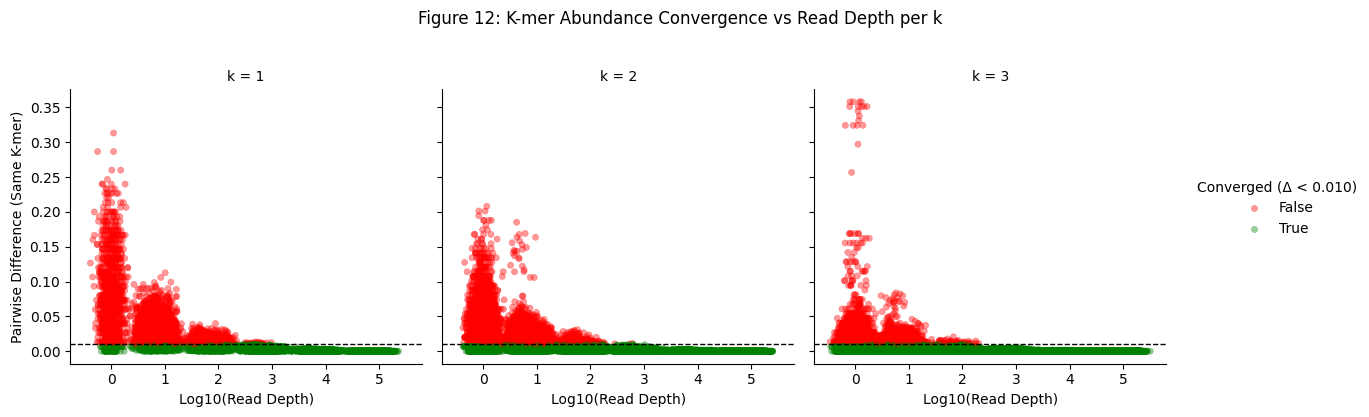

In [22]:
# Figure 12: Pairwise Differences for Each Exact K-mer, Faceted by K-mer Length
import pandas as pd
import numpy as np
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt

# === Load the data ===
data_path = "C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/convergence/convergence_results.csv"
df = pd.read_csv(data_path)

# === Convergence threshold ===
DELTA = 0.01  # 1% abundance difference = convergence

# === Compute pairwise differences per exact k-mer across bootstrap replicates ===
diff_records = []

grouped = df.groupby(["num_reads", "k", "kmer"])["abundance"]

for (depth, k, kmer), abundances in grouped:
    vals = abundances.to_numpy()
    if len(vals) < 2:
        continue
    # Compute all pairwise differences for the same exact kmer (e.g., GTC)
    pairwise_diffs = [abs(vals[i] - vals[j]) for i, j in combinations(range(len(vals)), 2)]
    for diff in pairwise_diffs:
        diff_records.append({
            "num_reads": depth,
            "k": k,
            "kmer": kmer,
            "pairwise_diff": diff,
            "converged": diff < DELTA
        })

# === Build DataFrame and jitter the x-axis ===
diff_df = pd.DataFrame(diff_records)
diff_df["log_reads"] = np.log10(diff_df["num_reads"])

# Add jitter to avoid overplotting
jitter_strength = 0.12
np.random.seed(42)
diff_df["log_reads_jittered"] = diff_df["log_reads"] + np.random.normal(0, jitter_strength, size=len(diff_df))

# === Faceted Plot by k ===
g = sns.FacetGrid(
    diff_df,
    col="k",
    col_wrap=3,
    height=4,
    sharey=True
)

g.map_dataframe(
    sns.scatterplot,
    x="log_reads_jittered",
    y="pairwise_diff",
    hue="converged",
    palette={True: "green", False: "red"},
    alpha=0.4,
    s=20,
    edgecolor=None
)

# Add horizontal δ threshold line to each subplot
for ax in g.axes.flat:
    ax.axhline(DELTA, ls="--", color="black", lw=1)

g.set_axis_labels("Log10(Read Depth)", "Pairwise Difference (Same K-mer)")
g.set_titles("k = {col_name}")
g.add_legend(title="Converged (Δ < {:.3f})".format(DELTA))
g.fig.suptitle("Figure 12: K-mer Abundance Convergence vs Read Depth per k", y=1.03)
g.tight_layout()
g.fig.savefig("C:/Users/DIR/Jupyter/Multi-strain classification/figures/fig12.png", dpi=300, bbox_inches='tight')
plt.show()


### Other/Old

In [ ]:
#Figure 8old: Confusion Matrices of RF trained on kmer data vs shuffled vs permuted
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Parameters
kmer_csv_dir = "C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/kmer_tables"
k_range = range(1, 8)
results = []

def load_data(file_path):
    df = pd.read_csv(file_path)
    df = df[
        (df["Virus"] != "Mock") &
        (df["HPI"] != 3)
    ]
    excluded_cols = ["Accession", "Filter", "Virus", "HPI"]
    feature_cols = [c for c in df.columns if c not in excluded_cols]
    X = df[feature_cols].values
    y = df["Virus"].values
    return X, y, sorted(np.unique(y))

def run_rf_cv(X, y, class_labels, k, condition):
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    agg_cm = np.zeros((len(class_labels), len(class_labels)), dtype=int)
    all_y_true = []
    all_y_pred = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        cm = confusion_matrix(y_test, y_pred, labels=class_labels)
        agg_cm += cm
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)

    overall_acc = accuracy_score(all_y_true, all_y_pred)
    report = classification_report(all_y_true, all_y_pred, output_dict=True, labels=class_labels)
    df_report = pd.DataFrame(report).T.reset_index()
    df_report['k'] = k
    df_report['Condition'] = condition
    df_report['Overall_Accuracy'] = overall_acc

    return df_report, agg_cm, class_labels

# Set up figure
# Set up figure
fig, axs = plt.subplots(3, len(k_range), figsize=(4.5 * len(k_range), 13))
axs = axs.reshape(3, len(k_range))

for col_idx, k in enumerate(k_range):
    full_path = os.path.join(kmer_csv_dir, f"multivirus_{k}mer_results_unfiltered.csv")
    shuffled_path = os.path.join(kmer_csv_dir, f"multivirus_{k}mer_results_unfiltered_shuffled.csv")
    permuted_path = os.path.join(kmer_csv_dir, f"multivirus_{k}mer_results_unfiltered_label_permuted.csv")

    if not all(os.path.exists(p) for p in [full_path, shuffled_path, permuted_path]):
        for row in range(4):
            axs[row, col_idx].axis('off')
        continue

    X_full, y_full, labels = load_data(full_path)
    X_shuffled, y_shuffled, _ = load_data(shuffled_path)
    X_permuted, y_permuted, _ = load_data(permuted_path)

    df_full, cm_full, lbls = run_rf_cv(X_full, y_full, labels, k, "Full")
    df_shuffled, cm_shuffled, _ = run_rf_cv(X_shuffled, y_shuffled, labels, k, "Shuffled")
    df_permuted, cm_permuted, _ = run_rf_cv(X_permuted, y_permuted, labels, k, "Permuted")

    results.extend([df_full, df_shuffled, df_permuted])

    for row_idx, (cm, condition) in enumerate(zip([cm_full, cm_shuffled, cm_permuted], ["Full", "Shuffled", "Permuted"])):
        ax = axs[row_idx, col_idx]
        ax.imshow(cm, cmap='Blues')
        ax.set_title(f"k={k} {condition}")
        ax.set_xticks(np.arange(len(lbls)))
        ax.set_yticks(np.arange(len(lbls)))
        ax.set_xticklabels(lbls, rotation=90)
        ax.set_yticklabels(lbls)

fig.suptitle("Figure 8: Confusion Matrices of RF Classifiers trained on Real vs Sham Data", fontsize=30, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leaves space at the top for the suptitle
fig_path = os.path.join(kmer_csv_dir, "fig8.png")
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
plt.show()

# Save results
final_stats = pd.concat(results, ignore_index=True)
stats_path = os.path.join(kmer_csv_dir, "cm_data_fig8.csv")
final_stats.to_csv(stats_path, index=False)

fig_path, stats_path

In [9]:
# gene_meta_tests.py
import os
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import multipletests

# ------------------ CONFIG ------------------
METADATA = r"C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/multivirus_labels.csv"
EXPR     = r"C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/top100_tpm_filtered.csv"

SAMPLES_IN_ROWS = True          # False if your matrix is genes x samples
AGG_FUNC        = "median"      # "mean" or "median" to collapse per-virus
DROP_MOCK       = True          # drop Virus == "Mock" rows
OUTDIR          = "gene_tests_results"
Q_THRESH_PRINT  = 0.10
# --------------------------------------------

# ---------- Load metadata (only the columns we care about) ----------
meta_raw = pd.read_csv(METADATA)
meta_raw.columns = [c.strip() for c in meta_raw.columns]
meta = meta_raw.rename(columns={
    'Transmission Routes':'Transmiss',
    'Transmission':'Transmiss',
    'transmission':'Transmiss'
})[['Run','Virus','Disease','Transmiss','CFR','R0']].copy()

# normalize strings
for c in ['Run','Virus','Disease','Transmiss']:
    meta[c] = meta[c].astype(str).str.strip()

if DROP_MOCK and 'Mock' in set(meta['Virus']):
    meta = meta[meta['Virus'].str.lower() != 'mock']

# ---------- Load expression ----------
expr = pd.read_csv(EXPR, index_col=0)
if not SAMPLES_IN_ROWS:
    expr = expr.T
expr.index = expr.index.astype(str).str.strip()

# ---------- Intersect samples ----------
common_runs = sorted(set(meta['Run']).intersection(expr.index))
if len(common_runs) < 5:
    raise ValueError(f"Only {len(common_runs)} overlapping runs. Check sample IDs/orientation.")
meta = meta.loc[meta['Run'].isin(common_runs)].copy()
expr = expr.loc[common_runs].copy()

# ---------- Clean genes ----------
# keep only numeric columns (ignore "Library name" etc.)
expr = expr.select_dtypes(include=[np.number])

# drop genes that are all NaN
expr = expr.loc[:, expr.notna().any(axis=0)]

# drop zero-variance genes
var = expr.var(axis=0, ddof=1)
expr = expr.loc[:, var > 0]

# ---------- Collapse to virus level ----------
AGG_FUNC = AGG_FUNC.lower()
if AGG_FUNC not in {"mean", "median"}:
    raise ValueError("AGG_FUNC must be 'mean' or 'median'")

expr_virus = expr.join(meta.set_index('Run'), how='inner')
grouped = expr_virus.groupby('Virus', sort=True)

# virus-level matrix (one row per virus; columns = genes)
Xv = grouped[expr.columns].agg(AGG_FUNC)  # string aggregator -> no FutureWarning

# virus-level labels
Lv = grouped[['Disease','Transmiss','CFR','R0']].first()

print(f"Viruses in analysis: {len(Xv)} -> {list(Xv.index)}")
print(f"Genes retained after filtering: {Xv.shape[1]}")

# ---------- Helpers ----------
def fdr(pvals):
    return multipletests(pvals, method='fdr_bh')[1] if len(pvals) else np.array([])

def kw_screen(X, labels):
    """Kruskal–Wallis across classes for each gene (robust to identical values)."""
    labels = pd.Series(labels, index=X.index, dtype='category')
    classes = labels.cat.categories
    out = []
    for g in X.columns:
        groups = [X.loc[labels == c, g].values for c in classes]
        valid = [v for v in groups if len(v) >= 2]
        vals = np.concatenate([v for v in groups if len(v) > 0]) if any(len(v)>0 for v in groups) else np.array([])
        if (len(valid) < 2) or (vals.size == 0) or (np.unique(vals[~np.isnan(vals)]).size < 2):
            stat, p = np.nan, 1.0
        else:
            try:
                stat, p = stats.kruskal(*groups, nan_policy='omit')
            except ValueError:
                stat, p = np.nan, 1.0
        N = sum(len(v) for v in groups)
        eff = stat/(N-1) if (N > 1 and not np.isnan(stat)) else np.nan
        out.append((g, stat, p, eff))
    res = pd.DataFrame(out, columns=['gene','kw_stat','p','kw_eta_proxy'])
    res['q'] = fdr(res['p'].fillna(1.0).values)
    return res.sort_values(['q','kw_stat'], ascending=[True, False])

def spearman_screen(X, y):
    y = pd.Series(y, index=X.index).astype(float)
    out = []
    for g in X.columns:
        rho, p = stats.spearmanr(X[g], y, nan_policy='omit')
        out.append((g, rho, p))
    res = pd.DataFrame(out, columns=['gene','rho','p'])
    res['q'] = fdr(res['p'].values)
    return res.sort_values(['q','rho'], ascending=[True, False])

# ---------- Run screens ----------
disease_res = kw_screen(Xv, Lv['Disease'])
tx_res      = kw_screen(Xv, Lv['Transmiss'])

cfr_mask = Lv['CFR'].notna()
r0_mask  = Lv['R0'].notna()
cfr_res  = spearman_screen(Xv.loc[cfr_mask], Lv.loc[cfr_mask, 'CFR'])
r0_res   = spearman_screen(Xv.loc[r0_mask],  Lv.loc[r0_mask,  'R0'])

# ---------- Save ----------
os.makedirs(OUTDIR, exist_ok=True)
disease_res.to_csv(os.path.join(OUTDIR, "genes_vs_Disease_kruskal_fdr.csv"), index=False)
tx_res.to_csv(os.path.join(OUTDIR, "genes_vs_Transmission_kruskal_fdr.csv"), index=False)
cfr_res.to_csv(os.path.join(OUTDIR, "genes_vs_CFR_spearman_fdr.csv"), index=False)
r0_res.to_csv(os.path.join(OUTDIR, "genes_vs_R0_spearman_fdr.csv"), index=False)

# ---------- Quick console peek ----------
for name, df in [("Disease", disease_res), ("Transmission", tx_res),
                 ("CFR", cfr_res), ("R0", r0_res)]:
    sig = df[df['q'] <= Q_THRESH_PRINT].head(20)
    print(f"\nTop hits for {name} (q<={Q_THRESH_PRINT}):")
    print("  none" if sig.empty else sig.to_string(index=False))


Viruses in analysis: 9 -> ['EBOV', 'H1N1', 'H5N1', 'LASV', 'MARV', 'NiV', 'RSV', 'RVFV', 'SFSV']
Genes retained after filtering: 101


C:\Users\DIR\AppData\Local\Temp\ipykernel_14872\770132333.py:107: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, p = stats.spearmanr(X[g], y, nan_policy='omit')
C:\Users\DIR\AppData\Local\Temp\ipykernel_14872\770132333.py:107: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, p = stats.spearmanr(X[g], y, nan_policy='omit')



Top hits for Disease (q<=0.1):
  none

Top hits for Transmission (q<=0.1):
  none

Top hits for CFR (q<=0.1):
  none

Top hits for R0 (q<=0.1):
  none


Merged shape: (109, 38389)  ->  saved to C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/gene_tpm_merged.csv
Long table for plotting: 4,183,600 points across 38382 genes


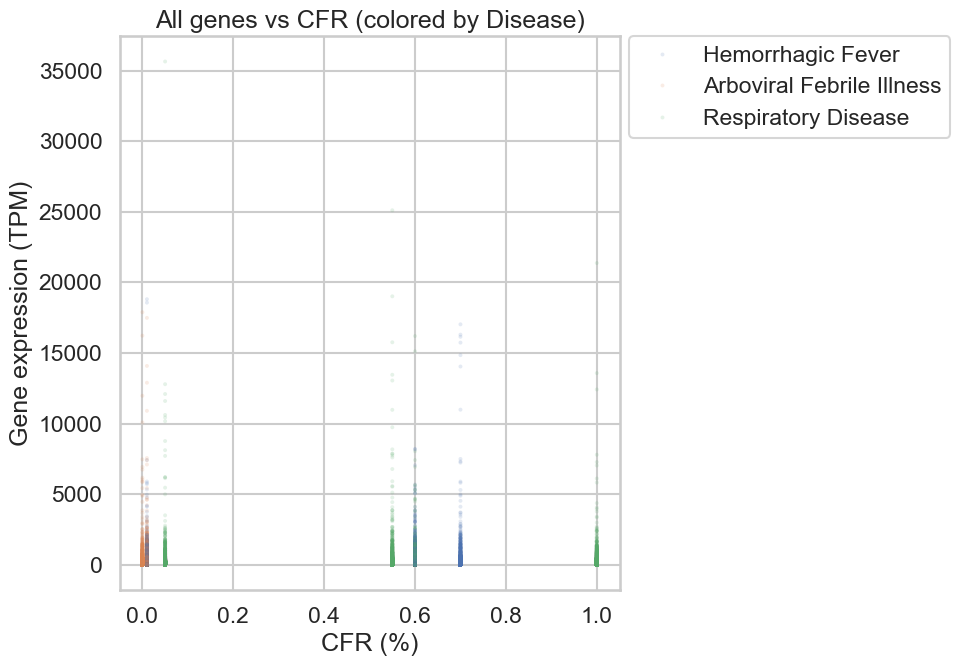

C:\Users\DIR\AppData\Local\Temp\ipykernel_14872\2553013078.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = long_df.groupby(bins)['Expression'].agg(['median','count'])


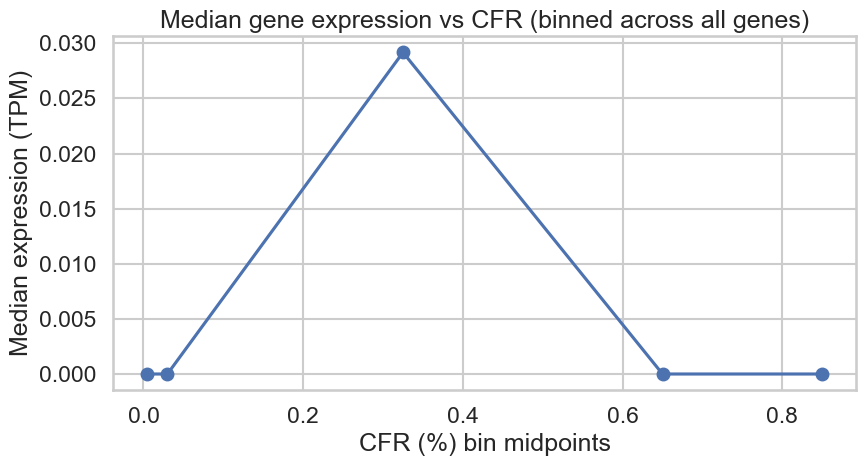

C:\Users\DIR\AppData\Local\Temp\ipykernel_14872\2553013078.py:101: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Disease','CFR_bin'])['Expression']


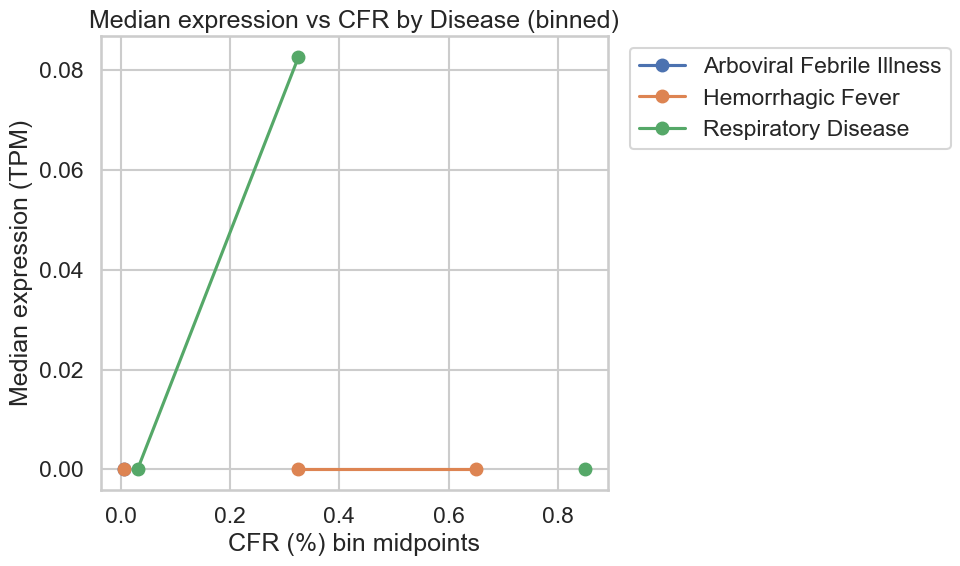

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- Paths ----------------
EXPR_FILE = r"C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/gene_tpm_w_metadata.csv"
LABELS_FILE = r"C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/multivirus_labels.csv"
MERGED_OUT = r"C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/gene_tpm_merged.csv"

# ---------- Load ----------
expr = pd.read_csv(EXPR_FILE)
labels = pd.read_csv(LABELS_FILE)

# Normalize keys / trim whitespace
for df in (expr, labels):
    df.columns = [c.strip() for c in df.columns]
    if 'Run' in df.columns:
        df['Run'] = df['Run'].astype(str).str.strip()

# Keep only the columns we actually need from labels.
# Keep Ben's original "Transmission Routes" name.
label_keep = ['Run', 'Virus', 'Disease', 'Transmission Routes', 'CFR', 'R0']
label_keep = [c for c in label_keep if c in labels.columns]
labels = labels[label_keep].drop_duplicates(subset='Run')

# Merge on Run (inner = only rows present in both files)
merged = pd.merge(expr, labels, on='Run', how='inner', suffixes=('', '_lab'))

# If expr already had Virus/Disease, prefer the label file’s versions to avoid inconsistencies
for col in ['Virus', 'Disease', 'Transmission Routes', 'CFR', 'R0']:
    if f"{col}_lab" in merged.columns:
        merged[col] = merged[f"{col}_lab"]
        merged.drop(columns=[f"{col}_lab"], inplace=True)

# Save merged file
merged.to_csv(MERGED_OUT, index=False)
print(f"Merged shape: {merged.shape}  ->  saved to {MERGED_OUT}")

# ------------- Plot: ALL genes vs CFR ----------------
# Ensure numeric CFR
if 'CFR' not in merged.columns:
    raise ValueError("CFR column not found after merging. Check label file columns.")
merged['CFR'] = pd.to_numeric(merged['CFR'], errors='coerce')

# Identify gene columns:
#   take numeric columns and drop known metadata (some may also be numeric like CFR/R0).
meta_cols_known = {'Run','Virus','Disease','Transmission Routes','CFR','R0'}
numeric_cols = merged.select_dtypes(include=[np.number]).columns
gene_cols = [c for c in numeric_cols if c not in meta_cols_known]

if len(gene_cols) == 0:
    raise ValueError("No numeric gene columns found. Check that TPMs are numeric in gene_tpm_with_metadata.csv")

# Melt to long form: each point = (Run, Gene) with one expression value
id_vars = [c for c in ['Run','CFR','Disease','Virus','Transmission Routes'] if c in merged.columns]
long_df = merged.melt(
    id_vars=id_vars,
    value_vars=gene_cols,
    var_name='Gene',
    value_name='Expression'
).dropna(subset=['CFR','Expression'])

print(f"Long table for plotting: {long_df.shape[0]:,} points across {long_df['Gene'].nunique()} genes")

# Plot: all genes vs CFR (color by Disease if present)
sns.set(context="talk", style="whitegrid")
plt.figure(figsize=(10,7))
hue = 'Disease' if 'Disease' in long_df.columns else None
sns.scatterplot(
    data=long_df.sample(min(len(long_df), 500000), random_state=42) if len(long_df) > 500000 else long_df,  # light downsample if huge
    x='CFR', y='Expression',
    hue=hue, alpha=0.15, s=8, linewidth=0
)
plt.title("All genes vs CFR" + ("" if hue is None else " (colored by Disease)"))
plt.xlabel("CFR (%)")
plt.ylabel("Gene expression (TPM)")
if hue is not None:
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

# Add a nonparametric trend: median expression in CFR bins (reveals non-linear patterns)
bins = pd.qcut(long_df['CFR'], q=min(12, long_df['CFR'].nunique()), duplicates='drop')
summary = long_df.groupby(bins)['Expression'].agg(['median','count'])
summary['CFR_mid'] = [interval.mid for interval in summary.index]

plt.figure(figsize=(9,5))
plt.plot(summary['CFR_mid'], summary['median'], marker='o')
plt.title("Median gene expression vs CFR (binned across all genes)")
plt.xlabel("CFR (%) bin midpoints")
plt.ylabel("Median expression (TPM)")
plt.tight_layout()
plt.show()

# Optional: per-Disease medians (helps see different curves by syndrome)
if 'Disease' in long_df.columns:
    bins = pd.qcut(long_df['CFR'], q=min(8, long_df['CFR'].nunique()), duplicates='drop')
    summary_d = (long_df
                 .assign(CFR_bin=bins)
                 .groupby(['Disease','CFR_bin'])['Expression']
                 .median()
                 .reset_index())
    # compute bin midpoints for x
    summary_d['CFR_mid'] = summary_d['CFR_bin'].apply(lambda iv: iv.mid)

    plt.figure(figsize=(10,6))
    for dis, sub in summary_d.groupby('Disease'):
        plt.plot(sub['CFR_mid'], sub['Expression'], marker='o', label=dis)
    plt.title("Median expression vs CFR by Disease (binned)")
    plt.xlabel("CFR (%) bin midpoints")
    plt.ylabel("Median expression (TPM)")
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


C:\Users\DIR\AppData\Local\Temp\ipykernel_14872\3925404923.py:21: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, p = spearmanr(df[g], df['CFR'], nan_policy='omit')


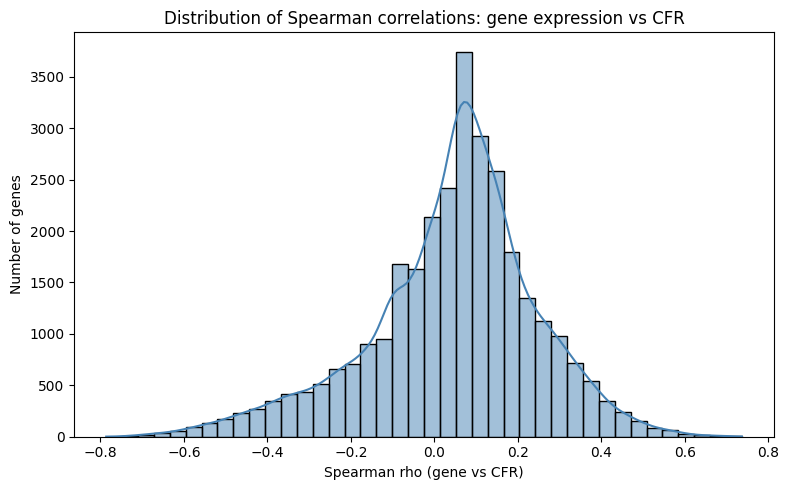

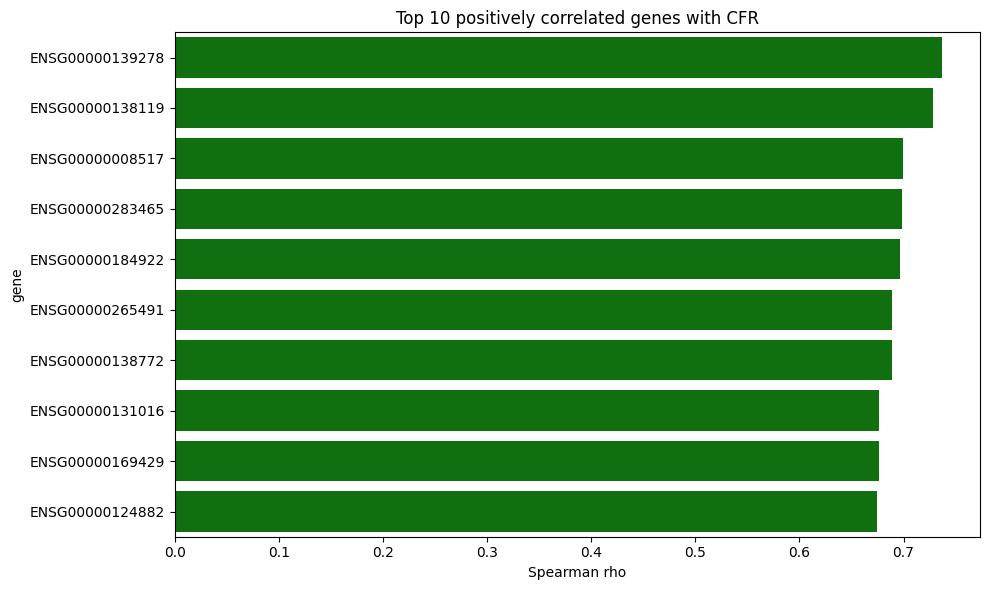

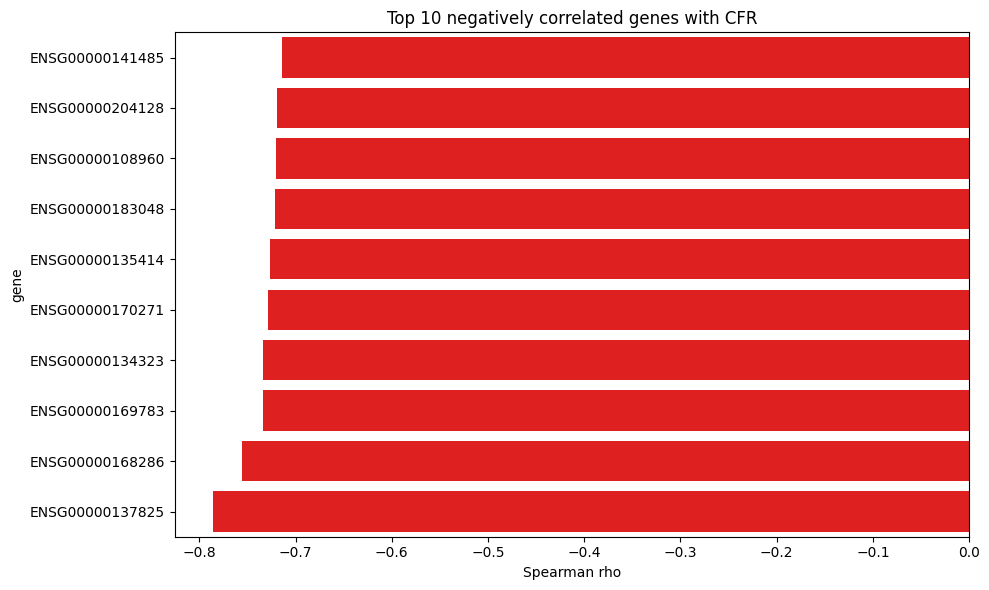

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# --- Load merged file ---
MERGED = r"C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/gene_tpm_merged.csv"
df = pd.read_csv(MERGED)

# Ensure CFR is numeric
df['CFR'] = pd.to_numeric(df['CFR'], errors='coerce')

# Identify gene columns = all columns that are not metadata
meta_cols = ['Run','Virus','Disease','Transmiss','CFR','R0']
gene_cols = [c for c in df.columns if c not in meta_cols]

# --- Compute Spearman correlations (gene expression vs CFR) ---
results = []
for g in gene_cols:
    rho, p = spearmanr(df[g], df['CFR'], nan_policy='omit')
    results.append((g, rho, p))

res_df = pd.DataFrame(results, columns=['gene','spearman_rho','pval'])
res_df = res_df.dropna().sort_values('spearman_rho', ascending=False)

# --- Plot correlation distribution ---
plt.figure(figsize=(8,5))
sns.histplot(res_df['spearman_rho'], bins=40, kde=True, color='steelblue')
plt.title("Distribution of Spearman correlations: gene expression vs CFR")
plt.xlabel("Spearman rho (gene vs CFR)")
plt.ylabel("Number of genes")
plt.tight_layout()
plt.show()

# --- Highlight top 10 positive & negative ---
top_pos = res_df.head(10)
top_neg = res_df.tail(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_pos, x='spearman_rho', y='gene', color='green')
plt.title("Top 10 positively correlated genes with CFR")
plt.xlabel("Spearman rho")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=top_neg, x='spearman_rho', y='gene', color='red')
plt.title("Top 10 negatively correlated genes with CFR")
plt.xlabel("Spearman rho")
plt.tight_layout()
plt.show()


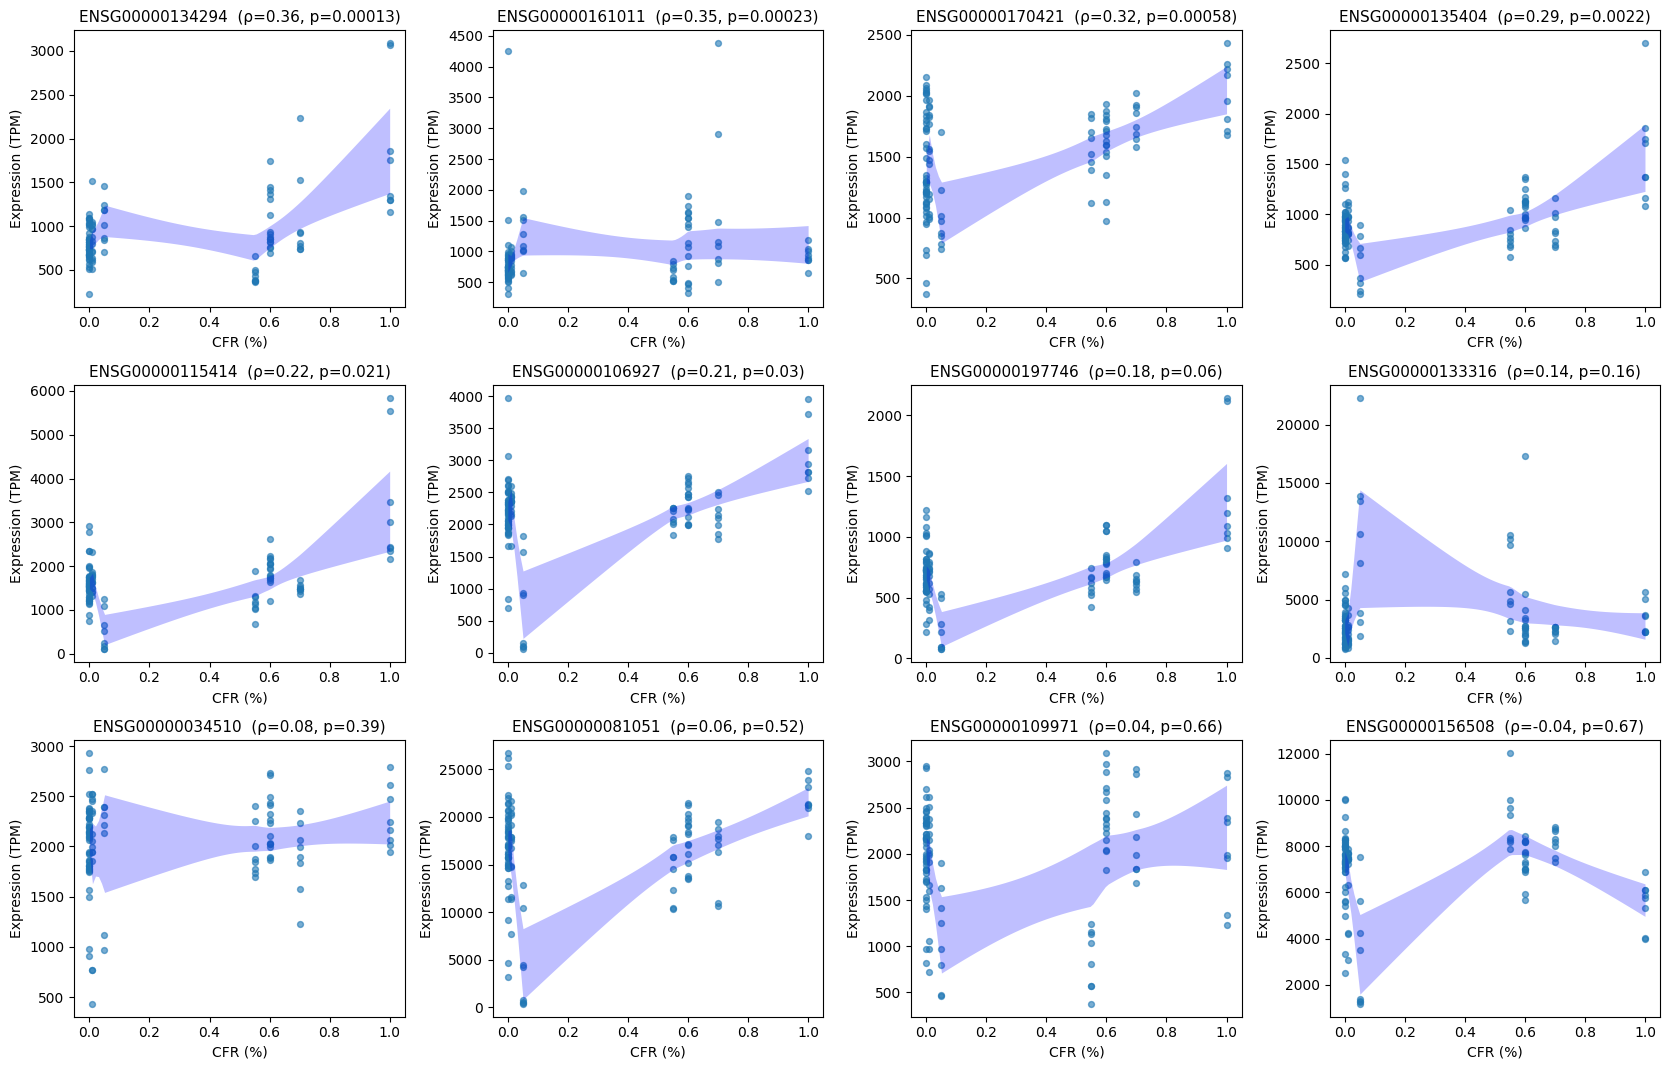

In [3]:
import os, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# ------------------ PATHS ------------------
EXPR_FILE   = r"C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/gene_tpm_with_metadata.csv"
LABELS_FILE = r"C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/multivirus_labels.csv"
MERGED_OUT  = r"C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/gene_tpm_merged.csv"
CFR_RESULTS = r"gene_tests_results/genes_vs_CFR_spearman_fdr.csv"  # optional

# ------------------ MERGE (if needed) ------------------
if not os.path.exists(MERGED_OUT):
    expr = pd.read_csv(EXPR_FILE)
    labels = pd.read_csv(LABELS_FILE)
    for df in (expr, labels):
        df.columns = [c.strip() for c in df.columns]
        if 'Run' in df.columns:
            df['Run'] = df['Run'].astype(str).str.strip()
    keep = [c for c in ['Run','Virus','Disease','Transmission Routes','CFR','R0'] if c in labels.columns]
    labels = labels[keep].drop_duplicates('Run')
    merged = pd.merge(expr, labels, on='Run', how='inner', suffixes=('', '_lab'))
    for col in ['Virus','Disease','Transmission Routes','CFR','R0']:
        if f"{col}_lab" in merged.columns:
            merged[col] = merged[f"{col}_lab"]
            merged.drop(columns=[f"{col}_lab"], inplace=True)
    merged.to_csv(MERGED_OUT, index=False)
else:
    merged = pd.read_csv(MERGED_OUT)

# ------------------ PREP ------------------
merged.columns = [c.strip() for c in merged.columns]
merged['CFR'] = pd.to_numeric(merged['CFR'], errors='coerce')

meta_cols = {'Run','Virus','Disease','Transmission Routes','CFR','R0'}
numeric_cols = merged.select_dtypes(include=[np.number]).columns.tolist()
gene_cols = [c for c in numeric_cols if c not in meta_cols]

# ------------------ PICK GENES ------------------
GENES = []   # put your own list here to override
TOP_N = 12

if not GENES:
    try:
        res = pd.read_csv(CFR_RESULTS)
        rho_col = 'rho' if 'rho' in res.columns else ('spearman_rho' if 'spearman_rho' in res.columns else None)
        if rho_col is None or 'p' not in res.columns:
            raise ValueError("Results file missing rho and/or p.")
        res_pos = res[res[rho_col] > 0].copy()
        res_pos = res_pos.sort_values(['p', rho_col], ascending=[True, False])
        GENES = res_pos['gene'].head(TOP_N).tolist()
    except Exception:
        tmp = []
        for g in gene_cols:
            rho, p = spearmanr(merged[g], merged['CFR'], nan_policy='omit')
            if np.isfinite(rho) and np.isfinite(p) and rho > 0:
                tmp.append((g, rho, p))
        tmp = pd.DataFrame(tmp, columns=['gene','rho','p'])
        GENES = tmp.sort_values(['p','rho'], ascending=[True, False]).head(TOP_N)['gene'].tolist()

if not GENES:
    raise ValueError("No positively correlated genes found to plot.")

# ------------------ LONG DF ------------------
keep_cols = [c for c in ['Run','CFR'] if c in merged.columns]
long_sel = merged[keep_cols + GENES].melt(
    id_vars=keep_cols, value_vars=GENES,
    var_name='Gene', value_name='Expression'
).dropna(subset=['CFR','Expression'])

# ------------------ ORDER BY P-VALUE (recompute on plotting subset) ------------------
stats_list = []
for g in GENES:
    sub = long_sel[long_sel['Gene'] == g]
    rho, p = spearmanr(sub['Expression'], sub['CFR'], nan_policy='omit')
    if not np.isfinite(p) or p < 0:  # p must be in [0,1]
        p = 1.0
    stats_list.append((g, rho, p, len(sub)))
stats_df = pd.DataFrame(stats_list, columns=['gene','rho','p','n']).sort_values(['p','rho'], ascending=[True, False])
GENES = stats_df['gene'].tolist()
rho_map = dict(zip(stats_df['gene'], stats_df['rho']))
p_map   = dict(zip(stats_df['gene'], stats_df['p']))

# ------------------ LOWESS "CLOUD" (bootstrap 95% band) ------------------
def add_lowess_cloud(ax, x, y, frac=0.6, it=0, n_boot=200, grid=None, seed=42):
    """
    Draw mean LOWESS curve with 95% band via bootstrap over (x,y).
    Fallback: binned-median 95% CI if statsmodels isn't available.
    """
    x = np.asarray(x); y = np.asarray(y)
    ok = np.isfinite(x) & np.isfinite(y)
    x = x[ok]; y = y[ok]
    if x.size < 5:
        return

    if grid is None:
        grid = np.linspace(np.min(x), np.max(x), 100)

    try:
        from statsmodels.nonparametric.smoothers_lowess import lowess
        rng = np.random.default_rng(seed)
        n = x.size
        fits = np.empty((n_boot, grid.size), dtype=float)
        for b in range(n_boot):
            idx = rng.integers(0, n, n)  # bootstrap sample indices
            xb = x[idx]; yb = y[idx]
            lo = lowess(yb, xb, frac=frac, it=it, return_sorted=True)
            # interpolate smoother to common grid
            fits[b] = np.interp(grid, lo[:,0], lo[:,1], left=np.nan, right=np.nan)
        mu = np.nanmean(fits, axis=0)
        sd = np.nanstd(fits, axis=0, ddof=1)
        lo95 = mu - 1.96*sd
        hi95 = mu + 1.96*sd
        ax.fill_between(grid, lo95, hi95, alpha=0.25, linewidth=0, color="blue")
    except Exception:
        # Fallback: binned medians with bootstrap CI
        s = pd.DataFrame({'x': x, 'y': y}).dropna()
        if s.empty: return
        q = min(10, s['x'].nunique())
        if q < 3: return
        bins = pd.qcut(s['x'], q=q, duplicates='drop')
        centers = np.array([iv.mid for iv in bins.cat.categories])
        m = []
        lo = []
        hi = []
        rng = np.random.default_rng(seed)
        for iv in bins.cat.categories:
            yi = s.loc[bins == iv, 'y'].to_numpy()
            if yi.size < 3:
                m.append(np.nan); lo.append(np.nan); hi.append(np.nan)
                continue
            boot = np.median(rng.choice(yi, size=(500, yi.size), replace=True), axis=1)
            m.append(np.median(yi))
            lo.append(np.percentile(boot, 2.5))
            hi.append(np.percentile(boot, 97.5))
        centers = centers[np.isfinite(m)]
        m = np.array(m, dtype=float); lo = np.array(lo, dtype=float); hi = np.array(hi, dtype=float)
        mask = np.isfinite(m) & np.isfinite(lo) & np.isfinite(hi)
        if mask.sum() >= 2:
            ax.fill_between(centers[mask], lo[mask], hi[mask], alpha=0.25, linewidth=0)

# ------------------ PLOTS ------------------
plt.style.use('default')
n = len(GENES)
cols = 4
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(4.2*cols, 3.6*rows), squeeze=False)

for i, g in enumerate(GENES):
    r = i // cols; c = i % cols
    ax = axes[r][c]
    sub = long_sel[long_sel['Gene'] == g]

    # Plain scatter (single color), no Disease coloring
    ax.scatter(sub['CFR'], sub['Expression'], s=18, alpha=0.6)

    # LOWESS cloud (95% band)
    add_lowess_cloud(ax, sub['CFR'].to_numpy(), sub['Expression'].to_numpy(), frac=0.6, it=0, n_boot=200)

    ax.set_title(f"{g}  (ρ={rho_map[g]:.2f}, p={p_map[g]:.2g})", fontsize=11)
    ax.set_xlabel("CFR (%)")
    ax.set_ylabel("Expression (TPM)")

# hide empty panels
for j in range(i+1, rows*cols):
    rr = j // cols; cc = j % cols
    axes[rr][cc].axis('off')

plt.tight_layout()
plt.savefig("cfr_gene.png", dpi=300)
plt.show()


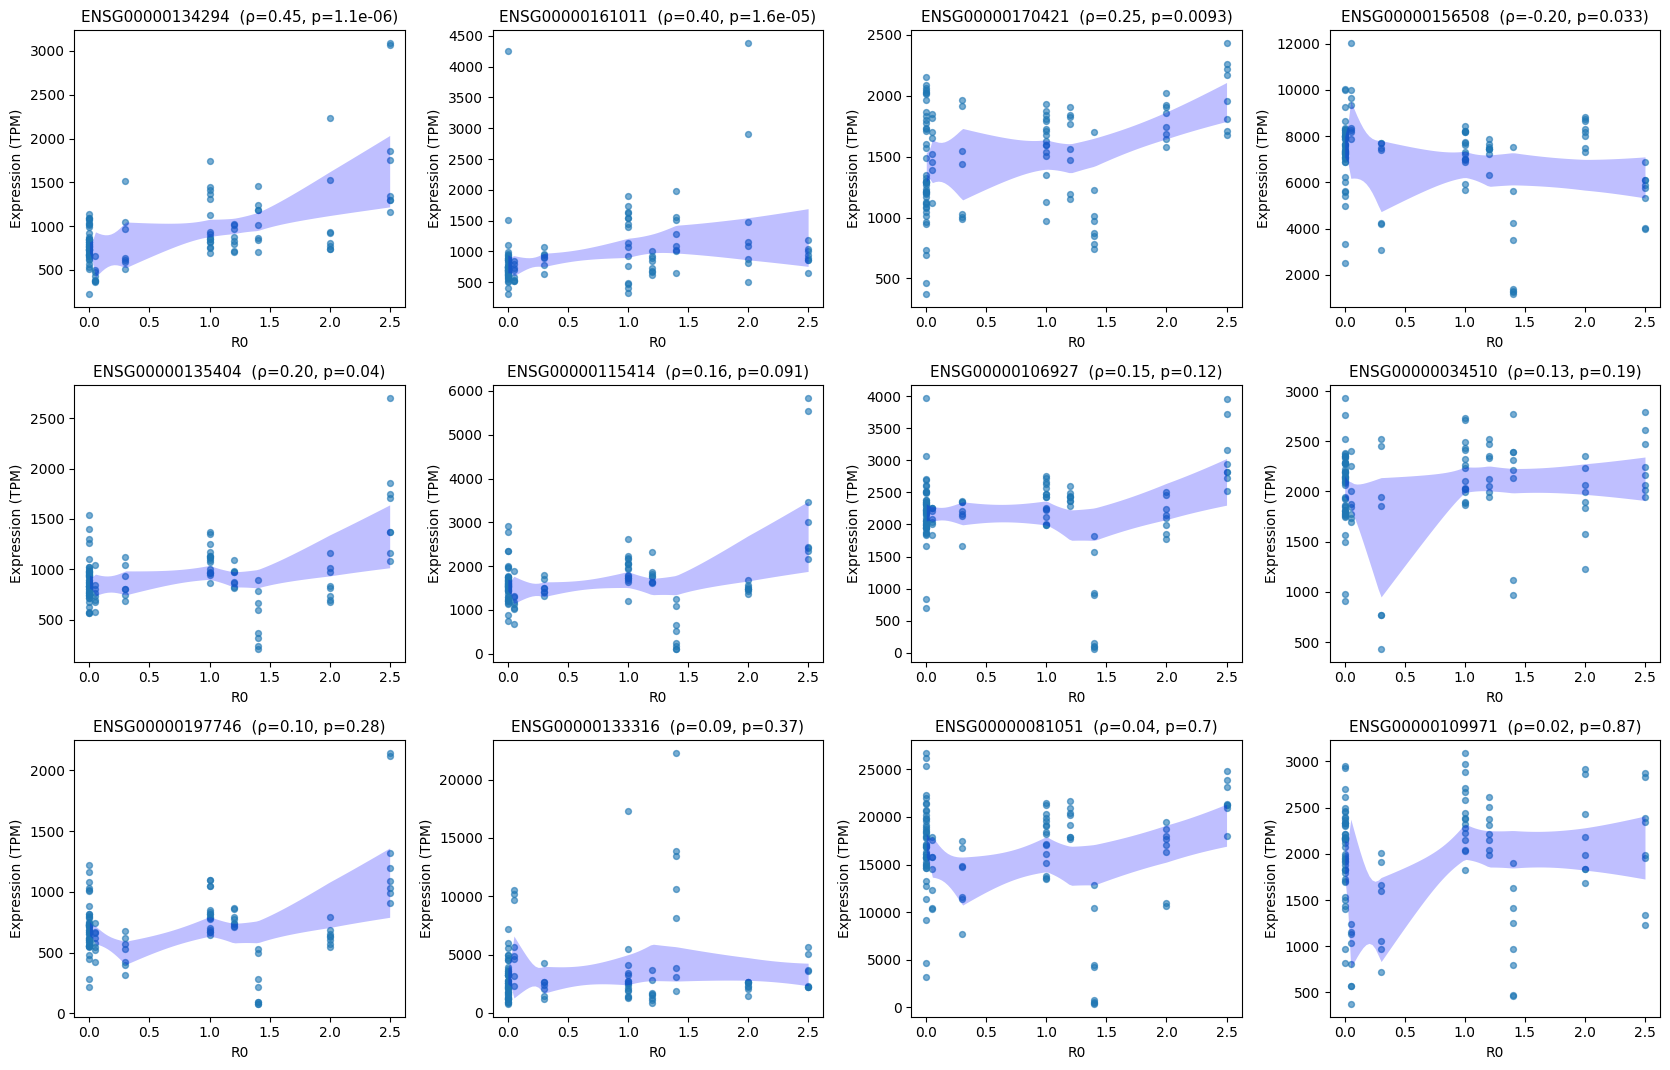

In [4]:
import os, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# ------------------ PATHS ------------------
EXPR_FILE   = r"C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/gene_tpm_with_metadata.csv"
LABELS_FILE = r"C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/multivirus_labels.csv"
MERGED_OUT  = r"C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/gene_tpm_merged.csv"
CFR_RESULTS = r"gene_tests_results/genes_vs_CFR_spearman_fdr.csv"  # optional

# ------------------ MERGE (if needed) ------------------
if not os.path.exists(MERGED_OUT):
    expr = pd.read_csv(EXPR_FILE)
    labels = pd.read_csv(LABELS_FILE)
    for df in (expr, labels):
        df.columns = [c.strip() for c in df.columns]
        if 'Run' in df.columns:
            df['Run'] = df['Run'].astype(str).str.strip()
    keep = [c for c in ['Run','Virus','Disease','Transmission Routes','CFR','R0'] if c in labels.columns]
    labels = labels[keep].drop_duplicates('Run')
    merged = pd.merge(expr, labels, on='Run', how='inner', suffixes=('', '_lab'))
    for col in ['Virus','Disease','Transmission Routes','CFR','R0']:
        if f"{col}_lab" in merged.columns:
            merged[col] = merged[f"{col}_lab"]
            merged.drop(columns=[f"{col}_lab"], inplace=True)
    merged.to_csv(MERGED_OUT, index=False)
else:
    merged = pd.read_csv(MERGED_OUT)

# ------------------ PREP ------------------
merged.columns = [c.strip() for c in merged.columns]
merged['CFR'] = pd.to_numeric(merged['CFR'], errors='coerce')

meta_cols = {'Run','Virus','Disease','Transmission Routes','CFR','R0'}
numeric_cols = merged.select_dtypes(include=[np.number]).columns.tolist()
gene_cols = [c for c in numeric_cols if c not in meta_cols]

# ------------------ PICK GENES ------------------
GENES = []   # put your own list here to override
TOP_N = 12

if not GENES:
    try:
        res = pd.read_csv(CFR_RESULTS)
        rho_col = 'rho' if 'rho' in res.columns else ('spearman_rho' if 'spearman_rho' in res.columns else None)
        if rho_col is None or 'p' not in res.columns:
            raise ValueError("Results file missing rho and/or p.")
        res_pos = res[res[rho_col] > 0].copy()
        res_pos = res_pos.sort_values(['p', rho_col], ascending=[True, False])
        GENES = res_pos['gene'].head(TOP_N).tolist()
    except Exception:
        tmp = []
        for g in gene_cols:
            rho, p = spearmanr(merged[g], merged['CFR'], nan_policy='omit')
            if np.isfinite(rho) and np.isfinite(p) and rho > 0:
                tmp.append((g, rho, p))
        tmp = pd.DataFrame(tmp, columns=['gene','rho','p'])
        GENES = tmp.sort_values(['p','rho'], ascending=[True, False]).head(TOP_N)['gene'].tolist()

if not GENES:
    raise ValueError("No positively correlated genes found to plot.")

# ------------------ LONG DF ------------------
keep_cols = [c for c in ['Run','R0'] if c in merged.columns]
long_sel = merged[keep_cols + GENES].melt(
    id_vars=keep_cols, value_vars=GENES,
    var_name='Gene', value_name='Expression'
).dropna(subset=['R0','Expression'])

# ------------------ ORDER BY P-VALUE (recompute on plotting subset) ------------------
stats_list = []
for g in GENES:
    sub = long_sel[long_sel['Gene'] == g]
    rho, p = spearmanr(sub['Expression'], sub['R0'], nan_policy='omit')
    if not np.isfinite(p) or p < 0:  # p must be in [0,1]
        p = 1.0
    stats_list.append((g, rho, p, len(sub)))
stats_df = pd.DataFrame(stats_list, columns=['gene','rho','p','n']).sort_values(['p','rho'], ascending=[True, False])
GENES = stats_df['gene'].tolist()
rho_map = dict(zip(stats_df['gene'], stats_df['rho']))
p_map   = dict(zip(stats_df['gene'], stats_df['p']))

# ------------------ LOWESS "CLOUD" (bootstrap 95% band) ------------------
def add_lowess_cloud(ax, x, y, frac=0.6, it=0, n_boot=200, grid=None, seed=42):
    """
    Draw mean LOWESS curve with 95% band via bootstrap over (x,y).
    Fallback: binned-median 95% CI if statsmodels isn't available.
    """
    x = np.asarray(x); y = np.asarray(y)
    ok = np.isfinite(x) & np.isfinite(y)
    x = x[ok]; y = y[ok]
    if x.size < 5:
        return

    if grid is None:
        grid = np.linspace(np.min(x), np.max(x), 100)

    try:
        from statsmodels.nonparametric.smoothers_lowess import lowess
        rng = np.random.default_rng(seed)
        n = x.size
        fits = np.empty((n_boot, grid.size), dtype=float)
        for b in range(n_boot):
            idx = rng.integers(0, n, n)  # bootstrap sample indices
            xb = x[idx]; yb = y[idx]
            lo = lowess(yb, xb, frac=frac, it=it, return_sorted=True)
            # interpolate smoother to common grid
            fits[b] = np.interp(grid, lo[:,0], lo[:,1], left=np.nan, right=np.nan)
        mu = np.nanmean(fits, axis=0)
        sd = np.nanstd(fits, axis=0, ddof=1)
        lo95 = mu - 1.96*sd
        hi95 = mu + 1.96*sd
        ax.fill_between(grid, lo95, hi95, alpha=0.25, linewidth=0, color="blue")
    except Exception:
        # Fallback: binned medians with bootstrap CI
        s = pd.DataFrame({'x': x, 'y': y}).dropna()
        if s.empty: return
        q = min(10, s['x'].nunique())
        if q < 3: return
        bins = pd.qcut(s['x'], q=q, duplicates='drop')
        centers = np.array([iv.mid for iv in bins.cat.categories])
        m = []
        lo = []
        hi = []
        rng = np.random.default_rng(seed)
        for iv in bins.cat.categories:
            yi = s.loc[bins == iv, 'y'].to_numpy()
            if yi.size < 3:
                m.append(np.nan); lo.append(np.nan); hi.append(np.nan)
                continue
            boot = np.median(rng.choice(yi, size=(500, yi.size), replace=True), axis=1)
            m.append(np.median(yi))
            lo.append(np.percentile(boot, 2.5))
            hi.append(np.percentile(boot, 97.5))
        centers = centers[np.isfinite(m)]
        m = np.array(m, dtype=float); lo = np.array(lo, dtype=float); hi = np.array(hi, dtype=float)
        mask = np.isfinite(m) & np.isfinite(lo) & np.isfinite(hi)
        if mask.sum() >= 2:
            ax.fill_between(centers[mask], lo[mask], hi[mask], alpha=0.25, linewidth=0)

# ------------------ PLOTS ------------------
plt.style.use('default')
n = len(GENES)
cols = 4
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(4.2*cols, 3.6*rows), squeeze=False)

for i, g in enumerate(GENES):
    r = i // cols; c = i % cols
    ax = axes[r][c]
    sub = long_sel[long_sel['Gene'] == g]

    # Plain scatter (single color), no Disease coloring
    ax.scatter(sub['R0'], sub['Expression'], s=18, alpha=0.6)

    # LOWESS cloud (95% band)
    add_lowess_cloud(ax, sub['R0'].to_numpy(), sub['Expression'].to_numpy(), frac=0.6, it=0, n_boot=200)

    ax.set_title(f"{g}  (ρ={rho_map[g]:.2f}, p={p_map[g]:.2g})", fontsize=11)
    ax.set_xlabel("R0")
    ax.set_ylabel("Expression (TPM)")

# hide empty panels
for j in range(i+1, rows*cols):
    rr = j // cols; cc = j % cols
    axes[rr][cc].axis('off')

plt.tight_layout()
plt.savefig("R0_gene.png", dpi=300)
plt.show()



=== R0_class ===
Class counts:
R0_class
Nontransmissable           46
Medium Transmissibility    32
High Transmissbility       16
Low Transmissibility       15
Name: count, dtype: int64


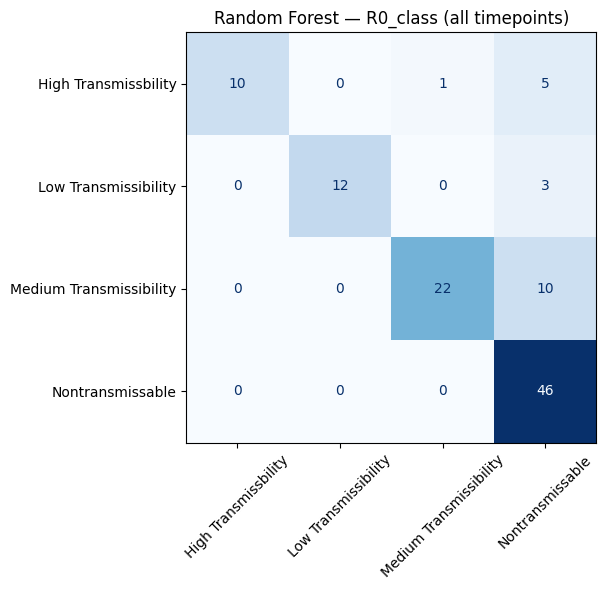

Saved confusion matrix: C:/Users/DIR/Jupyter/Multi-strain classification/figures\rf_confusion_R0_class.png
Classification report:
                         precision    recall  f1-score   support

   High Transmissbility       1.00      0.62      0.77        16
   Low Transmissibility       1.00      0.80      0.89        15
Medium Transmissibility       0.96      0.69      0.80        32
       Nontransmissable       0.72      1.00      0.84        46

               accuracy                           0.83       109
              macro avg       0.92      0.78      0.82       109
           weighted avg       0.87      0.83      0.82       109

Saved feature importances: C:/Users/DIR/Jupyter/Multi-strain classification/figures\rf_top_features_R0_class.csv

=== CFR_class ===
Class counts:
CFR_class
nonfatal         46
High Fatality    32
Low Fatality     31
Name: count, dtype: int64


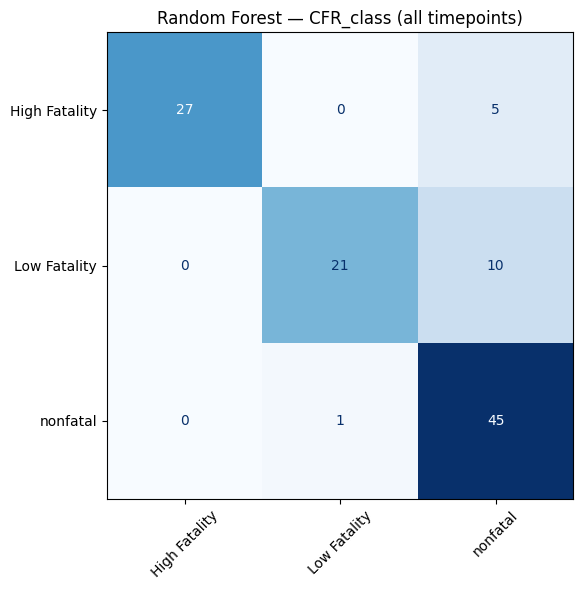

Saved confusion matrix: C:/Users/DIR/Jupyter/Multi-strain classification/figures\rf_confusion_CFR_class.png
Classification report:
               precision    recall  f1-score   support

High Fatality       1.00      0.84      0.92        32
 Low Fatality       0.95      0.68      0.79        31
     nonfatal       0.75      0.98      0.85        46

     accuracy                           0.85       109
    macro avg       0.90      0.83      0.85       109
 weighted avg       0.88      0.85      0.85       109

Saved feature importances: C:/Users/DIR/Jupyter/Multi-strain classification/figures\rf_top_features_CFR_class.csv

=== Disease ===
Class counts:
Disease
Respiratory Disease          32
Hemorrhagic Fever            24
Arboviral Febrile Illness    15
Name: count, dtype: int64


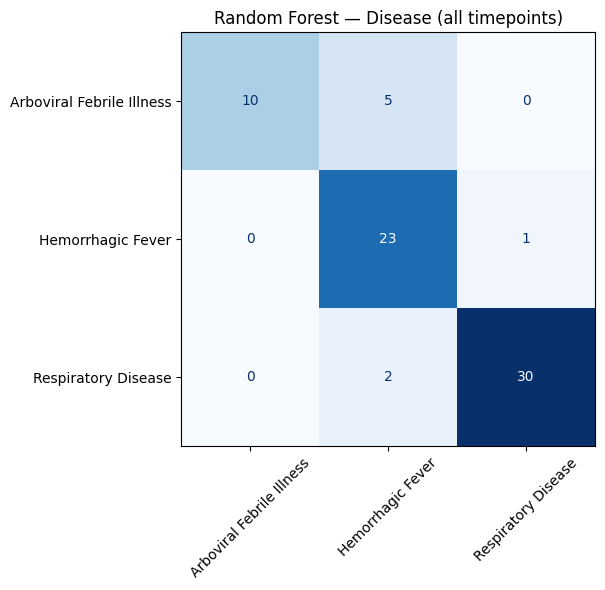

Saved confusion matrix: C:/Users/DIR/Jupyter/Multi-strain classification/figures\rf_confusion_Disease.png
Classification report:
                           precision    recall  f1-score   support

Arboviral Febrile Illness       1.00      0.67      0.80        15
        Hemorrhagic Fever       0.77      0.96      0.85        24
      Respiratory Disease       0.97      0.94      0.95        32

                 accuracy                           0.89        71
                macro avg       0.91      0.85      0.87        71
             weighted avg       0.91      0.89      0.89        71

Saved feature importances: C:/Users/DIR/Jupyter/Multi-strain classification/figures\rf_top_features_Disease.csv

=== Transmission Routes ===
Class counts:
Transmission Routes
Aerosol          32
Large droplet    24
Vector            8
Name: count, dtype: int64


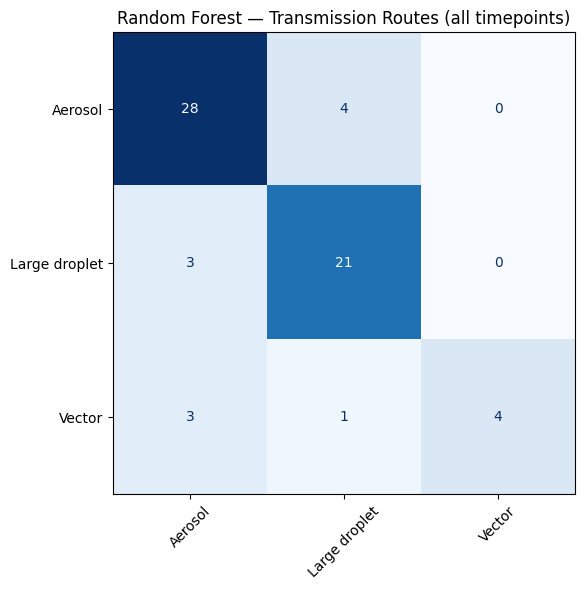

Saved confusion matrix: C:/Users/DIR/Jupyter/Multi-strain classification/figures\rf_confusion_Transmission Routes.png
Classification report:
               precision    recall  f1-score   support

      Aerosol       0.82      0.88      0.85        32
Large droplet       0.81      0.88      0.84        24
       Vector       1.00      0.50      0.67         8

     accuracy                           0.83        64
    macro avg       0.88      0.75      0.79        64
 weighted avg       0.84      0.83      0.82        64

Saved feature importances: C:/Users/DIR/Jupyter/Multi-strain classification/figures\rf_top_features_Transmission Routes.csv


In [3]:
# Random Forest classification for 4 specific labels (all timepoints together)

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# ------------------ PATHS ------------------
EXPR_FILE       = r"C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/gene_tpm_w_metadata.csv"
OTHER_META_FILE = r"C:/Users/DIR/Jupyter/Multi-strain classification/dataset-2/multivirus_labels.csv"
FIG_DIR         = r"C:/Users/DIR/Jupyter/Multi-strain classification/figures"

# ------------------ PARAMS ------------------
KEY_COL = "Run"
LABEL_COLUMNS = ["R0_class", "CFR_class", "Disease", "Transmission Routes"]
MAX_CV_SPLITS = 5

# ------------------ LOAD & MERGE ------------------
df = pd.read_csv(EXPR_FILE)
meta2 = pd.read_csv(OTHER_META_FILE)

if KEY_COL not in df.columns or KEY_COL not in meta2.columns:
    raise ValueError(f"Merge key '{KEY_COL}' must exist in both files.")

df = df.merge(meta2, on=KEY_COL, how="left", suffixes=("", "_m2"))

# ------------------ FEATURE MATRIX ------------------
def make_feature_matrix(frame, label_cols):
    drop_cols = set(["Run", "Library Name", "Virus", "HPI"]) | set(label_cols)
    X = frame.drop(columns=[c for c in frame.columns if c in drop_cols], errors="ignore")
    X = X.select_dtypes(include=[np.number]).copy()
    X = X.loc[:, X.std(ddof=0) > 0]  # drop zero-variance
    X = X.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
    return X

def safe_cv_splits(y):
    vc = y.value_counts()
    if vc.empty:
        return 0
    return int(min(MAX_CV_SPLITS, vc.min()))

# ------------------ TRAIN/EVAL PER LABEL ------------------
os.makedirs(FIG_DIR, exist_ok=True)

for label_col in LABEL_COLUMNS:
    sub = df[df[label_col].notna()].copy()
    y = sub[label_col]
    X = make_feature_matrix(sub, LABEL_COLUMNS)

    print(f"\n=== {label_col} ===")
    print("Class counts:")
    print(y.value_counts())

    if X.shape[0] < 2 or y.nunique() < 2:
        print("Not enough samples or classes; skipping.")
        continue

    n_splits = safe_cv_splits(y)
    if n_splits < 2:
        print("Too few samples per class for CV; skipping.")
        continue

    rf = RandomForestClassifier(
        n_estimators=500,
        random_state=42,
        n_jobs=-1,
        class_weight="balanced"
    )
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    y_pred = cross_val_predict(rf, X, y, cv=cv)

    # Confusion matrix
    ordered_labels = np.array(sorted(y.unique(), key=lambda v: str(v)))
    cm = confusion_matrix(y, y_pred, labels=ordered_labels)

    fig, ax = plt.subplots(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ordered_labels)
    disp.plot(ax=ax, cmap="Blues", colorbar=False, xticks_rotation=45)
    ax.set_title(f"Random Forest — {label_col} (all timepoints)")
    ax.set_xlabel("")
    ax.set_ylabel("")
    out_png = os.path.join(FIG_DIR, f"rf_confusion_{label_col}.png")
    plt.tight_layout()
    plt.savefig(out_png, dpi=300, bbox_inches="tight")
    plt.show()
    print(f"Saved confusion matrix: {out_png}")

    # Text report
    print("Classification report:")
    print(classification_report(y, y_pred, labels=ordered_labels, zero_division=0))

    # Feature importances (fit once on all data)
    rf.fit(X, y)
    importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
    top_path = os.path.join(FIG_DIR, f"rf_top_features_{label_col}.csv")
    importances.to_csv(top_path, header=["importance"])
    print(f"Saved feature importances: {top_path}")
